#### installing packages
DESeq2, dplyr, EnhancedVolcano

In [1]:
options(repr.plot.width=20, repr.plot.height=15)

In [2]:
library(DESeq2)
# this only works when i'm in r-env

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loa

In [3]:
library(dplyr)


Attaching package: ‘dplyr’


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:matrixStats’:

    count


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("EnhancedVolcano")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.2 (2023-10-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'EnhancedVolcano'”
Old packages: 'BiocVersion', 'bslib', 'cpp11', 'curl', 'data.table', 'dplyr',
  'fansi', 'haven', 'htmlwidgets', 'httpuv', 'jsonlite', 'later', 'Matrix',
  'nlme', 'progress', 'RcppArmadillo', 'RSQLite', 'S4Vectors', 'sass',
  'scales', 'shiny', 'stringi', 'testthat', 'tinytex', 'vctrs', 'vroom', 'xml2'



In [5]:
library(EnhancedVolcano)

Loading required package: ggplot2

Loading required package: ggrepel



#### loading in data frames
specifically the meta data, counts matrices, and gtf file

In [7]:
meta = read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/counts_and_meta/CV_CE18_meta.csv")
head(meta)

sample_ID            unique_ID   T1_code T2_code ID_code T1_oxygen T1_temp
1 2018--BBB-WBO-B21-CV BBB-WBO-B21 BBB     WBO     B21     hypoxic   ambient
2 2018--BBB-WBV-B70-CV BBB-WBV-B70 BBB     WBV     B70     hypoxic   ambient
3 2018--BBO-BBO-B16-CV BBO-BBO-B16 BBO     BBO     B16     hypoxic   ambient
4 2018--BBO-BBY-B27-CV BBO-BBY-B27 BBO     BBY     B27     hypoxic   ambient
5 2018--BBO-WBO-B16-CV BBO-WBO-B16 BBO     WBO     B16     hypoxic   ambient
6 2018--BBO-WBV-B64-CV BBO-WBV-B64 BBO     WBV     B64     hypoxic   ambient
  Tank1 T2_oxygen T2_temp Tank2
1 B     normoxic  ambient O    
2 B     normoxic  ambient V    
3 O     hypoxic   ambient O    
4 O     hypoxic   ambient Y    
5 O     normoxic  ambient O    
6 O     normoxic  ambient V

In [8]:
# counts matrix from bedtools multicov
bm=read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/counts_and_meta/bedmulticov_counts.txt", sep='\t')
head(bm)

NC_035780.1 X3211540 X3221319 X772 X770 X414 X302 X834 X748 X280 ⋯ X142 X164
1 NC_035780.1  3637453  3642340  78   49   15  18    50   60  12   ⋯ 14    6  
2 NC_035780.1  3996431  4013875 104  106   62  36   103  107  40   ⋯ 27   20  
3 NC_035780.1  4354976  4367161 141   92   64  42   123  138  60   ⋯ 44   48  
4 NC_035780.1  5748109  5764084 180    4  138   4    42   10   4   ⋯ 64    2  
5 NC_035780.1  8753904  8768743   0    0    0   0     4    0   2   ⋯  0    8  
6 NC_035780.1 10930683 10945734  20   68   18   2     8    6  10   ⋯ 36    0  
  X58 X444 X272 X142.1 X126 X10 X426 X6
1  0   4   16    4     10   46  18   2 
2  6  84   36   42     24    6  47   0 
3 13  66   44   85     10   94  34   2 
4  0   2    8    0      0    0   2   0 
5  0   0    0    8      4    0   0   0 
6  0  50    2    0     14    0   2   0

In [9]:
# counts matrix generated from htseq-counts, with type=exon
counts_exon = read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/counts_and_meta/counts_exon.txt", sep='\t')
head(counts_exon)

X            X0 X0.1 X0.2 X0.3 X0.4 X0.5 X0.6 X0.7 X0.8 ⋯ X0.20 X0.21 X0.22
1 LOC111099029 5  12   14   11   14   12   9    14   11   ⋯ 9     6     1    
2 LOC111099030 0   0    0    0    0    0   0     0    0   ⋯ 0     0     0    
3 LOC111099031 0   0    0    0    0    0   0     0    0   ⋯ 0     0     0    
4 LOC111099032 0   0    0    0    0    0   0     0    0   ⋯ 0     0     0    
5 LOC111099033 0   0   10    0    1    0   0     0    0   ⋯ 1     0     0    
6 LOC111099034 0   0    0    0    0    0   0     0    0   ⋯ 0     0     0    
  X0.23 X0.24 X0.25 X0.26 X0.27 X0.28 X0.29
1 30    12    15    0     0     3     0    
2  0     0     0    0     0     0     0    
3  0     0     0    0     0     0     0    
4  0     0     0    0     0     0     0    
5  1     0     0    0     0     0     0    
6  0     0     0    0     0     0     0

In [10]:
# counts matrix generated from htseq-counts, with type=gene
counts_gene = read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/counts_and_meta/counts_gene.txt", sep='\t')
head(counts_gene)

ATP6         X0 X0.1 X0.2 X0.3 X0.4 X0.5 X0.6 X0.7 X0.8 ⋯ X0.20 X0.21 X0.22
1 COX1         0   0    0    0    0    0   0     0    0   ⋯ 0     0     0    
2 COX2         0   0    0    0    0    0   0     0    0   ⋯ 0     0     0    
3 COX3         0   0    0    0    0    0   0     0    0   ⋯ 0     0     0    
4 CYTB         0   0    0    0    0    0   0     0    0   ⋯ 0     0     0    
5 LOC111099029 7  13   15   11   16   12   9    15   11   ⋯ 9     6     1    
6 LOC111099030 0   0    0    0    0    0   0     0    0   ⋯ 0     0     0    
  X0.23 X0.24 X0.25 X0.26 X0.27 X0.28 X0.29
1  0     0     0    0     0     0     0    
2  0     0     0    0     0     0     0    
3  0     0     0    0     0     0     0    
4  0     0     0    0     0     0     0    
5 30    13    15    0     0     4     0    
6  0     0     0    0     0     0     0

In [11]:
# comparing dimensions of counts_exon and counts_gene
dim(counts_exon) #38,833 rows
dim(counts_gene) #39,509 rows

[1] 38833    31

[1] 39509    31

loading in gtf file

In [12]:
gtf_file <- "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/assembly/reference_genomes/genomic.gtf"

# Read GTF file with read.table
gtf_data <- read.table(gtf_file, header = FALSE, sep = "\t", comment.char = "#", quote = "", stringsAsFactors = FALSE)

# add column names manually
colnames(gtf_data) <- c("seqname", "source", "feature", "start", "end", "score", "strand", "frame", "attributes")

In [13]:
head(gtf_data)

seqname     source feature start end   score strand frame
1 NC_035780.1 Gnomon gene    13578 14594 .     +      .    
2 NC_035780.1 Gnomon exon    13578 13603 .     +      .    
3 NC_035780.1 Gnomon exon    14237 14290 .     +      .    
4 NC_035780.1 Gnomon exon    14557 14594 .     +      .    
5 NC_035780.1 Gnomon gene    28961 33324 .     +      .    
6 NC_035780.1 Gnomon exon    28961 29073 .     +      .    
  attributes                                                                                                                                                                                                                                                                                                                                                                           
1 gene_id "LOC111116054"; db_xref "GeneID:111116054"; gbkey "Gene"; gene "LOC111116054"; gene_biotype "lncRNA";                                                                                                                                                                                                                                                                        
2 gene_id "LOC111116054"; transcript_id "XR_002636969.1"; db_xref "GeneID:111116054"; gbkey "ncRNA"; gene "LOC111116054"; model_evidence "Supporting evidence includes similarity to: 100% coverage of the annotated genomic feature by RNAseq alignments, including 1 sample with support for all annotated introns"; product "uncharacterized LOC111116054"; exon_number "1";        
3 gene_id "LOC111116054"; transcript_id "XR_002636969.1"; db_xref "GeneID:111116054"; gbkey "ncRNA"; gene "LOC111116054"; model_evidence "Supporting evidence includes similarity to: 100% coverage of the annotated genomic feature by RNAseq alignments, including 1 sample with support for all annotated introns"; product "uncharacterized LOC111116054"; exon_number "2";        
4 gene_id "LOC111116054"; transcript_id "XR_002636969.1"; db_xref "GeneID:111116054"; gbkey "ncRNA"; gene "LOC111116054"; model_evidence "Supporting evidence includes similarity to: 100% coverage of the annotated genomic feature by RNAseq alignments, including 1 sample with support for all annotated introns"; product "uncharacterized LOC111116054"; exon_number "3";        
5 gene_id "LOC111126949"; db_xref "GeneID:111126949"; gbkey "Gene"; gene "LOC111126949"; gene_biotype "protein_coding";                                                                                                                                                                                                                                                                
6 gene_id "LOC111126949"; transcript_id "XM_022471938.1"; db_xref "GeneID:111126949"; gbkey "mRNA"; gene "LOC111126949"; model_evidence "Supporting evidence includes similarity to: 3 Proteins, and 100% coverage of the annotated genomic feature by RNAseq alignments, including 21 samples with support for all annotated introns"; product "UNC5C-like protein"; exon_number "1";

#### cleaning data frames

genes dataframe - adding row and column names

In [14]:
# adding row names - assigns gene 1, gene2, etc
rownames(bm)=paste0("gene",1:NROW(bm))

# adding column names
colnames(bm)=c('gene', 'start', 'end', meta$unique_ID)

head(bm)

gene        start    end      BBB-WBO-B21 BBB-WBV-B70 BBO-BBO-B16
gene1 NC_035780.1  3637453  3642340  78          49          15        
gene2 NC_035780.1  3996431  4013875 104         106          62        
gene3 NC_035780.1  4354976  4367161 141          92          64        
gene4 NC_035780.1  5748109  5764084 180           4         138        
gene5 NC_035780.1  8753904  8768743   0           0           0        
gene6 NC_035780.1 10930683 10945734  20          68          18        
      BBO-BBY-B27 BBO-WBO-B16 BBO-WBV-B64 BBR-BBB-B50 ⋯ WBR-BBY-W25 WBV-WBO-W23
gene1 18           50          60         12          ⋯ 14           6         
gene2 36          103         107         40          ⋯ 27          20         
gene3 42          123         138         60          ⋯ 44          48         
gene4  4           42          10          4          ⋯ 64           2         
gene5  0            4           0          2          ⋯  0           8         
gene6  2            8           6         10          ⋯ 36           0         
      WBV-WBR-W12 WBY-BBV-W65 WBY-BBY-W30 WPB-BPG-G45 WPO-BPO-G16 WPO-BPY-G28
gene1  0           4          16           4          10          46         
gene2  6          84          36          42          24           6         
gene3 13          66          44          85          10          94         
gene4  0           2           8           0           0           0         
gene5  0           0           0           8           4           0         
gene6  0          50           2           0          14           0         
      WPR-BPY-G25 WPV-BPR-G11
gene1 18          2          
gene2 47          0          
gene3 34          2          
gene4  2          0          
gene5  0          0          
gene6  2          0

setting the unique IDs as the rownames for meta - also adding two columns that combine the treatment conditions for phase 1 and phase 2

In [15]:
# creating list of unique_ID from meta to be used as column names in loc_data
rownames(meta) = meta$unique_ID
meta$TC1 = paste(meta$T1_oxygen, meta$T1_temp)
meta$TC2 = paste(meta$T2_oxygen, meta$T2_temp)
head(meta)

sample_ID            unique_ID   T1_code T2_code ID_code T1_oxygen
BBB-WBO-B21 2018--BBB-WBO-B21-CV BBB-WBO-B21 BBB     WBO     B21     hypoxic  
BBB-WBV-B70 2018--BBB-WBV-B70-CV BBB-WBV-B70 BBB     WBV     B70     hypoxic  
BBO-BBO-B16 2018--BBO-BBO-B16-CV BBO-BBO-B16 BBO     BBO     B16     hypoxic  
BBO-BBY-B27 2018--BBO-BBY-B27-CV BBO-BBY-B27 BBO     BBY     B27     hypoxic  
BBO-WBO-B16 2018--BBO-WBO-B16-CV BBO-WBO-B16 BBO     WBO     B16     hypoxic  
BBO-WBV-B64 2018--BBO-WBV-B64-CV BBO-WBV-B64 BBO     WBV     B64     hypoxic  
            T1_temp Tank1 T2_oxygen T2_temp Tank2 TC1            
BBB-WBO-B21 ambient B     normoxic  ambient O     hypoxic ambient
BBB-WBV-B70 ambient B     normoxic  ambient V     hypoxic ambient
BBO-BBO-B16 ambient O     hypoxic   ambient O     hypoxic ambient
BBO-BBY-B27 ambient O     hypoxic   ambient Y     hypoxic ambient
BBO-WBO-B16 ambient O     normoxic  ambient O     hypoxic ambient
BBO-WBV-B64 ambient O     normoxic  ambient V     hypoxic ambient
            TC2             
BBB-WBO-B21 normoxic ambient
BBB-WBV-B70 normoxic ambient
BBO-BBO-B16 hypoxic ambient 
BBO-BBY-B27 hypoxic ambient 
BBO-WBO-B16 normoxic ambient
BBO-WBV-B64 normoxic ambient

adding the row names of meta as the column names of both counts_exon and counts_gene

In [16]:
colnames(counts_exon) = c('gene', rownames(meta))
head(counts_exon)

colnames(counts_gene) = c('gene', rownames(meta))
head(counts_gene)

gene         BBB-WBO-B21 BBB-WBV-B70 BBO-BBO-B16 BBO-BBY-B27 BBO-WBO-B16
1 LOC111099029 5           12          14          11          14         
2 LOC111099030 0            0           0           0           0         
3 LOC111099031 0            0           0           0           0         
4 LOC111099032 0            0           0           0           0         
5 LOC111099033 0            0          10           0           1         
6 LOC111099034 0            0           0           0           0         
  BBO-WBV-B64 BBR-BBB-B50 BBR-BBG-B38 BBR-BBY-B26 ⋯ WBR-BBY-W25 WBV-WBO-W23
1 12          9           14          11          ⋯ 9           6          
2  0          0            0           0          ⋯ 0           0          
3  0          0            0           0          ⋯ 0           0          
4  0          0            0           0          ⋯ 0           0          
5  0          0            0           0          ⋯ 1           0          
6  0          0            0           0          ⋯ 0           0          
  WBV-WBR-W12 WBY-BBV-W65 WBY-BBY-W30 WPB-BPG-G45 WPO-BPO-G16 WPO-BPY-G28
1 1           30          12          15          0           0          
2 0            0           0           0          0           0          
3 0            0           0           0          0           0          
4 0            0           0           0          0           0          
5 0            1           0           0          0           0          
6 0            0           0           0          0           0          
  WPR-BPY-G25 WPV-BPR-G11
1 3           0          
2 0           0          
3 0           0          
4 0           0          
5 0           0          
6 0           0

gene         BBB-WBO-B21 BBB-WBV-B70 BBO-BBO-B16 BBO-BBY-B27 BBO-WBO-B16
1 COX1         0            0           0           0           0         
2 COX2         0            0           0           0           0         
3 COX3         0            0           0           0           0         
4 CYTB         0            0           0           0           0         
5 LOC111099029 7           13          15          11          16         
6 LOC111099030 0            0           0           0           0         
  BBO-WBV-B64 BBR-BBB-B50 BBR-BBG-B38 BBR-BBY-B26 ⋯ WBR-BBY-W25 WBV-WBO-W23
1  0          0            0           0          ⋯ 0           0          
2  0          0            0           0          ⋯ 0           0          
3  0          0            0           0          ⋯ 0           0          
4  0          0            0           0          ⋯ 0           0          
5 12          9           15          11          ⋯ 9           6          
6  0          0            0           0          ⋯ 0           0          
  WBV-WBR-W12 WBY-BBV-W65 WBY-BBY-W30 WPB-BPG-G45 WPO-BPO-G16 WPO-BPY-G28
1 0            0           0           0          0           0          
2 0            0           0           0          0           0          
3 0            0           0           0          0           0          
4 0            0           0           0          0           0          
5 1           30          13          15          0           0          
6 0            0           0           0          0           0          
  WPR-BPY-G25 WPV-BPR-G11
1 0           0          
2 0           0          
3 0           0          
4 0           0          
5 4           0          
6 0           0

making the genes column for both counts_exon and counts_gene be the index

In [17]:
rownames(counts_exon) = counts_exon$gene # setting row names = gene
counts_exon = counts_exon[,2:31] # dropping gene column 
head(counts_exon)

BBB-WBO-B21 BBB-WBV-B70 BBO-BBO-B16 BBO-BBY-B27 BBO-WBO-B16
LOC111099029 5           12          14          11          14         
LOC111099030 0            0           0           0           0         
LOC111099031 0            0           0           0           0         
LOC111099032 0            0           0           0           0         
LOC111099033 0            0          10           0           1         
LOC111099034 0            0           0           0           0         
             BBO-WBV-B64 BBR-BBB-B50 BBR-BBG-B38 BBR-BBY-B26 BBY-WBG-B42 ⋯
LOC111099029 12          9           14          11          1           ⋯
LOC111099030  0          0            0           0          0           ⋯
LOC111099031  0          0            0           0          0           ⋯
LOC111099032  0          0            0           0          0           ⋯
LOC111099033  0          0            0           0          0           ⋯
LOC111099034  0          0            0           0          0           ⋯
             WBR-BBY-W25 WBV-WBO-W23 WBV-WBR-W12 WBY-BBV-W65 WBY-BBY-W30
LOC111099029 9           6           1           30          12         
LOC111099030 0           0           0            0           0         
LOC111099031 0           0           0            0           0         
LOC111099032 0           0           0            0           0         
LOC111099033 1           0           0            1           0         
LOC111099034 0           0           0            0           0         
             WPB-BPG-G45 WPO-BPO-G16 WPO-BPY-G28 WPR-BPY-G25 WPV-BPR-G11
LOC111099029 15          0           0           3           0          
LOC111099030  0          0           0           0           0          
LOC111099031  0          0           0           0           0          
LOC111099032  0          0           0           0           0          
LOC111099033  0          0           0           0           0          
LOC111099034  0          0           0           0           0

In [18]:
rownames(counts_gene) = counts_gene$gene # setting row names = gene
counts_gene = counts_gene[,2:31] # dropping gene column 
head(counts_gene)

BBB-WBO-B21 BBB-WBV-B70 BBO-BBO-B16 BBO-BBY-B27 BBO-WBO-B16
COX1         0            0           0           0           0         
COX2         0            0           0           0           0         
COX3         0            0           0           0           0         
CYTB         0            0           0           0           0         
LOC111099029 7           13          15          11          16         
LOC111099030 0            0           0           0           0         
             BBO-WBV-B64 BBR-BBB-B50 BBR-BBG-B38 BBR-BBY-B26 BBY-WBG-B42 ⋯
COX1          0          0            0           0          0           ⋯
COX2          0          0            0           0          0           ⋯
COX3          0          0            0           0          0           ⋯
CYTB          0          0            0           0          0           ⋯
LOC111099029 12          9           15          11          1           ⋯
LOC111099030  0          0            0           0          0           ⋯
             WBR-BBY-W25 WBV-WBO-W23 WBV-WBR-W12 WBY-BBV-W65 WBY-BBY-W30
COX1         0           0           0            0           0         
COX2         0           0           0            0           0         
COX3         0           0           0            0           0         
CYTB         0           0           0            0           0         
LOC111099029 9           6           1           30          13         
LOC111099030 0           0           0            0           0         
             WPB-BPG-G45 WPO-BPO-G16 WPO-BPY-G28 WPR-BPY-G25 WPV-BPR-G11
COX1          0          0           0           0           0          
COX2          0          0           0           0           0          
COX3          0          0           0           0           0          
CYTB          0          0           0           0           0          
LOC111099029 15          0           0           4           0          
LOC111099030  0          0           0           0           0

In [19]:
# have to remove extra info/'gunk' at bottom of counts_gene that is generated from htseq-counts
counts_gene = counts_gene[1:39504,]
tail(counts_gene)

BBB-WBO-B21 BBB-WBV-B70 BBO-BBO-B16 BBO-BBY-B27 BBO-WBO-B16
Trnay-gua_4 0           0           0           0           0          
Trnay-gua_5 0           0           0           0           0          
Trnay-gua_6 0           0           0           0           0          
Trnay-gua_7 0           0           0           0           0          
Trnay-gua_8 0           0           0           0           0          
Trnay-gua_9 0           0           0           0           0          
            BBO-WBV-B64 BBR-BBB-B50 BBR-BBG-B38 BBR-BBY-B26 BBY-WBG-B42 ⋯
Trnay-gua_4 0           0           0           0           0           ⋯
Trnay-gua_5 0           0           0           0           0           ⋯
Trnay-gua_6 0           0           0           0           0           ⋯
Trnay-gua_7 0           0           0           0           0           ⋯
Trnay-gua_8 0           0           0           0           0           ⋯
Trnay-gua_9 0           0           0           0           0           ⋯
            WBR-BBY-W25 WBV-WBO-W23 WBV-WBR-W12 WBY-BBV-W65 WBY-BBY-W30
Trnay-gua_4 0           0           0           0           0          
Trnay-gua_5 0           0           0           0           0          
Trnay-gua_6 0           0           0           0           0          
Trnay-gua_7 0           0           0           0           0          
Trnay-gua_8 0           0           0           0           0          
Trnay-gua_9 0           0           0           0           0          
            WPB-BPG-G45 WPO-BPO-G16 WPO-BPY-G28 WPR-BPY-G25 WPV-BPR-G11
Trnay-gua_4 0           0           0           0           0          
Trnay-gua_5 0           0           0           0           0          
Trnay-gua_6 0           0           0           0           0          
Trnay-gua_7 0           0           0           0           0          
Trnay-gua_8 0           0           0           0           0          
Trnay-gua_9 0           0           0           0           0

In [20]:
#### unique phase treatments for the samples
unique(meta$TC1) # 'hypoxic ambient''hypoxic warm''normoxic ambient''normoxic warm'
unique(meta$TC2) # 'hypoxic ambient''hypoxic warm''normoxic ambient'

[1] "hypoxic ambient"  "hypoxic warm"     "normoxic ambient" "normoxic warm"

[1] "normoxic ambient" "hypoxic ambient"  "hypoxic warm"

looking at https://htseq.readthedocs.io/en/master/features.html

trying to match up gtf file with genes file (counts matrix) - although might not need to do rn

In [21]:
# filtering gtf_data for only rows with gene
gtf_genes = filter(gtf_data, gtf_data$feature == 'gene')
dim(gtf_genes) # 39,505 rows

[1] 39505     9

In [22]:
dim(counts_gene) #39,509 rows

[1] 39504    30

okay so I'm pretty sure I've got the gtf data and the counts matrix to line up - except the counts_gene df has these CO... genes - checking to see if those are also in gtf_genes or if I should remove them

creating a new column in the gtf file to add just the gene_id info - this will help with matching up the counts_gene df

In [23]:
# Extract gene_id
gtf_genes$gene_id <- gsub('.*gene_id "(.*?)";.*', '\\1', gtf_genes$attributes)

# set row names as the gene_id
rownames(gtf_genes) = gtf_genes$gene_id
head(gtf_genes)

seqname     source feature start  end    score strand frame
LOC111116054 NC_035780.1 Gnomon gene     13578  14594 .     +      .    
LOC111126949 NC_035780.1 Gnomon gene     28961  33324 .     +      .    
LOC111110729 NC_035780.1 Gnomon gene     43111  66897 .     -      .    
LOC111112434 NC_035780.1 Gnomon gene     85606  95254 .     -      .    
LOC111120752 NC_035780.1 Gnomon gene     99840 106460 .     +      .    
LOC111128944 NC_035780.1 Gnomon gene    108305 110077 .     -      .    
             attributes                                                                                                                            
LOC111116054 gene_id "LOC111116054"; db_xref "GeneID:111116054"; gbkey "Gene"; gene "LOC111116054"; gene_biotype "lncRNA";                         
LOC111126949 gene_id "LOC111126949"; db_xref "GeneID:111126949"; gbkey "Gene"; gene "LOC111126949"; gene_biotype "protein_coding";                 
LOC111110729 gene_id "LOC111110729"; db_xref "GeneID:111110729"; gbkey "Gene"; gene "LOC111110729"; gene_biotype "protein_coding";                 
LOC111112434 gene_id "LOC111112434"; db_xref "GeneID:111112434"; gbkey "Gene"; gene "LOC111112434"; gene_biotype "protein_coding";                 
LOC111120752 gene_id "LOC111120752"; db_xref "GeneID:111120752"; gbkey "Gene"; gene "LOC111120752"; gene_biotype "protein_coding";                 
LOC111128944 gene_id "LOC111128944"; db_xref "GeneID:111128944"; gbkey "Gene"; gene "LOC111128944"; gene_biotype "protein_coding"; partial "true"; 
             gene_id     
LOC111116054 LOC111116054
LOC111126949 LOC111126949
LOC111110729 LOC111110729
LOC111112434 LOC111112434
LOC111120752 LOC111120752
LOC111128944 LOC111128944

In [24]:
# Checking if the genes in counts_genes are also in gtf_genes
genes_in_both <- rownames(gtf_genes) %in% rownames(counts_gene)

# looking at what's FALSE (in gtf_genes but not in counts_gene)
#sum(!genes_in_both) # only 1 FALSE
false_cg = gtf_genes[!genes_in_both,]
false_cg #ATP6 is in gtf_genes, but not in counts_gene

# Pulling out only the rows in gtf_genes that match the genes in counts_genes
gtf_genes1 <- gtf_genes[genes_in_both,]

seqname     source feature start end   score strand frame
ATP6 NC_007175.2 RefSeq gene    9518  10192 .     +      .    
     attributes                                                                                          
ATP6 gene_id "ATP6"; db_xref "GeneID:3453229"; gbkey "Gene"; gene "ATP6"; gene_biotype "protein_coding"; 
     gene_id
ATP6 ATP6

In [25]:
dim(gtf_genes1) #39,504 - removed row that didn't match in counts_gene
dim(counts_gene) #39,504

# OG gtf file of genes
dim(gtf_genes) # 39,505

[1] 39504    10

[1] 39504    30

[1] 39505    10

In [26]:
# removing gene_id column - not necessary
gtf_genes1 <- gtf_genes1[, -ncol(gtf_genes)]

# adding dataframes together 
counts_meta <- cbind(counts_gene, gtf_genes1)

# checking out the new df - making sure things make sense
dim(counts_meta) 
# 39,504 rows for 39,504 genes
# 39 columns for 30 samples + 9 gtf columns 
head(counts_meta)

[1] 39504    39

BBB-WBO-B21 BBB-WBV-B70 BBO-BBO-B16 BBO-BBY-B27 BBO-WBO-B16
COX1         0            0           0           0           0         
COX2         0            0           0           0           0         
COX3         0            0           0           0           0         
CYTB         0            0           0           0           0         
LOC111099029 7           13          15          11          16         
LOC111099030 0            0           0           0           0         
             BBO-WBV-B64 BBR-BBB-B50 BBR-BBG-B38 BBR-BBY-B26 BBY-WBG-B42 ⋯
COX1          0          0            0           0          0           ⋯
COX2          0          0            0           0          0           ⋯
COX3          0          0            0           0          0           ⋯
CYTB          0          0            0           0          0           ⋯
LOC111099029 12          9           15          11          1           ⋯
LOC111099030  0          0            0           0          0           ⋯
             WPV-BPR-G11 seqname     source feature start  end    score strand
COX1         0           NC_035780.1 Gnomon gene     13578  14594 .     +     
COX2         0           NC_035780.1 Gnomon gene     28961  33324 .     +     
COX3         0           NC_035780.1 Gnomon gene     43111  66897 .     -     
CYTB         0           NC_035780.1 Gnomon gene     85606  95254 .     -     
LOC111099029 0           NC_035780.1 Gnomon gene     99840 106460 .     +     
LOC111099030 0           NC_035780.1 Gnomon gene    108305 110077 .     -     
             frame
COX1         .    
COX2         .    
COX3         .    
CYTB         .    
LOC111099029 .    
LOC111099030 .    
             attributes                                                                                                                            
COX1         gene_id "LOC111116054"; db_xref "GeneID:111116054"; gbkey "Gene"; gene "LOC111116054"; gene_biotype "lncRNA";                         
COX2         gene_id "LOC111126949"; db_xref "GeneID:111126949"; gbkey "Gene"; gene "LOC111126949"; gene_biotype "protein_coding";                 
COX3         gene_id "LOC111110729"; db_xref "GeneID:111110729"; gbkey "Gene"; gene "LOC111110729"; gene_biotype "protein_coding";                 
CYTB         gene_id "LOC111112434"; db_xref "GeneID:111112434"; gbkey "Gene"; gene "LOC111112434"; gene_biotype "protein_coding";                 
LOC111099029 gene_id "LOC111120752"; db_xref "GeneID:111120752"; gbkey "Gene"; gene "LOC111120752"; gene_biotype "protein_coding";                 
LOC111099030 gene_id "LOC111128944"; db_xref "GeneID:111128944"; gbkey "Gene"; gene "LOC111128944"; gene_biotype "protein_coding"; partial "true";

so going forward - dataframes to use:
> - **counts_gene:** counts matrix of genes generated from htseq-counts
> - **gtf_genes1:** gtf file filtered for only genes and removed gene that wasn't in counts_gene
> - **counts_meta:** combined df of counts_gene and gtf_genes1
> - **meta:** all treatment data for individual samples

#### analysis 1 - controlling for phase 2 treatments

In [27]:
# looking at samples that had hypoxic warm for treatment 2
meta_hw=meta[meta$TC2=="hypoxic warm",]
dim(meta_hw)

[1] 10 13

In [28]:
# returning T/F for samples in that specific treatment
colnames(counts_gene) %in% meta_hw$unique_ID

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE
[13]  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE

In [29]:
# creating new df that only has samples with that specific treatment 2
counts_hw = counts_gene[,colnames(counts_gene) %in% meta_hw$unique_ID, drop=FALSE]
counts_hw

BPO-BPO-O16 BPR-BPG-O38 BPR-BPR-O02 BPY-BPG-O42 BPY-BPY-O29
COX1         0            0           0          0            0         
COX2         0            0           0          0            0         
COX3         0            0           0          0            0         
CYTB         0            0           0          0            0         
LOC111099029 1           11           3          0           11         
LOC111099030 0            0           0          0            0         
LOC111099031 0            0           0          0            0         
LOC111099032 0            0           0          0            0         
LOC111099033 0            0           0          0            1         
LOC111099034 0            0           0          0            0         
LOC111099035 0            0           0          1            1         
LOC111099036 1            0           1          0            0         
LOC111099037 0            0           0          0            0         
LOC111099038 0            0           0          0            0         
LOC111099039 0            0           0          0            0         
LOC111099040 2            2           8          1            2         
LOC111099041 0            0           0          0            0         
LOC111099042 0            0           0          0            0         
LOC111099043 0            0           0          0           14         
LOC111099044 0            0           0          0            0         
LOC111099045 0            0           0          0            0         
LOC111099046 0            0           0          0            0         
LOC111099047 0            0           0          0            0         
LOC111099048 0            0           0          0            0         
LOC111099049 0            0           0          0            0         
LOC111099050 6           16          12          3            8         
LOC111099051 0            0           0          0            0         
LOC111099052 0            0           0          0            0         
LOC111099053 1            2           0          0            1         
LOC111099054 0            0           0          0            0         
⋮            ⋮           ⋮           ⋮           ⋮           ⋮          
Trnav-uac    0           0           0           0           0          
Trnav-uac_1  0           0           0           0           0          
Trnav-uac_2  0           0           0           0           0          
Trnav-uac_3  0           0           0           0           0          
Trnav-uac_4  0           0           0           0           0          
Trnaw-cca    0           0           0           0           0          
Trnaw-cca_1  0           0           0           0           0          
Trnaw-cca_2  0           0           0           0           0          
Trnaw-cca_3  0           0           0           0           0          
Trnaw-cca_4  0           0           0           0           0          
Trnaw-cca_5  0           0           0           0           0          
Trnaw-cca_6  0           0           0           0           0          
Trnaw-cca_7  0           0           0           0           0          
Trnaw-cca_8  0           0           0           0           0          
Trnay-aua    0           0           0           0           0          
Trnay-aua_1  0           0           0           0           0          
Trnay-gua    0           0           0           0           0          
Trnay-gua_1  0           0           0           0           0          
Trnay-gua_10 0           0           0           0           0          
Trnay-gua_11 0           0           0           0           0          
Trnay-gua_12 0           0           0           0           0          
Trnay-gua_13 0           0           0           0           0          
Trnay-gua_2  0           0           0           0           0         

In [30]:
# checking that things make sense
dim(counts_hw)
dim(counts_gene)

[1] 39504    10

[1] 39504    30

In [83]:
dds_hw <- DESeqDataSetFromMatrix(countData = counts_hw,
                              colData = meta_hw,
                              design= ~ TC1)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]



In [84]:
# prefiltering
keep <- rowSums(counts(dds_hw)) >= 5
dds_hw <- dds_hw[keep,]

In [85]:
dds_hw <- DESeq(dds_hw)
res <- results(dds_hw)

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

final dispersion estimates

fitting model and testing



In [86]:
summary(res)


out of 8834 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 78, 0.88%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 333, 3.8%
low counts [2]     : 8065, 91%
(mean count < 27)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



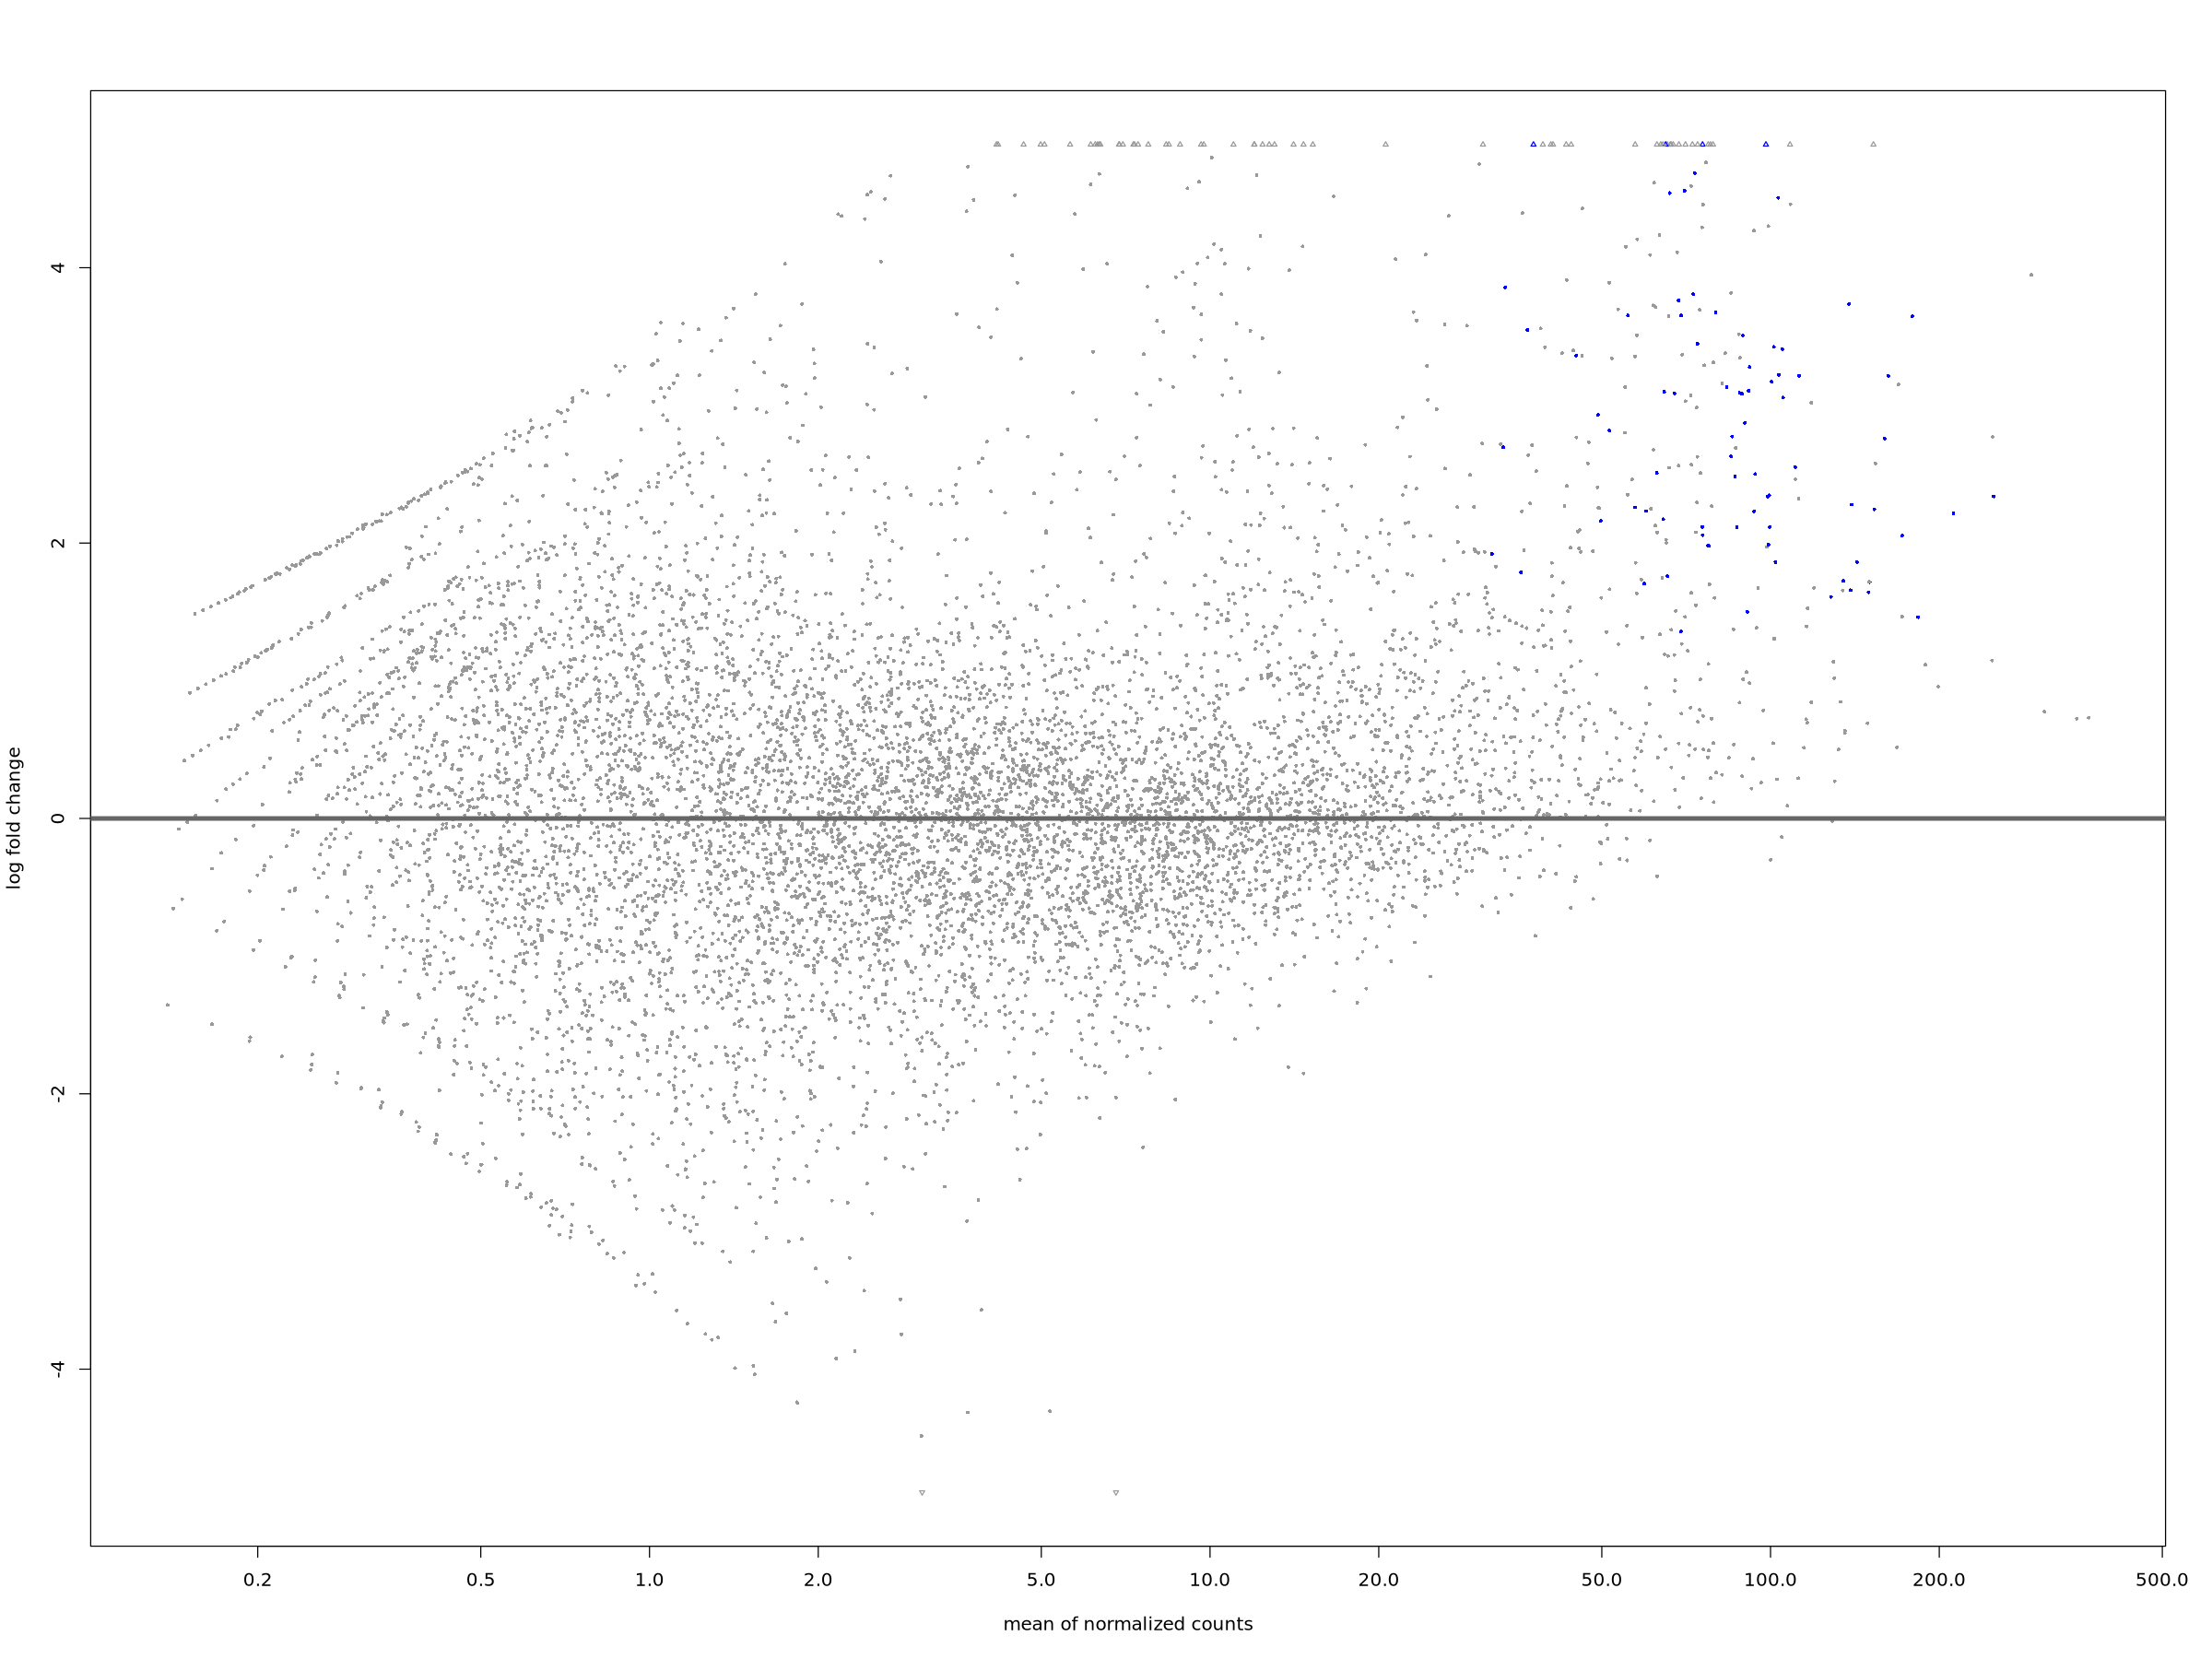

In [87]:
plotMA(res)

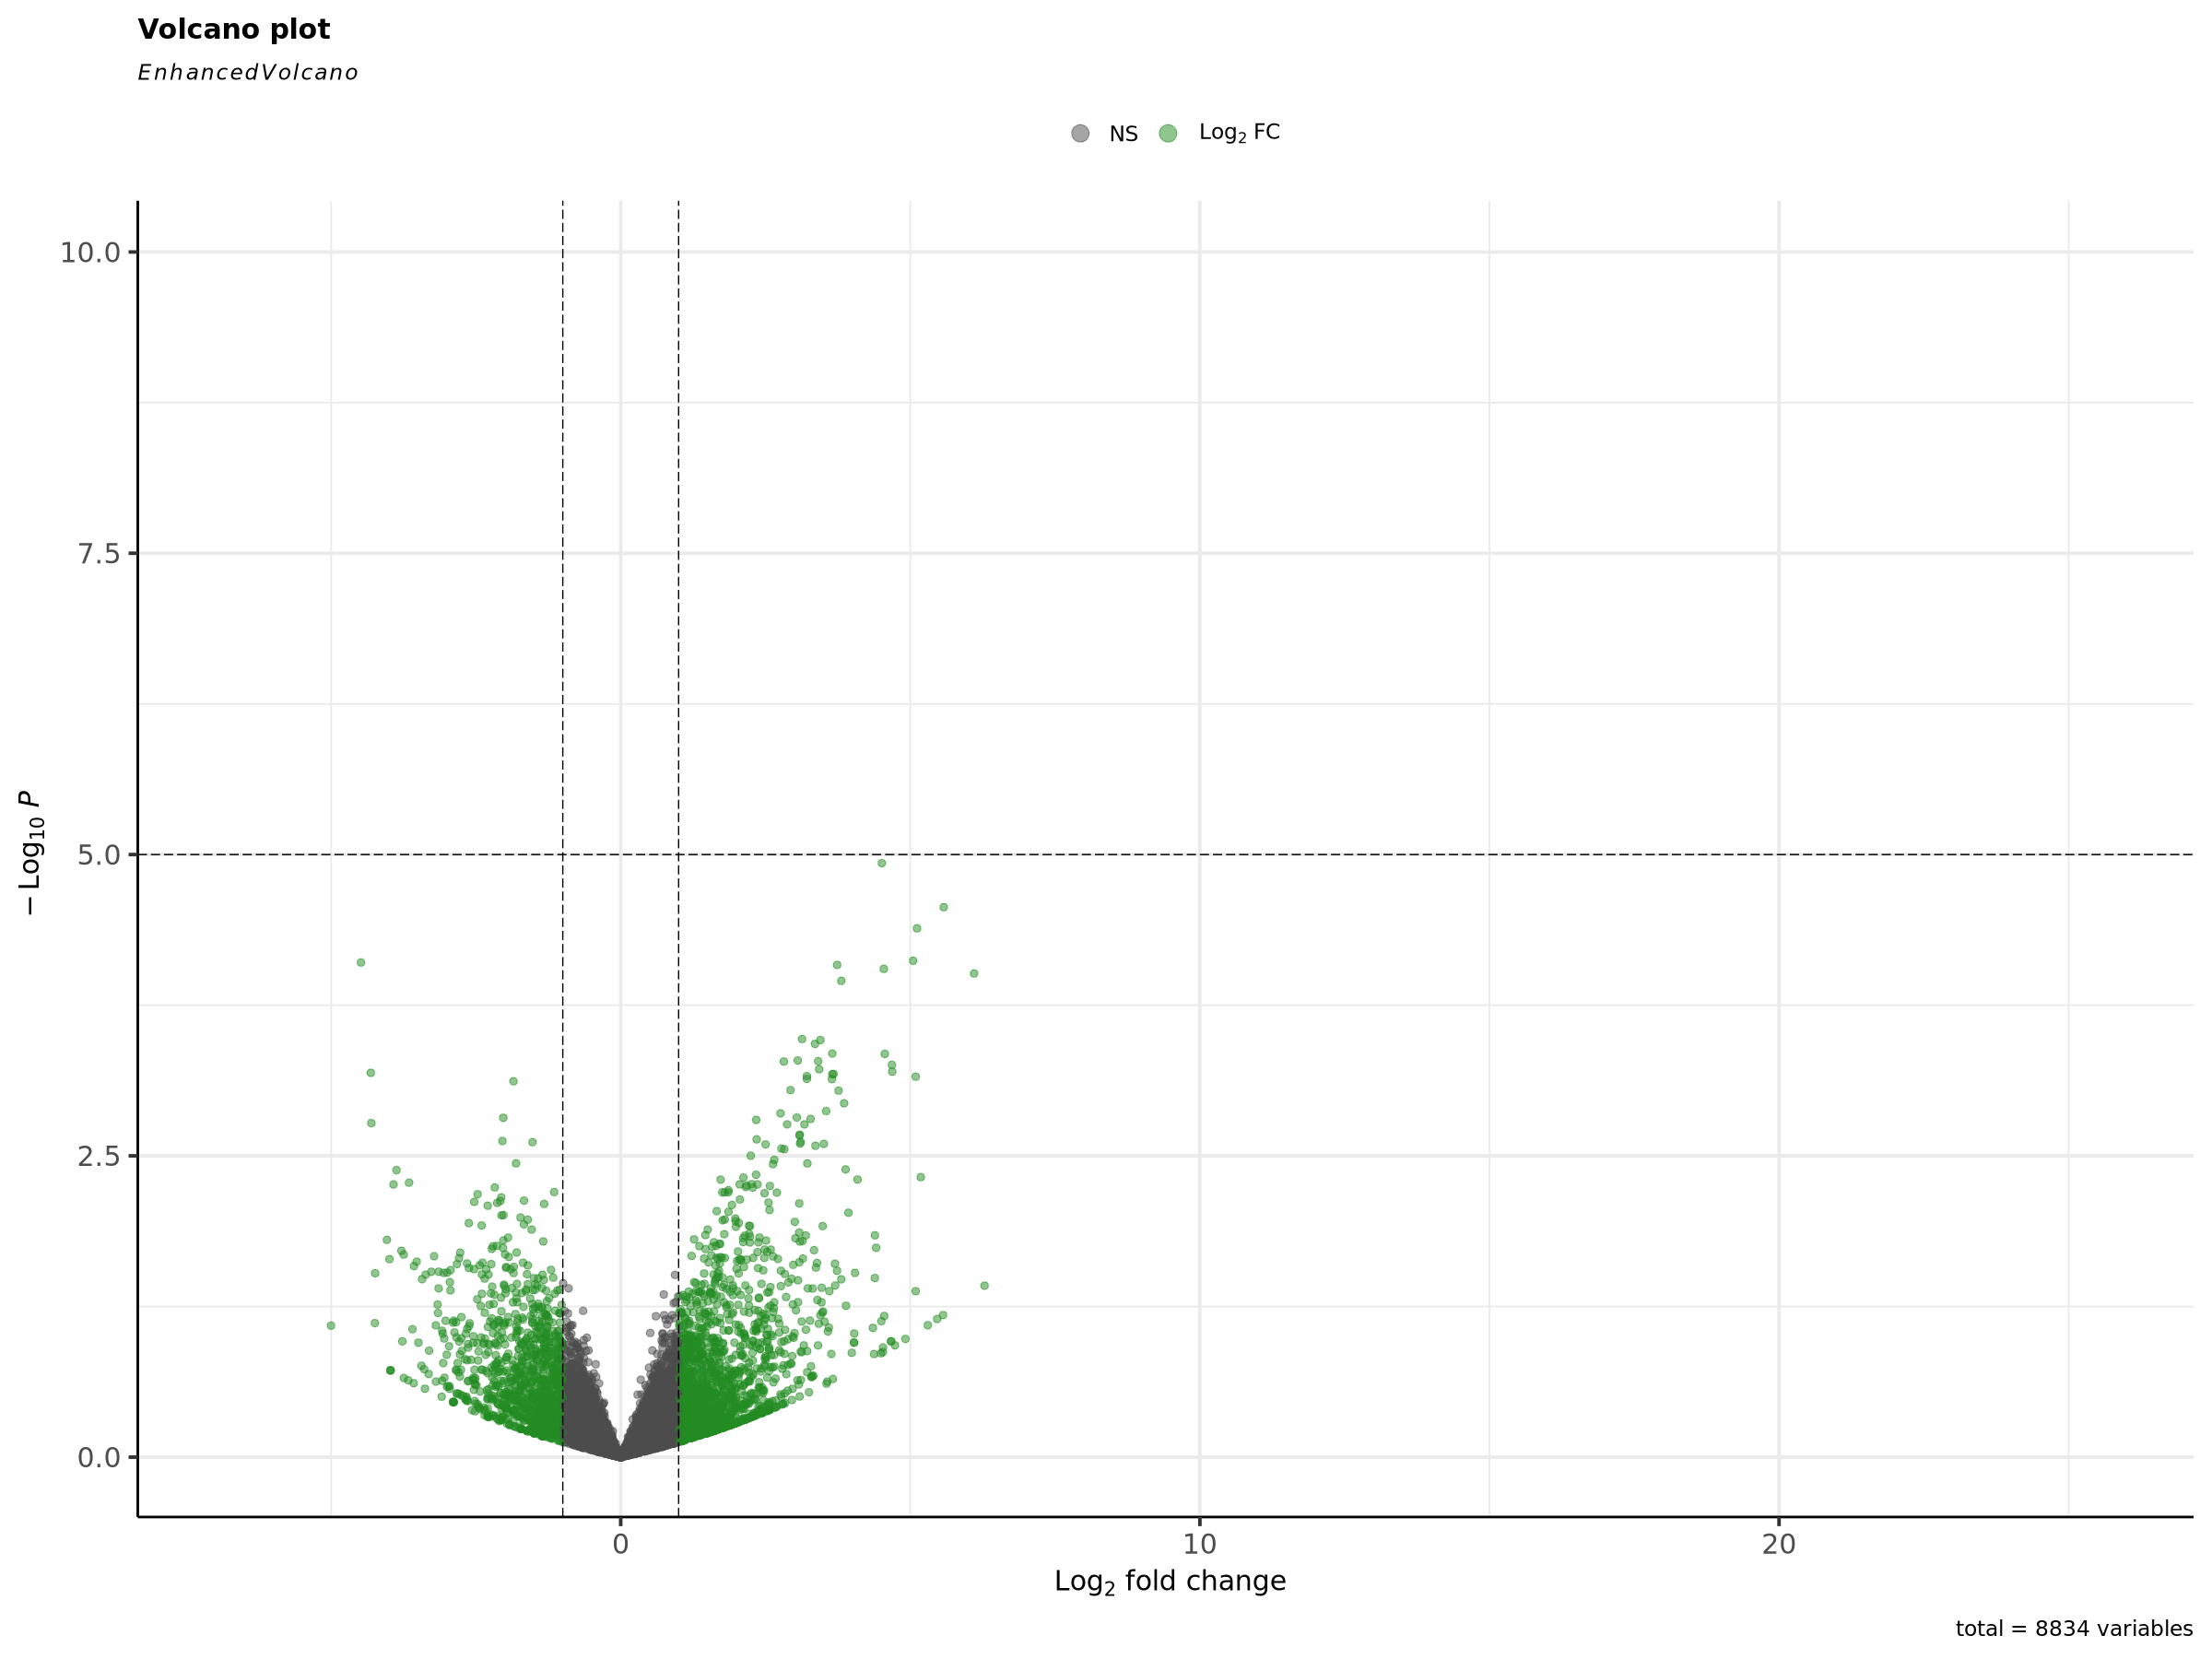

In [88]:
EnhancedVolcano(res,
                lab=NA,
                x='log2FoldChange',
                y='pvalue')

In [89]:
resultsNames(dds_hw)

[1] "Intercept"                         "TC1_normoxic.warm_vs_hypoxic.warm"

In [90]:
res=results(dds_hw, name='TC1_normoxic.warm_vs_hypoxic.warm')

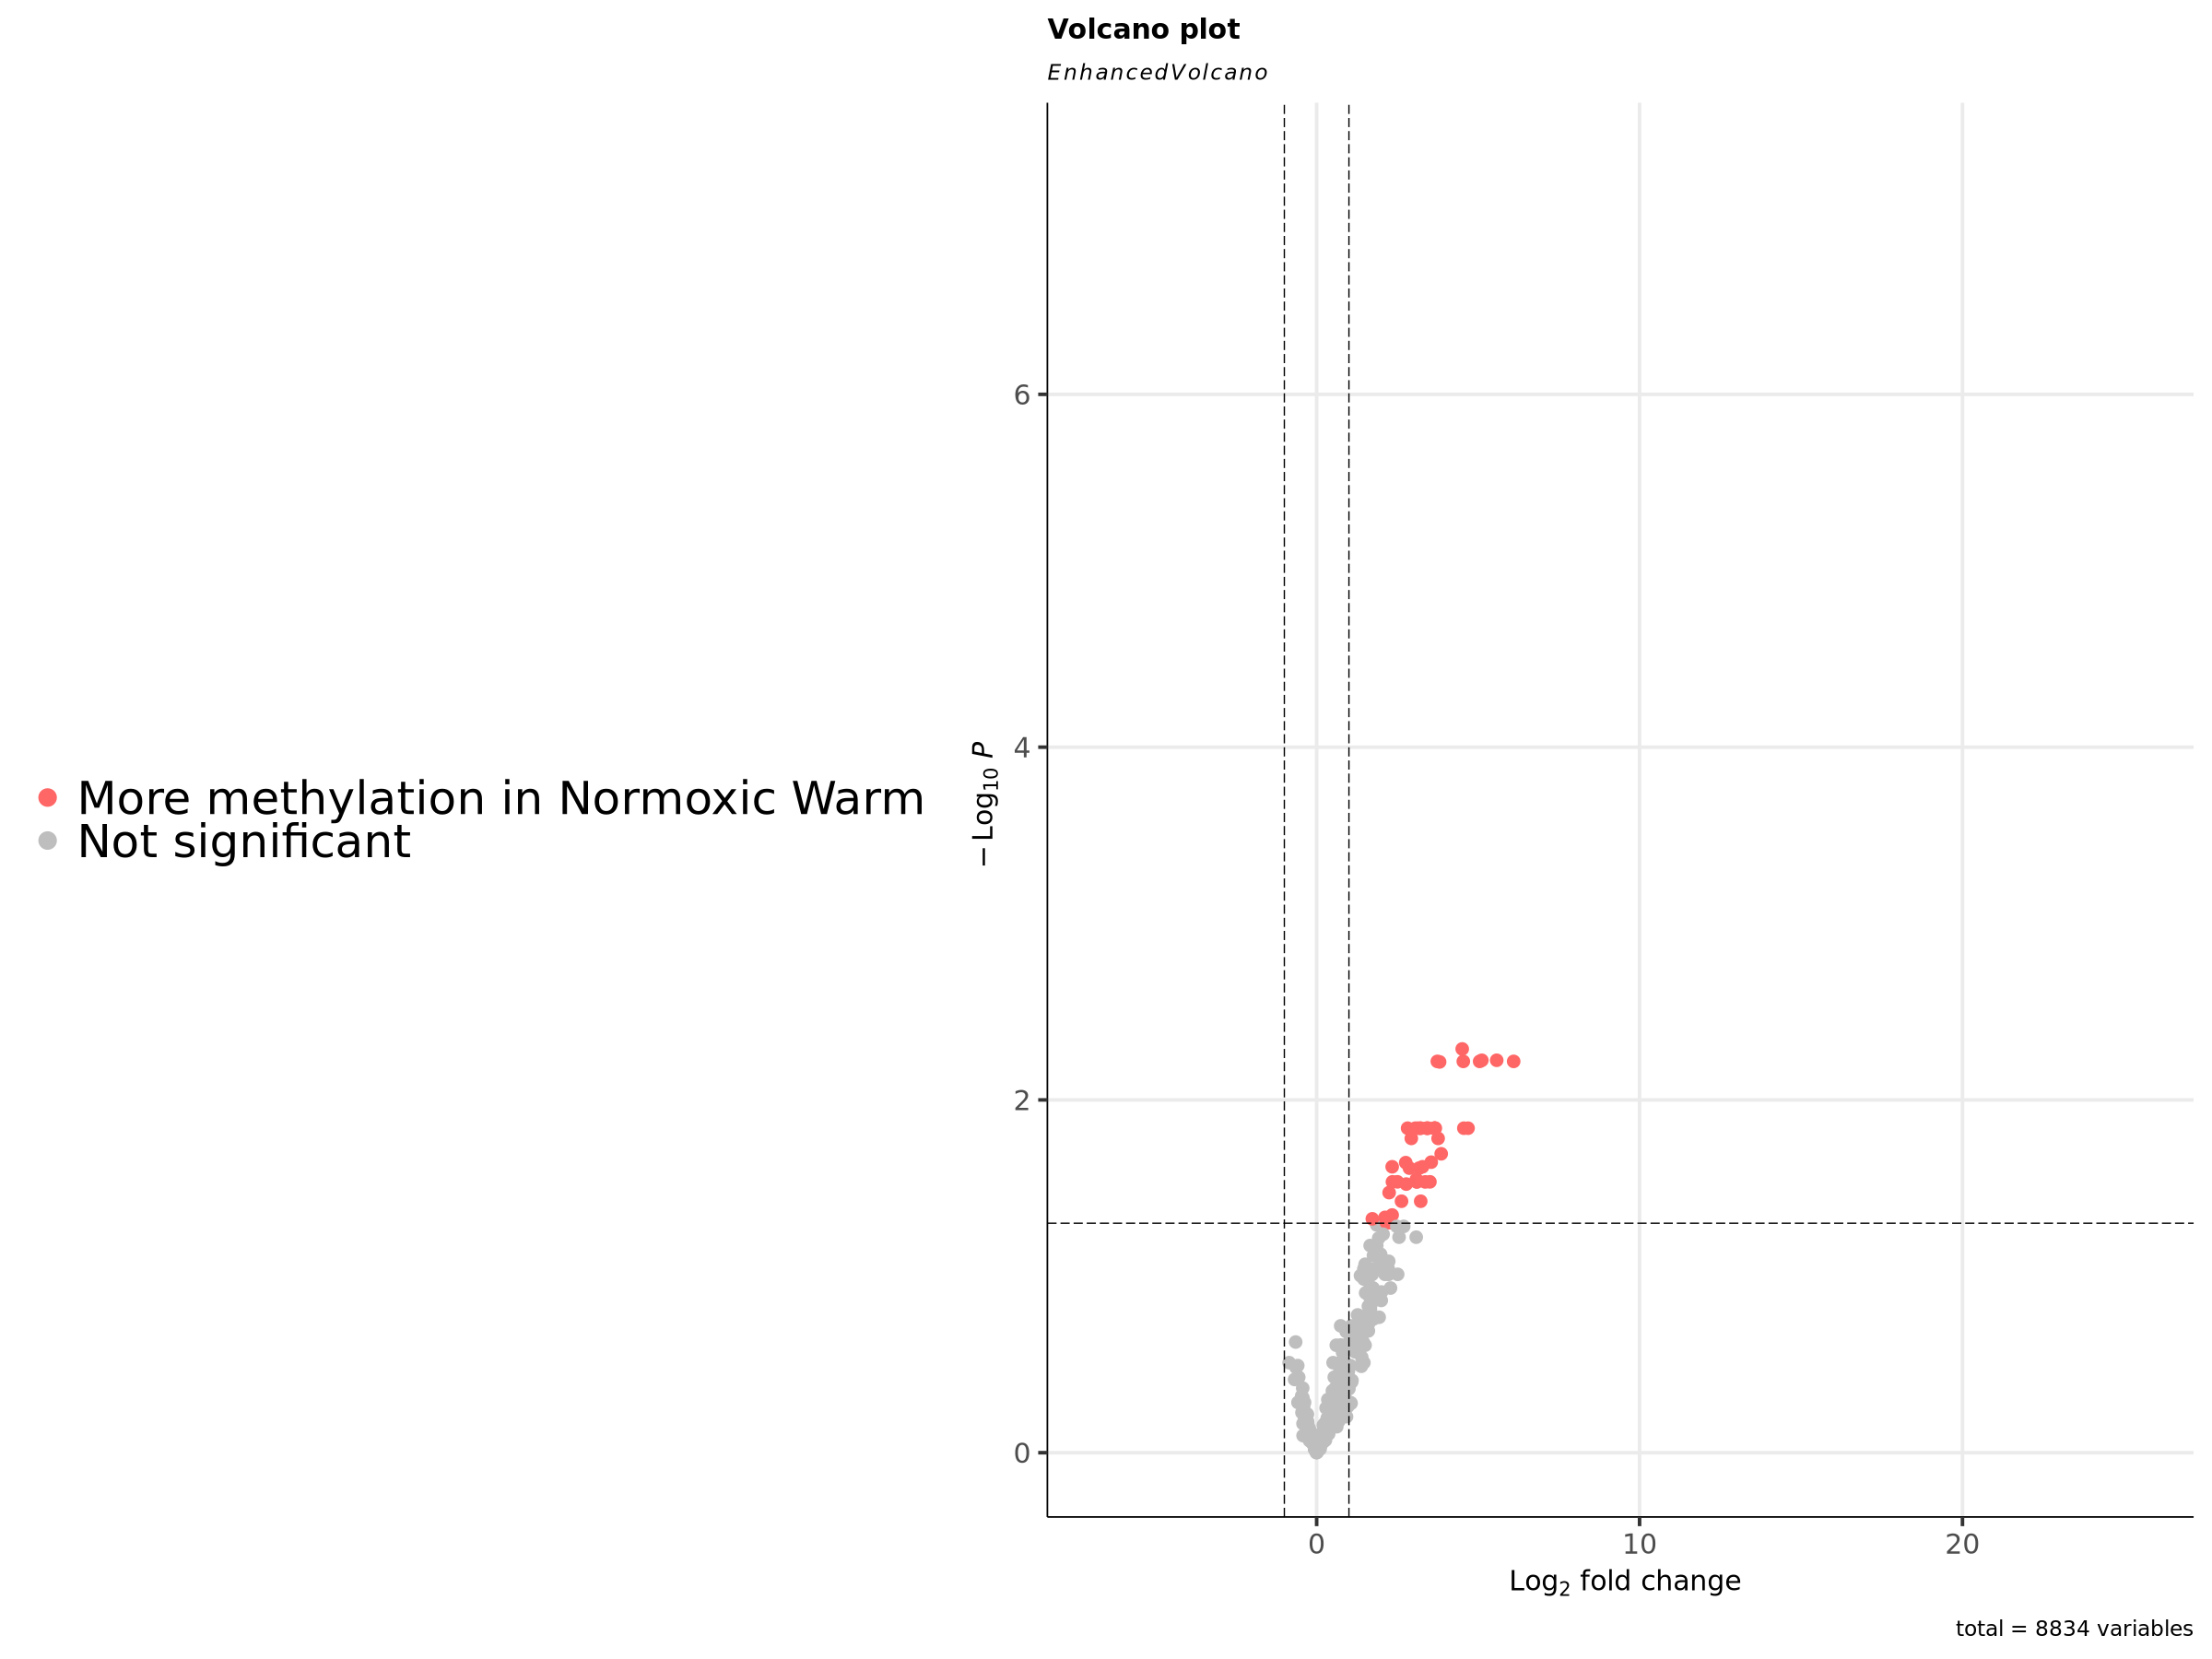

In [91]:
keyvals <- ifelse(
res$log2FoldChange < -1& res$padj <0.05, "#000066",
  ifelse(res$log2FoldChange > 1& res$padj <0.05,"#FF6666" ,
    'grey'))
keyvals[is.na(keyvals)] <- 'grey'
names(keyvals)[keyvals == "#FF6666"] <- 'More methylation in Normoxic Warm'
names(keyvals)[keyvals == 'grey'] <- 'Not significant'
names(keyvals)[keyvals == "#000066"] <- 'More methylation in Hypoxic Warm'

hw_plot <- EnhancedVolcano(res,
    lab = NA,
    x = 'log2FoldChange',
    y = 'padj',
    selectLab = rownames(res)[which(names(keyvals) %in% c('More methylation in Normoxic Warm', 'More methylation in Hypoxic Ambient'))],
    xlab = bquote(~Log[2]~ 'fold change'),
    pointSize = 3.5,
    pCutoff = 0.05,
    colCustom = keyvals,
    colAlpha = 1,
    legendPosition = 'left',
    legendLabSize = 30,
    legendIconSize = 5.0,
    drawConnectors = TRUE,
    widthConnectors = 1.0,
    colConnectors = 'black',
    arrowheads = FALSE,
    gridlines.major = TRUE,
    gridlines.minor = FALSE,
    border = 'partial',
    borderWidth = 0.5,
    borderColour = 'black')
hw_plot

In [92]:
# Open a pdf file
setwd("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/figures")
pdf("TC2_hw.pdf", width=20, height=10) 
# 2. Create a plot
hw_plot
# Close the pdf filegb
dev.off() 

png 
  2

In [39]:
rownames(res)  

[1] "LOC111099029" "LOC111099035" "LOC111099036" "LOC111099040"
   [5] "LOC111099043" "LOC111099047" "LOC111099050" "LOC111099053"
   [9] "LOC111099062" "LOC111099063" "LOC111099064" "LOC111099067"
  [13] "LOC111099073" "LOC111099079" "LOC111099081" "LOC111099096"
  [17] "LOC111099101" "LOC111099102" "LOC111099103" "LOC111099104"
  [21] "LOC111099105" "LOC111099109" "LOC111099112" "LOC111099115"
  [25] "LOC111099123" "LOC111099125" "LOC111099147" "LOC111099150"
  [29] "LOC111099153" "LOC111099155" "LOC111099156" "LOC111099157"
  [33] "LOC111099161" "LOC111099168" "LOC111099169" "LOC111099174"
  [37] "LOC111099183" "LOC111099192" "LOC111099196" "LOC111099200"
  [41] "LOC111099209" "LOC111099210" "LOC111099211" "LOC111099212"
  [45] "LOC111099216" "LOC111099217" "LOC111099218" "LOC111099220"
  [49] "LOC111099222" "LOC111099262" "LOC111099343" "LOC111099417"
  [53] "LOC111099424" "LOC111099426" "LOC111099427" "LOC111099438"
  [57] "LOC111099458" "LOC111099459" "LOC111099460" "LOC111099461"
  [61] "LOC111099471" "LOC111099478" "LOC111099479" "LOC111099481"
  [65] "LOC111099483" "LOC111099502" "LOC111099505" "LOC111099508"
  [69] "LOC111099517" "LOC111099519" "LOC111099524" "LOC111099527"
  [73] "LOC111099548" "LOC111099552" "LOC111099557" "LOC111099565"
  [77] "LOC111099567" "LOC111099571" "LOC111099573" "LOC111099580"
  [81] "LOC111099582" "LOC111099584" "LOC111099585" "LOC111099587"
  [85] "LOC111099592" "LOC111099593" "LOC111099596" "LOC111099603"
  [89] "LOC111099604" "LOC111099610" "LOC111099611" "LOC111099612"
  [93] "LOC111099613" "LOC111099614" "LOC111099617" "LOC111099623"
  [97] "LOC111099625" "LOC111099626" "LOC111099633" "LOC111099646"
 [101] "LOC111099657" "LOC111099659" "LOC111099664" "LOC111099665"
 [105] "LOC111099666" "LOC111099672" "LOC111099692" "LOC111099693"
 [109] "LOC111099696" "LOC111099700" "LOC111099705" "LOC111099713"
 [113] "LOC111099722" "LOC111099723" "LOC111099724" "LOC111099729"
 [117] "LOC111099731" "LOC111099734" "LOC111099737" "LOC111099746"
 [121] "LOC111099747" "LOC111099748" "LOC111099750" "LOC111099754"
 [125] "LOC111099761" "LOC111099763" "LOC111099766" "LOC111099767"
 [129] "LOC111099772" "LOC111099781" "LOC111099792" "LOC111099794"
 [133] "LOC111099798" "LOC111099808" "LOC111099822" "LOC111099823"
 [137] "LOC111099830" "LOC111099850" "LOC111099866" "LOC111099870"
 [141] "LOC111099882" "LOC111099884" "LOC111099887" "LOC111099900"
 [145] "LOC111099904" "LOC111099918" "LOC111099922" "LOC111099923"
 [149] "LOC111099928" "LOC111099929" "LOC111099932" "LOC111099941"
 [153] "LOC111099945" "LOC111099956" "LOC111099960" "LOC111099965"
 [157] "LOC111099980" "LOC111099983" "LOC111099995" "LOC111099997"
 [161] "LOC111099998" "LOC111099999" "LOC111100000" "LOC111100017"
 [165] "LOC111100026" "LOC111100029" "LOC111100034" "LOC111100040"
 [169] "LOC111100043" "LOC111100047" "LOC111100049" "LOC111100065"
 [173] "LOC111100073" "LOC111100085" "LOC111100089" "LOC111100090"
 [177] "LOC111100092" "LOC111100100" "LOC111100101" "LOC111100132"
 [181] "LOC111100134" "LOC111100135" "LOC111100143" "LOC111100148"
 [185] "LOC111100154" "LOC111100158" "LOC111100165" "LOC111100170"
 [189] "LOC111100172" "LOC111100186" "LOC111100187" "LOC111100188"
 [193] "LOC111100190" "LOC111100196" "LOC111100199" "LOC111100203"
 [197] "LOC111100220" "LOC111100224" "LOC111100231" "LOC111100233"
 [201] "LOC111100237" "LOC111100238" "LOC111100239" "LOC111100241"
 [205] "LOC111100243" "LOC111100244" "LOC111100248" "LOC111100268"
 [209] "LOC111100269" "LOC111100273" "LOC111100274" "LOC111100277"
 [213] "LOC111100279" "LOC111100280" "LOC111100287" "LOC111100288"
 [217] "LOC111100304" "LOC111100305" "LOC111100311" "LOC111100314"
 [221] "LOC111100321" "LOC111100327" "LOC111100336" "LOC111100339"
 [225] "LOC111100340" "LOC111100344" "LOC111100349" "LOC111100350"
 [229] "LOC111100351" "LOC111100362" "LOC111100364" "LOC111100366"
 [233] "LOC111100371" "LOC111100373" "LOC111100376" "LOC111100378"
 [237] "LOC111100379" "LOC111100380" "LOC111100381

In [40]:
sig1_stress = res[which(res$padj < 0.05),] 

In [41]:
dim(sig1_stress)

[1] 51  6

In [42]:
sig1_stress=as.data.frame(sig1_stress)
sig1_stress
# 51 rows for 51 p<0.05 (significant) genes

baseMean  log2FoldChange lfcSE     stat     pvalue      
LOC111100043  89.24604 3.507924       1.1609797 3.021521 2.515086e-03
LOC111100092 171.81605 2.054026       0.7392153 2.778657 5.458409e-03
LOC111103305  99.44943 2.347402       0.7702974 3.047398 2.308321e-03
LOC111104287 138.05484 3.737722       0.9492429 3.937582 8.230675e-05
LOC111105082 159.69739 2.759299       0.8639494 3.193820 1.404035e-03
LOC111105528  73.22013 4.688210       1.3718066 3.417544 6.318882e-04
LOC111105686  88.07592 3.091113       1.0055129 3.074165 2.110926e-03
LOC111105828 153.16065 2.244688       0.7602913 2.952406 3.153085e-03
LOC111107422 179.02783 3.646703       1.0795000 3.378141 7.297767e-04
LOC111109740  93.90271 2.500777       0.8284452 3.018638 2.539134e-03
LOC111109804  69.24427 3.653168       1.0407595 3.510099 4.479405e-04
LOC111112605 250.09539 2.339213       0.7408635 3.157414 1.591749e-03
LOC111114820  37.76093 6.101093       1.5652774 3.897771 9.708198e-05
LOC111115675 139.57122 2.279548       0.8261899 2.759109 5.795920e-03
LOC111116869  98.77806 2.337927       0.8236731 2.838417 4.533794e-03
LOC111117202  68.53828 3.761610       1.1340197 3.317059 9.097054e-04
LOC111117970  74.04651 3.448521       0.9638016 3.578040 3.461800e-04
LOC111118260  70.21204 4.559197       1.2994906 3.508450 4.507265e-04
LOC111118558 103.42211 3.222713       1.1088796 2.906278 3.657560e-03
LOC111118833  64.33511 2.173057       0.7837156 2.772762 5.558271e-03
LOC111119125  55.69264 3.653364       1.0733786 3.403612 6.650122e-04
LOC111119493  72.82686 3.808067       0.9856314 3.863581 1.117367e-04
LOC111119533  33.63063 3.856991       1.1871539 3.248940 1.158361e-03
LOC111119559 112.44911 3.214972       0.9513427 3.379404 7.264309e-04
LOC111120091  79.83390 3.675080       1.0793682 3.404844 6.620189e-04
LOC111120187 103.22758 4.508001       1.0288831 4.381451 1.178916e-05
LOC111120445  85.40671 2.774493       0.9266338 2.994164 2.751984e-03
LOC111120474  49.77589 2.161329       0.7823308 2.762679 5.732911e-03
LOC111121733  67.43417 3.086853       1.0055370 3.069855 2.141626e-03
LOC111122852 162.22217 3.215637       0.9474077 3.394142 6.884387e-04
LOC111122922  75.55368 2.117859       0.7506441 2.821388 4.781626e-03
LOC111123912  90.00768 2.873874       0.9173661 3.132745 1.731796e-03
LOC111124603  66.06284 4.541884       1.1588897 3.919168 8.885503e-05
LOC111124640  75.63033 5.576235       1.3293927 4.194573 2.733859e-05
LOC111125442  57.33707 2.259212       0.8123264 2.781163 5.416459e-03
LOC111127613  36.82649 3.548014       1.1065335 3.206423 1.343963e-03
LOC111127901  64.98576 5.047966       1.2758891 3.956430 7.607826e-05
LOC111128337  44.98755 3.361542       1.1166123 3.010482 2.608330e-03
LOC111128966 101.34320 3.425189       0.9987993 3.429307 6.051254e-04
LOC111129294  64.58046 3.097874       1.0247040 3.023189 2.501259e-03
LOC111132911 104.94366 3.408350       0.9819893 3.470862 5.187897e-04
LOC111132975 100.45262 3.172015       1.0125697 3.132639 1.732424e-03
LOC111132976  91.80516 3.278557       1.0365161 3.163055 1.561230e-03
LOC111133382  91.40550 3.106289       1.0243677 3.032396 2.426206e-03
LOC111134403  83.52241 3.131743       0.8740279 3.583116 3.395203e-04
LOC111134722 134.79828 1.724592       0.6141238 2.808216 4.981676e-03
LOC111135670  51.58450 2.817014       0.8118474 3.469881 5.206897e-04
LOC111135946  98.12629 5.115758       1.2472377 4.101670 4.101782e-05
LOC111137678 105.25208 3.056338       0.8795105 3.475044 5.107695e-04
LOC111138095  49.24659 2.931497       0.8829807 3.320002 9.001690e-04
LOC111138499  85.05123 2.628372       0.9055355 2.902562 3.701245e-03
             padj       
LOC111100043 0.029133222
LOC111100092 0.049457266
LOC111103305 0.029133222
LOC111104287 0.006046821
LOC111105082 0.022672569
LOC111105528 0.014462847
LOC111105686 0.028295425
LOC111105828 0.033530372
LOC111107422 0.014462847
LOC111109740 0.029133222
LOC111109804 0.014462847
LOC111112605 0.023931130
LOC111114820 0.006046821
LOC111115675 0.04954943

In [43]:
# adding meta data 
match_rows = rownames(gtf_genes1) %in% rownames(sig1_stress)
gtf_match = gtf_genes1[match_rows,]

In [44]:
sig_hw_genes = cbind(sig1_stress, gtf_match)
write.csv(sig_hw_genes, "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/significant_genes/sig_hw_genes.csv")

#### design= ~TC1

In [93]:
dds <- DESeqDataSetFromMatrix(countData = counts_gene,
                              colData = meta,
                              design= ~ TC1)
dds=DESeq(dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
 

In [94]:
resultsNames(dds)

[1] "Intercept"                              
[2] "TC1_hypoxic.warm_vs_hypoxic.ambient"    
[3] "TC1_normoxic.ambient_vs_hypoxic.ambient"
[4] "TC1_normoxic.warm_vs_hypoxic.ambient"

TC1 hypoxic warm vs hypoxic ambient 

[1] 0 6


out of 17855 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 6, 0.034%
LFC < 0 (down)     : 2, 0.011%
outliers [1]       : 204, 1.1%
low counts [2]     : 8756, 49%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



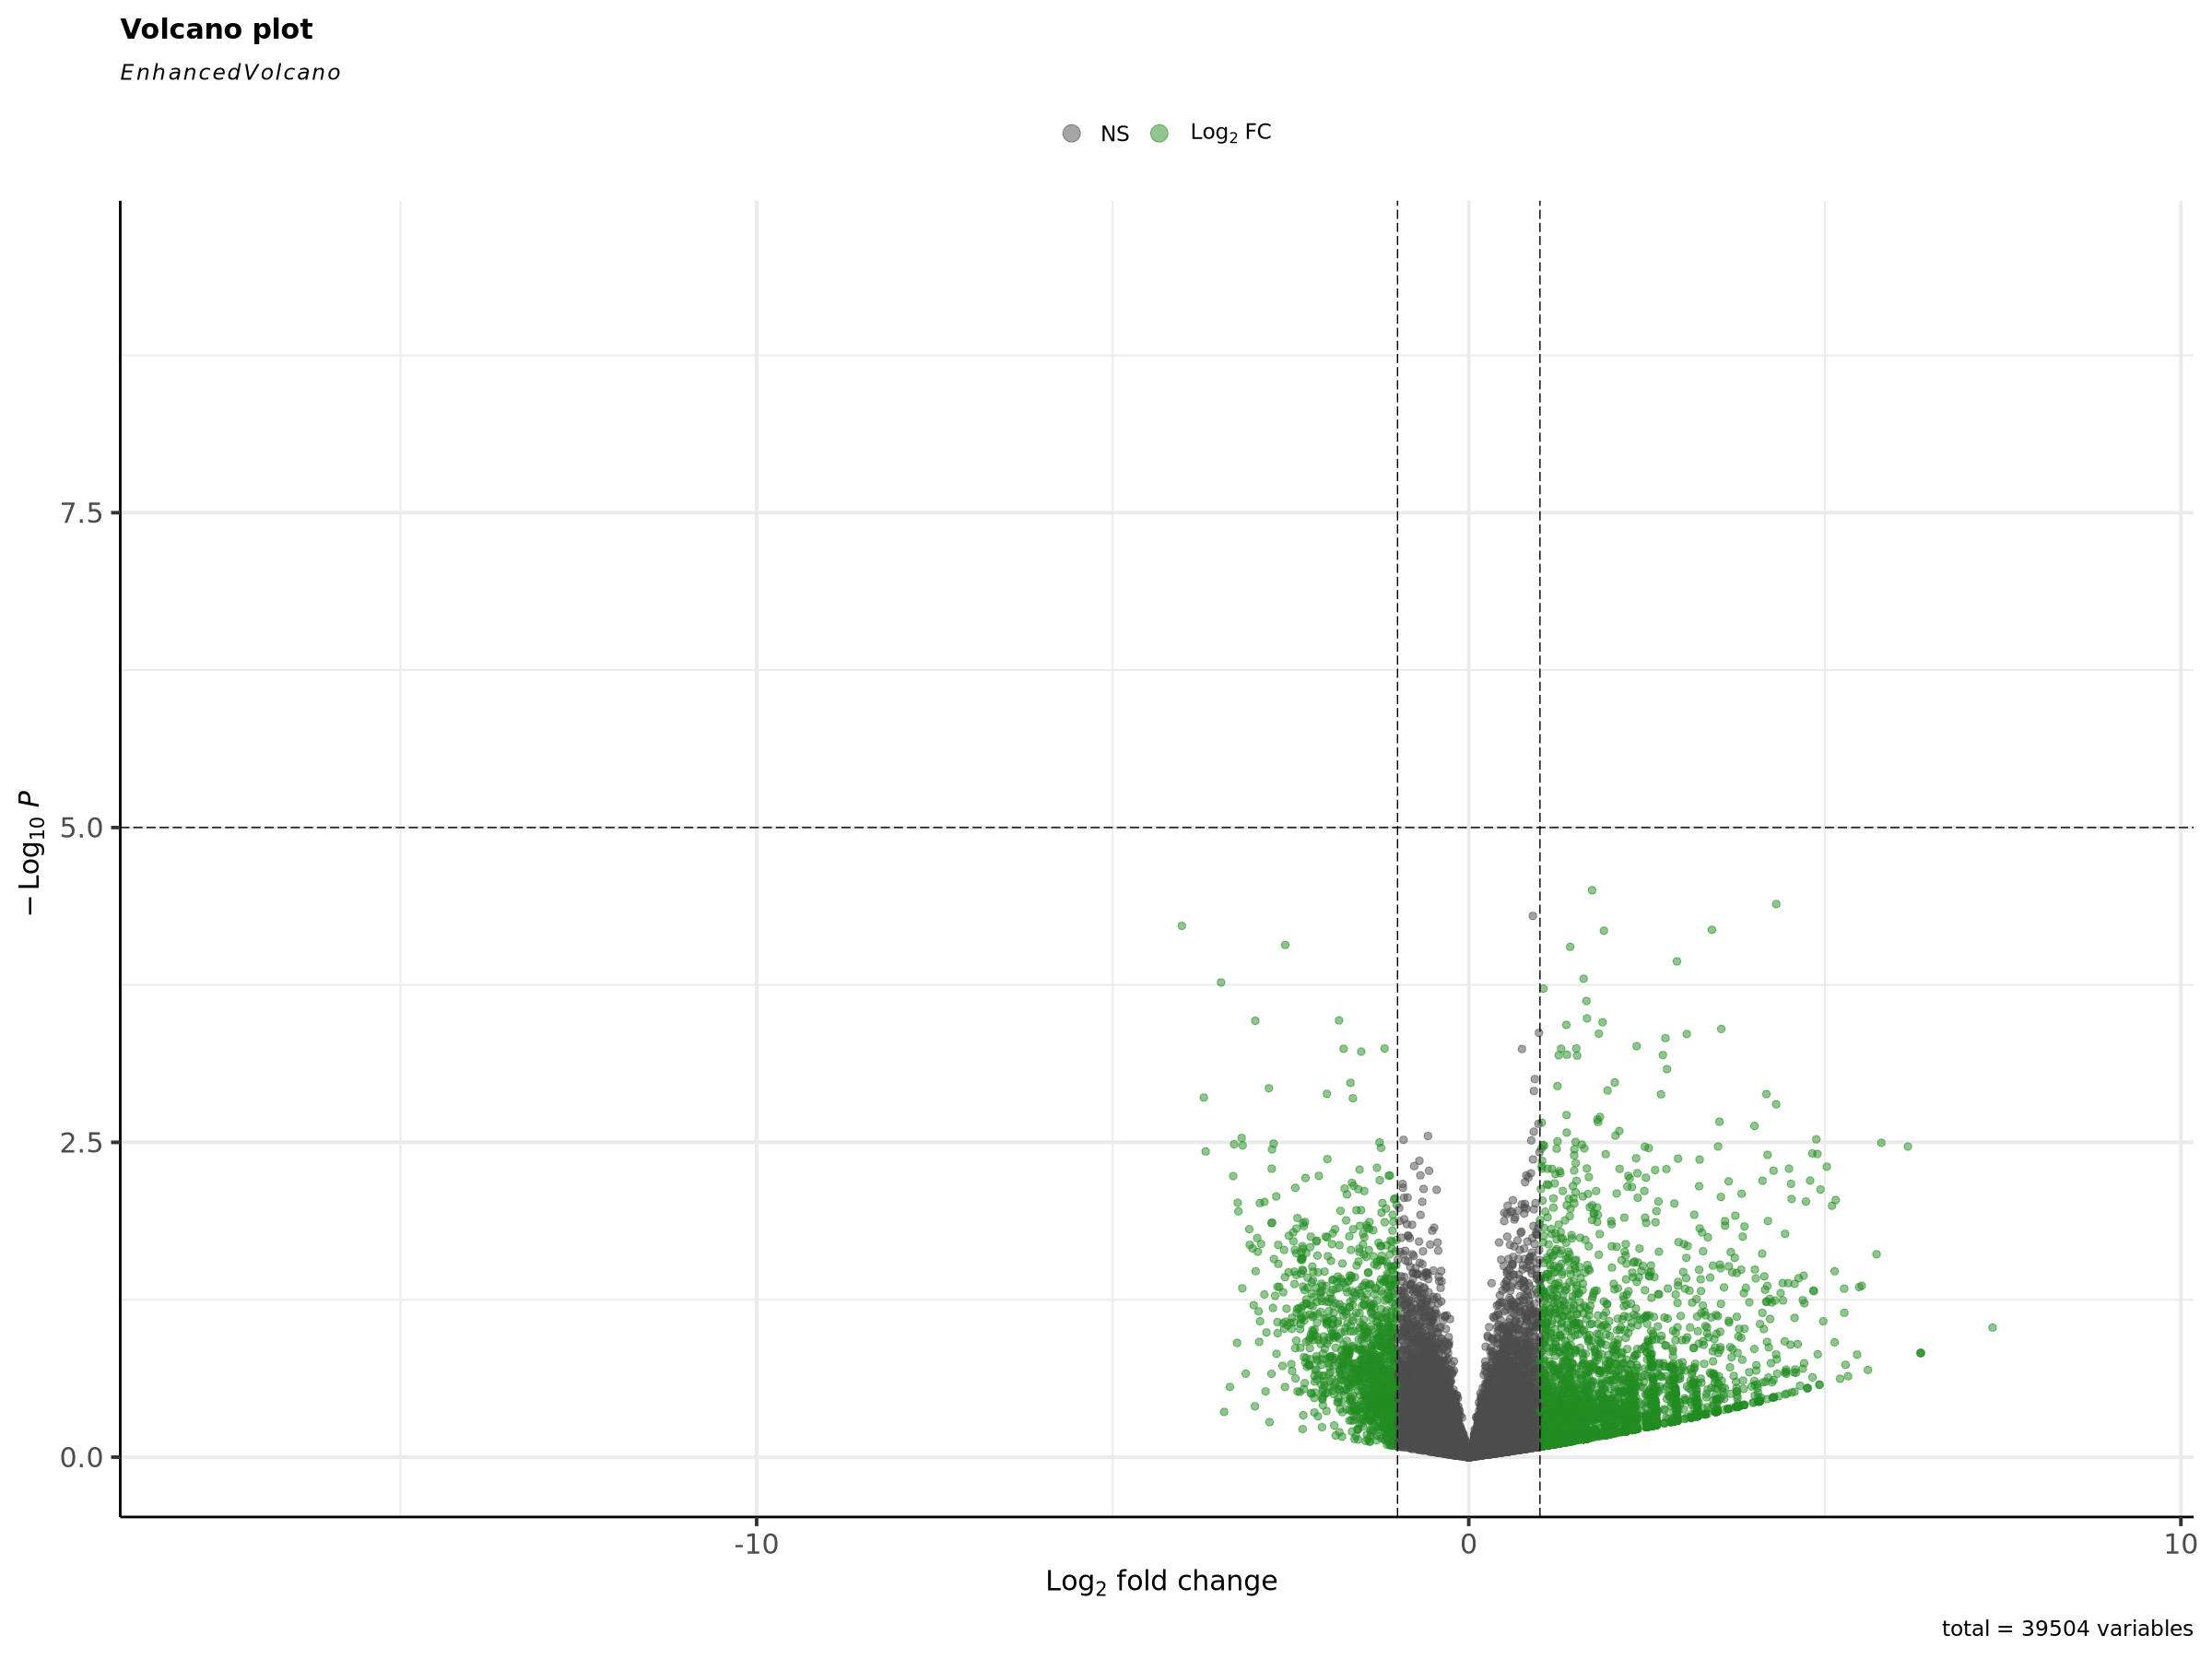

In [95]:
res=results(dds, name="TC1_hypoxic.warm_vs_hypoxic.ambient")
    
sig1_t = res[which(res$padj < 0.05), ]
     
dim(sig1_t)

summary(res)
   
EnhancedVolcano(res,
                lab=NA,
                x = 'log2FoldChange',
                y = 'pvalue')


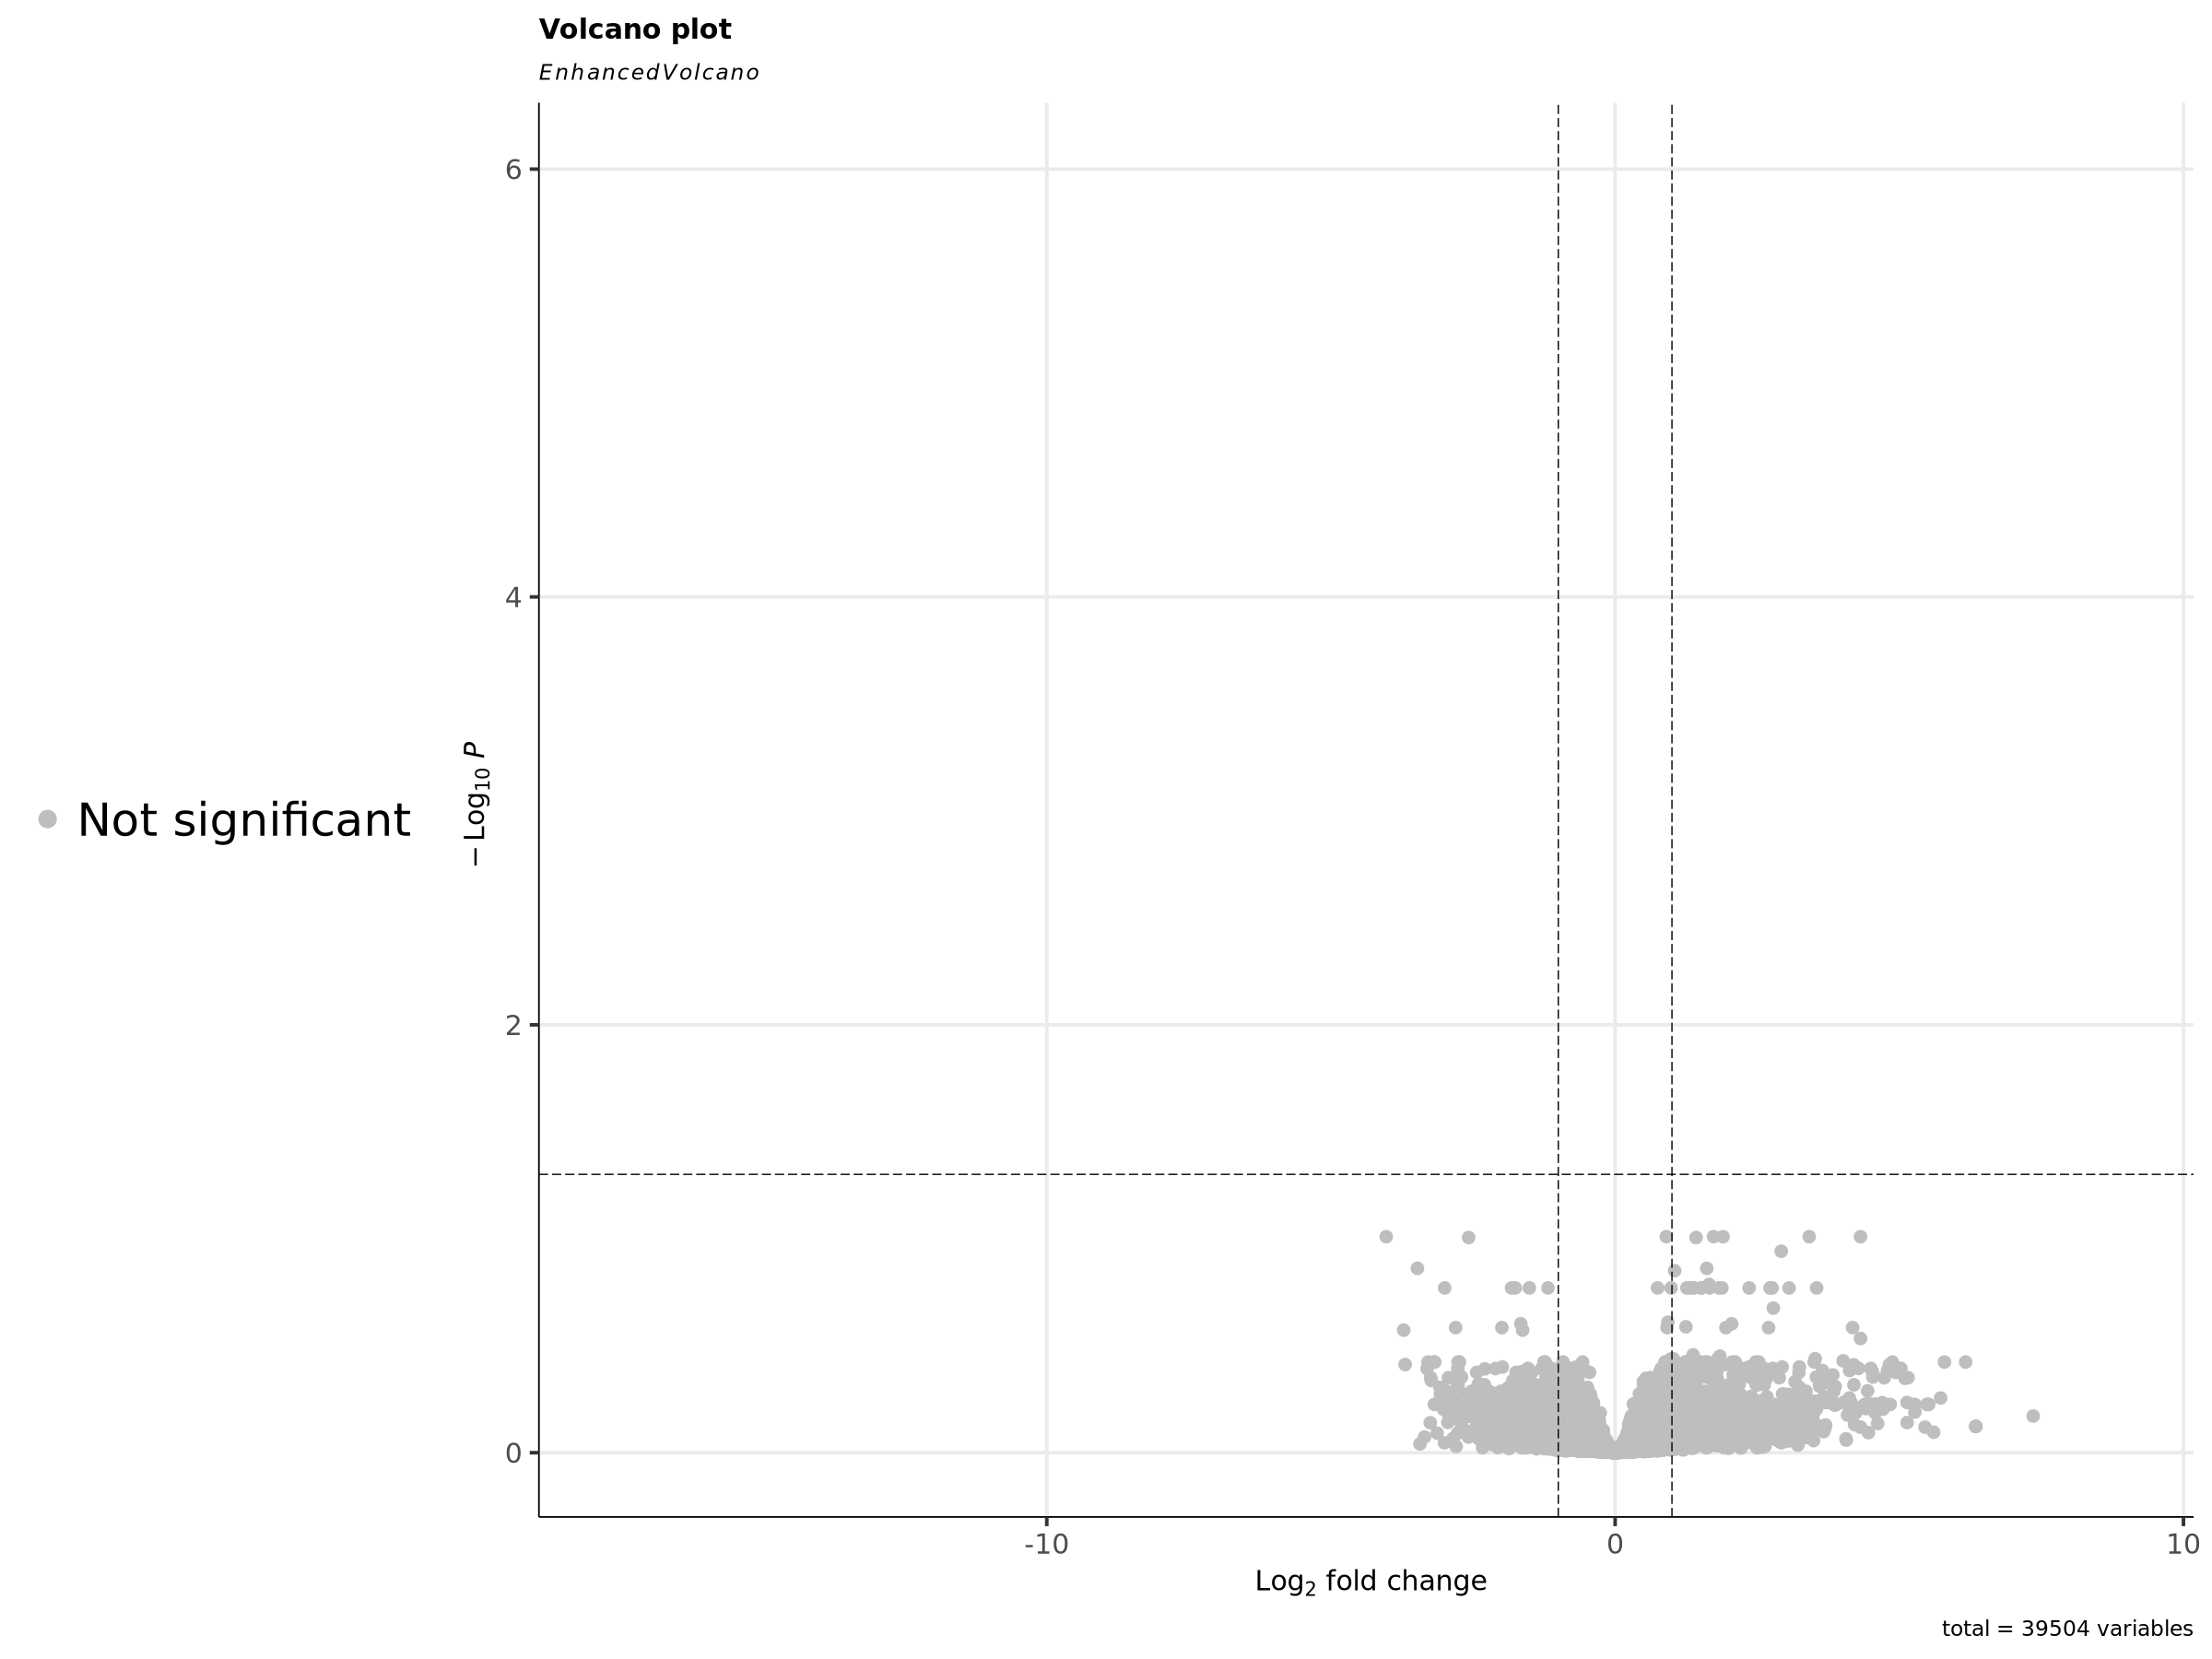

In [96]:
keyvals <- ifelse(
res$log2FoldChange < -1& res$padj <0.05, "#000066",
  ifelse(res$log2FoldChange > 1& res$padj <0.05,"#FF6666" ,
    'grey'))
keyvals[is.na(keyvals)] <- 'grey'
names(keyvals)[keyvals == "#FF6666"] <- 'More methylation in Hypoxic Warm'
names(keyvals)[keyvals == 'grey'] <- 'Not significant'
names(keyvals)[keyvals == "#000066"] <- 'More methylation in Hypoxic Ambient'

hw_plot <- EnhancedVolcano(res,
    lab = NA,
    x = 'log2FoldChange',
    y = 'padj',
    selectLab = rownames(res)[which(names(keyvals) %in% c('More methylation in Normoxic Warm', 'More methylation in Hypoxic Ambient'))],
    xlab = bquote(~Log[2]~ 'fold change'),
    pointSize = 3.5,
    pCutoff = 0.05,
    colCustom = keyvals,
    colAlpha = 1,
    legendPosition = 'left',
    legendLabSize = 30,
    legendIconSize = 5.0,
    drawConnectors = TRUE,
    widthConnectors = 1.0,
    colConnectors = 'black',
    arrowheads = FALSE,
    gridlines.major = TRUE,
    gridlines.minor = FALSE,
    border = 'partial',
    borderWidth = 0.5,
    borderColour = 'black')
hw_plot

TC1 normoxic warm vs hypoxic ambient

[1] 450   6


out of 17855 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 544, 3%
LFC < 0 (down)     : 40, 0.22%
outliers [1]       : 204, 1.1%
low counts [2]     : 11988, 67%
(mean count < 3)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



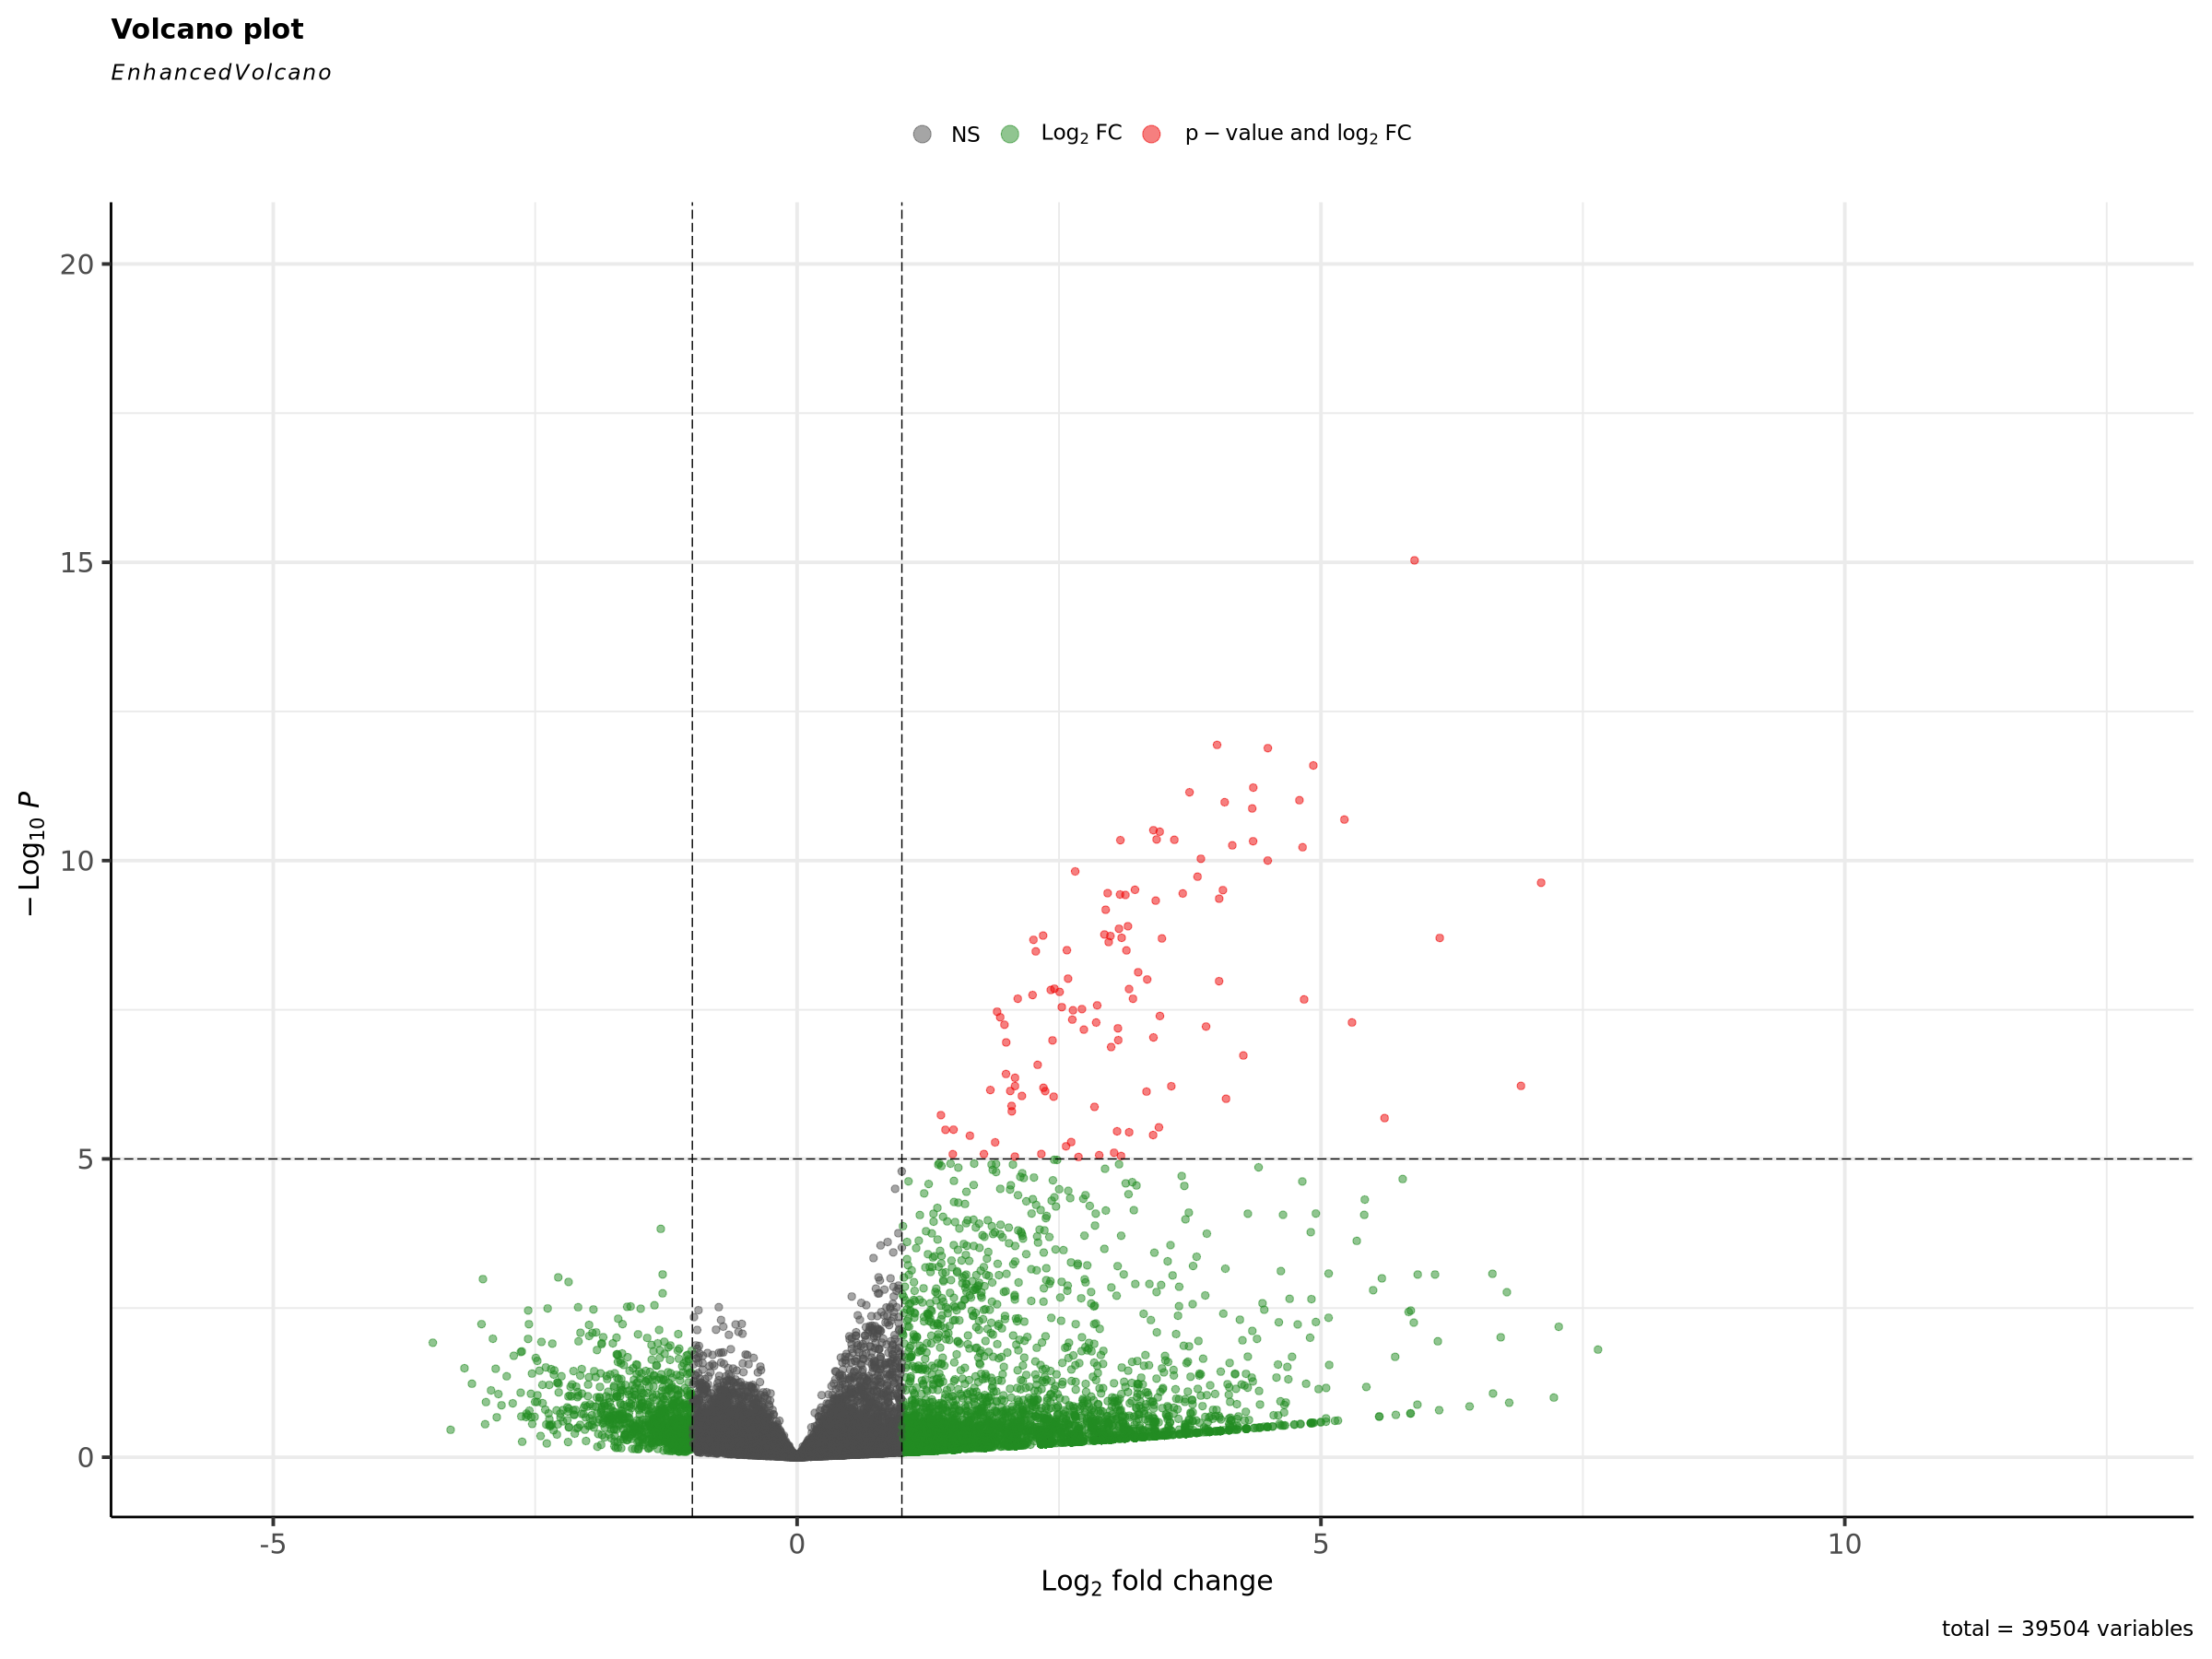

In [48]:
## this one has a lot of differential methylation
res=results(dds, name="TC1_normoxic.warm_vs_hypoxic.ambient")
    
sig1_t = res[which(res$padj < 0.05), ]
     
dim(sig1_t)

summary(res)

EnhancedVolcano(res,
                lab=NA,
                x = 'log2FoldChange',
                y = 'pvalue')

In [49]:
keyvals <- ifelse(
res$log2FoldChange < -1& res$padj <0.05, "#000066",
  ifelse(res$log2FoldChange > 1& res$padj <0.05,"#FF6666" ,
    'grey'))
keyvals[is.na(keyvals)] <- 'grey'
names(keyvals)[keyvals == "#FF6666"] <- 'More methylation in Normoxic Warm'
names(keyvals)[keyvals == 'grey'] <- 'Not significant'
names(keyvals)[keyvals == "#000066"] <- 'More methylation in Hypoxic Ambient'

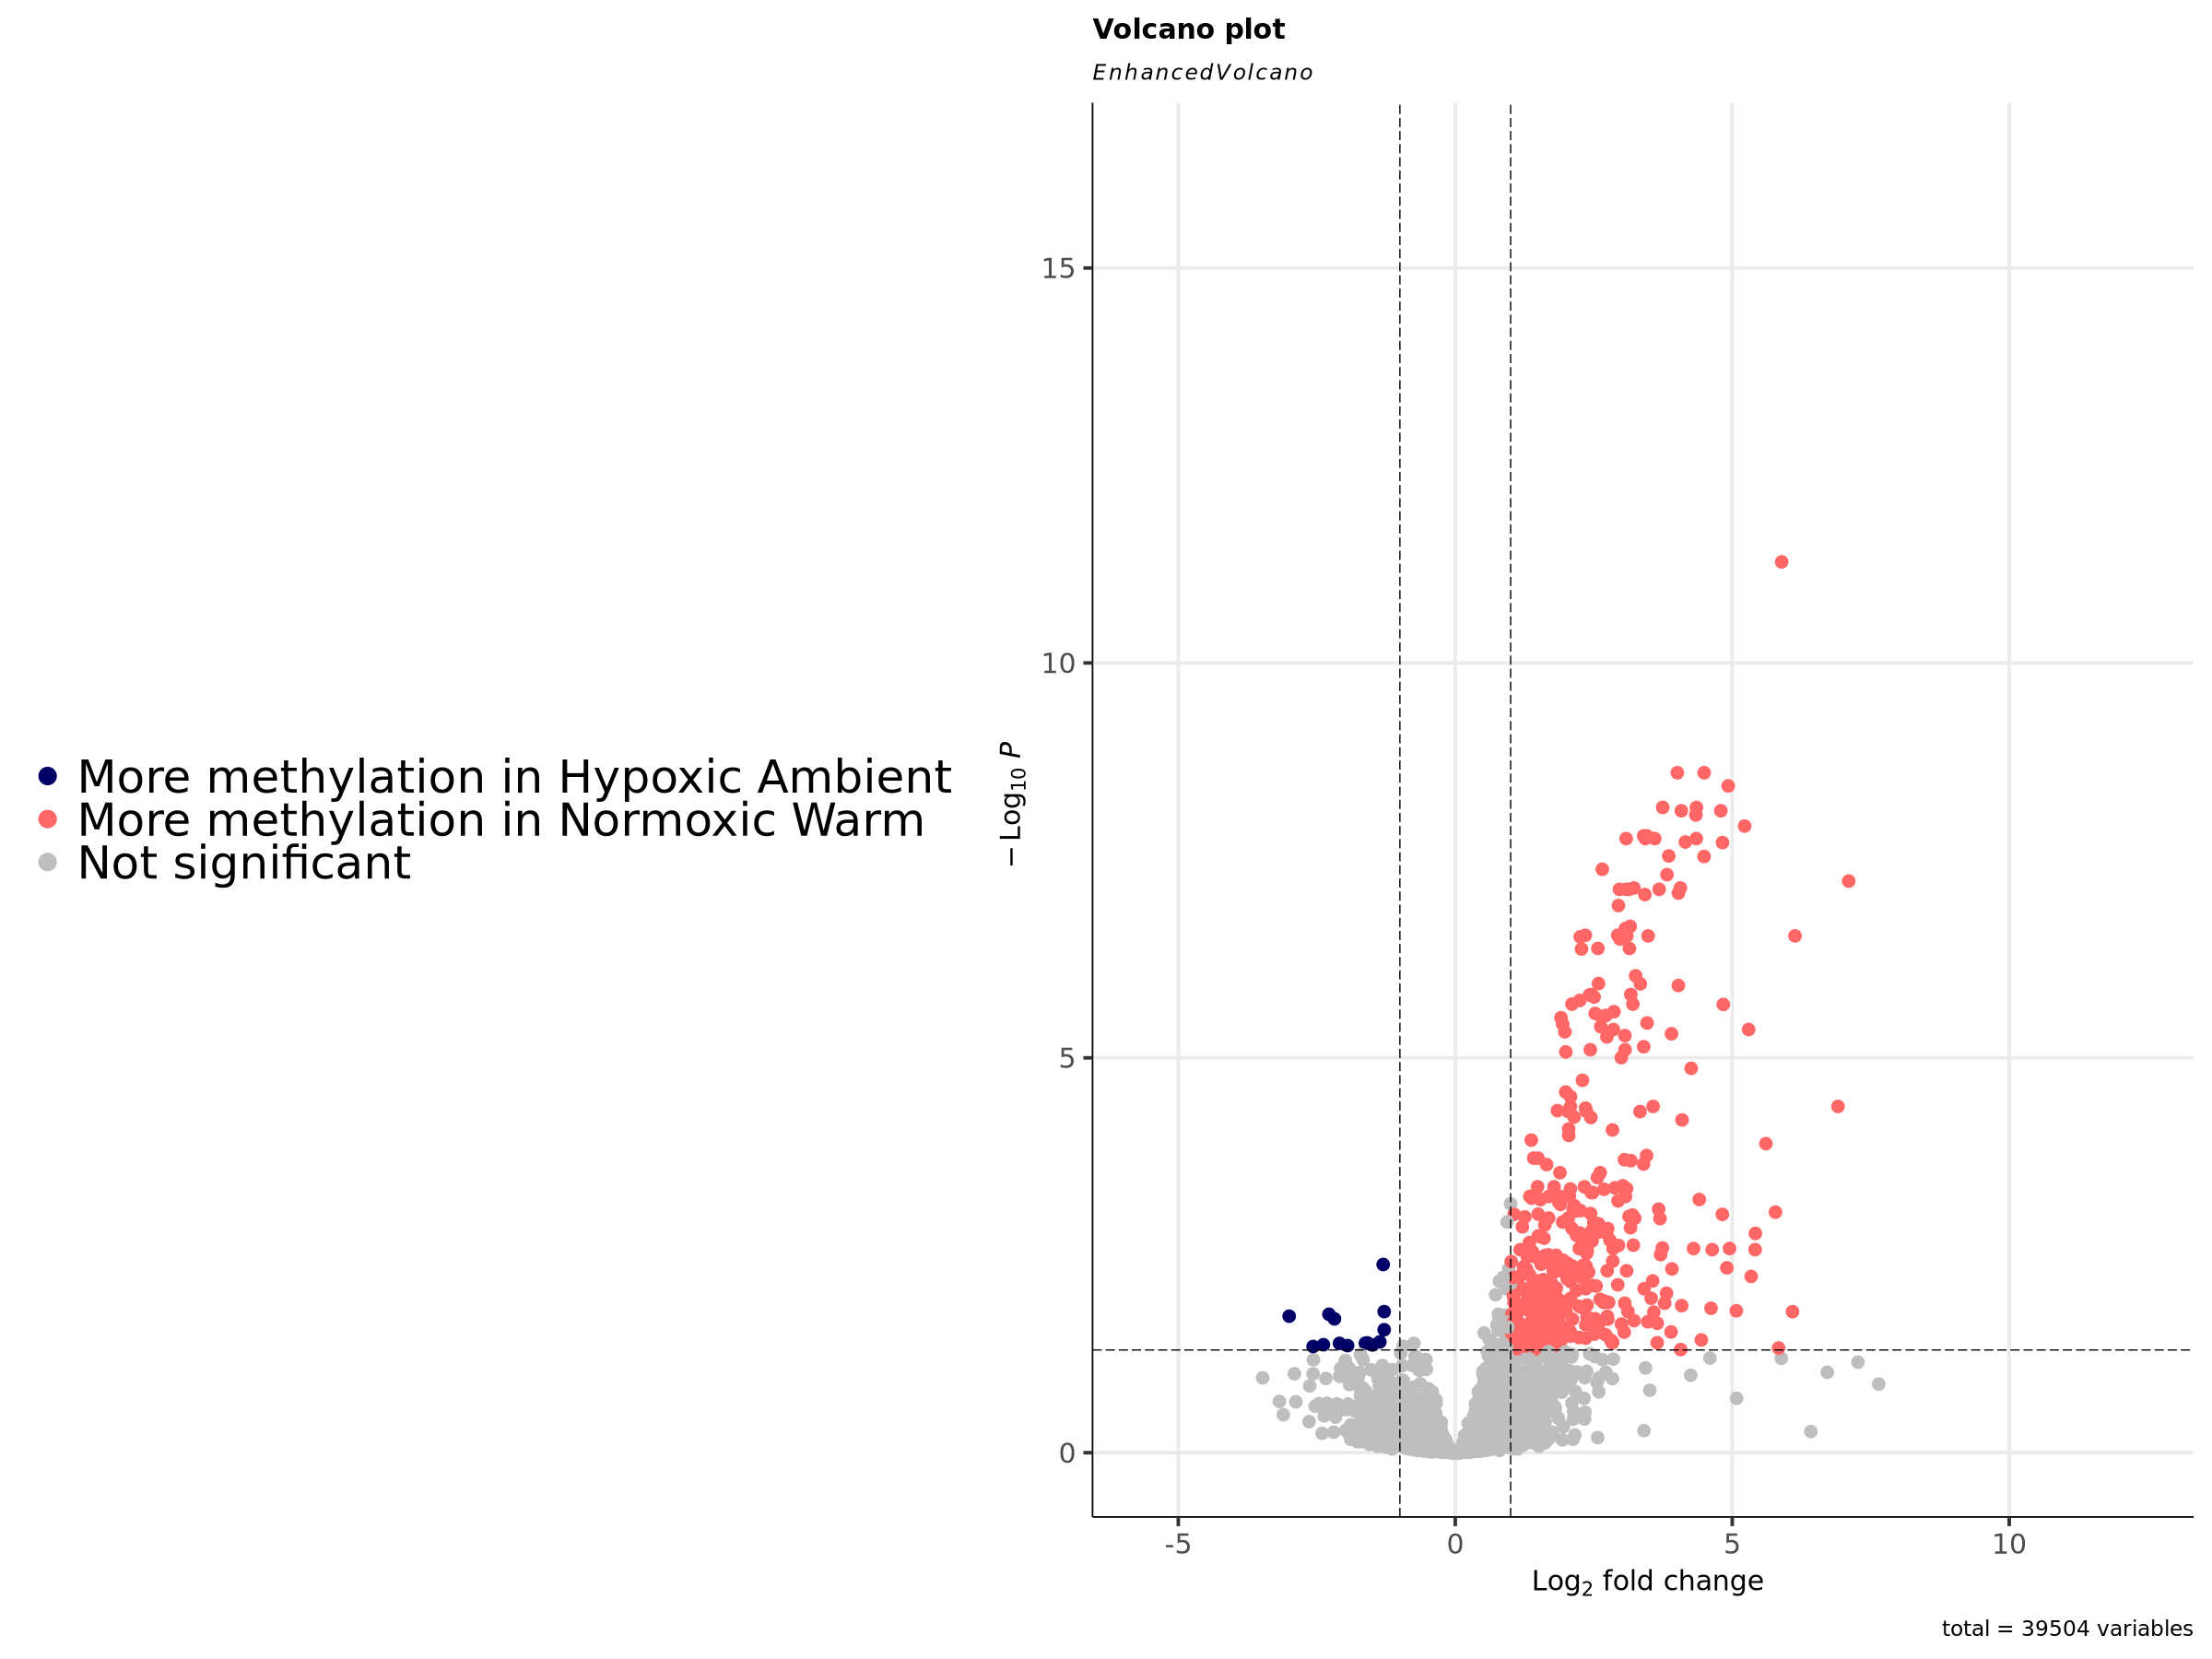

In [50]:
TC1_plot <- EnhancedVolcano(res,
    lab = NA,
    x = 'log2FoldChange',
    y = 'padj',
    selectLab = rownames(res)[which(names(keyvals) %in% c('More methylation in Normoxic Warm', 'More methylation in Hypoxic Ambient'))],
    xlab = bquote(~Log[2]~ 'fold change'),
    pointSize = 3.5,
    pCutoff = 0.05,
    colCustom = keyvals,
    colAlpha = 1,
    legendPosition = 'left',
    legendLabSize = 30,
    legendIconSize = 5.0,
    drawConnectors = TRUE,
    widthConnectors = 1.0,
    colConnectors = 'black',
    arrowheads = FALSE,
    gridlines.major = TRUE,
    gridlines.minor = FALSE,
    border = 'partial',
    borderWidth = 0.5,
    borderColour = 'black')
TC1_plot

saving plot as PDF

In [51]:
# Open a pdf file
setwd("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/figures")
pdf("TC1_nw_v_ha.pdf", width=20, height=10) 
# 2. Create a plot
TC1_plot
# Close the pdf filegb
dev.off() 

png 
  2

In [52]:
summary(res)
sig1_t=as.data.frame(sig1_t)
head(sig1_t)
# adding meta data 
match_rows = rownames(gtf_genes1) %in% rownames(sig1_t)
gtf_match = gtf_genes1[match_rows,]

sig_1t_stress = cbind(sig1_t, gtf_match)
head(sig_1t_stress)

write.csv(sig_1t_stress, "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/significant_genes/sig_TC1_normoxic.warm_vs_hypoxic.ambient.csv")


out of 17855 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 544, 3%
LFC < 0 (down)     : 40, 0.22%
outliers [1]       : 204, 1.1%
low counts [2]     : 11988, 67%
(mean count < 3)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



baseMean   log2FoldChange lfcSE     stat     pvalue      
LOC111099115  46.830689 1.5385408      0.3811074 4.037027 5.413293e-05
LOC111099216  29.511649 1.8984107      0.4339414 4.374809 1.215387e-05
LOC111099417  51.700107 3.1694275      0.6838457 4.634712 3.574351e-06
LOC111099424  16.127470 2.5825807      0.8045603 3.209928 1.327682e-03
LOC111099722 593.622300 0.9989315      0.2316556 4.312141 1.616812e-05
LOC111099767   3.876224 4.9030366      1.3035026 3.761432 1.689433e-04
             padj        
LOC111099115 0.0018376023
LOC111099216 0.0005697239
LOC111099417 0.0002006237
LOC111099424 0.0222681373
LOC111099722 0.0007050543
LOC111099767 0.0045606649

baseMean   log2FoldChange lfcSE     stat     pvalue      
LOC111099115  46.830689 1.5385408      0.3811074 4.037027 5.413293e-05
LOC111099216  29.511649 1.8984107      0.4339414 4.374809 1.215387e-05
LOC111099417  51.700107 3.1694275      0.6838457 4.634712 3.574351e-06
LOC111099424  16.127470 2.5825807      0.8045603 3.209928 1.327682e-03
LOC111099722 593.622300 0.9989315      0.2316556 4.312141 1.616812e-05
LOC111099767   3.876224 4.9030366      1.3035026 3.761432 1.689433e-04
             padj         seqname     source feature start   end     score
LOC111099115 0.0018376023 NC_035780.1 Gnomon gene     315522  340261 .    
LOC111099216 0.0005697239 NC_035780.1 Gnomon gene     394983  409280 .    
LOC111099417 0.0002006237 NC_035780.1 Gnomon gene     544088  573497 .    
LOC111099424 0.0222681373 NC_035780.1 Gnomon gene     663525  671754 .    
LOC111099722 0.0007050543 NC_035780.1 Gnomon gene    1982711 1993041 .    
LOC111099767 0.0045606649 NC_035780.1 Gnomon gene    2028071 2046722 .    
             strand frame
LOC111099115 +      .    
LOC111099216 -      .    
LOC111099417 +      .    
LOC111099424 -      .    
LOC111099722 -      .    
LOC111099767 -      .    
             attributes                                                                                                            
LOC111099115 gene_id "LOC111133260"; db_xref "GeneID:111133260"; gbkey "Gene"; gene "LOC111133260"; gene_biotype "protein_coding"; 
LOC111099216 gene_id "LOC111117672"; db_xref "GeneID:111117672"; gbkey "Gene"; gene "LOC111117672"; gene_biotype "protein_coding"; 
LOC111099417 gene_id "LOC111114201"; db_xref "GeneID:111114201"; gbkey "Gene"; gene "LOC111114201"; gene_biotype "protein_coding"; 
LOC111099424 gene_id "LOC111121058"; db_xref "GeneID:111121058"; gbkey "Gene"; gene "LOC111121058"; gene_biotype "protein_coding"; 
LOC111099722 gene_id "LOC111104153"; db_xref "GeneID:111104153"; gbkey "Gene"; gene "LOC111104153"; gene_biotype "protein_coding"; 
LOC111099767 gene_id "LOC111121733"; db_xref "GeneID:111121733"; gbkey "Gene"; gene "LOC111121733"; gene_biotype "protein_coding";

TC1 normoxic ambient vs hypoxic ambient

[1] 1 6

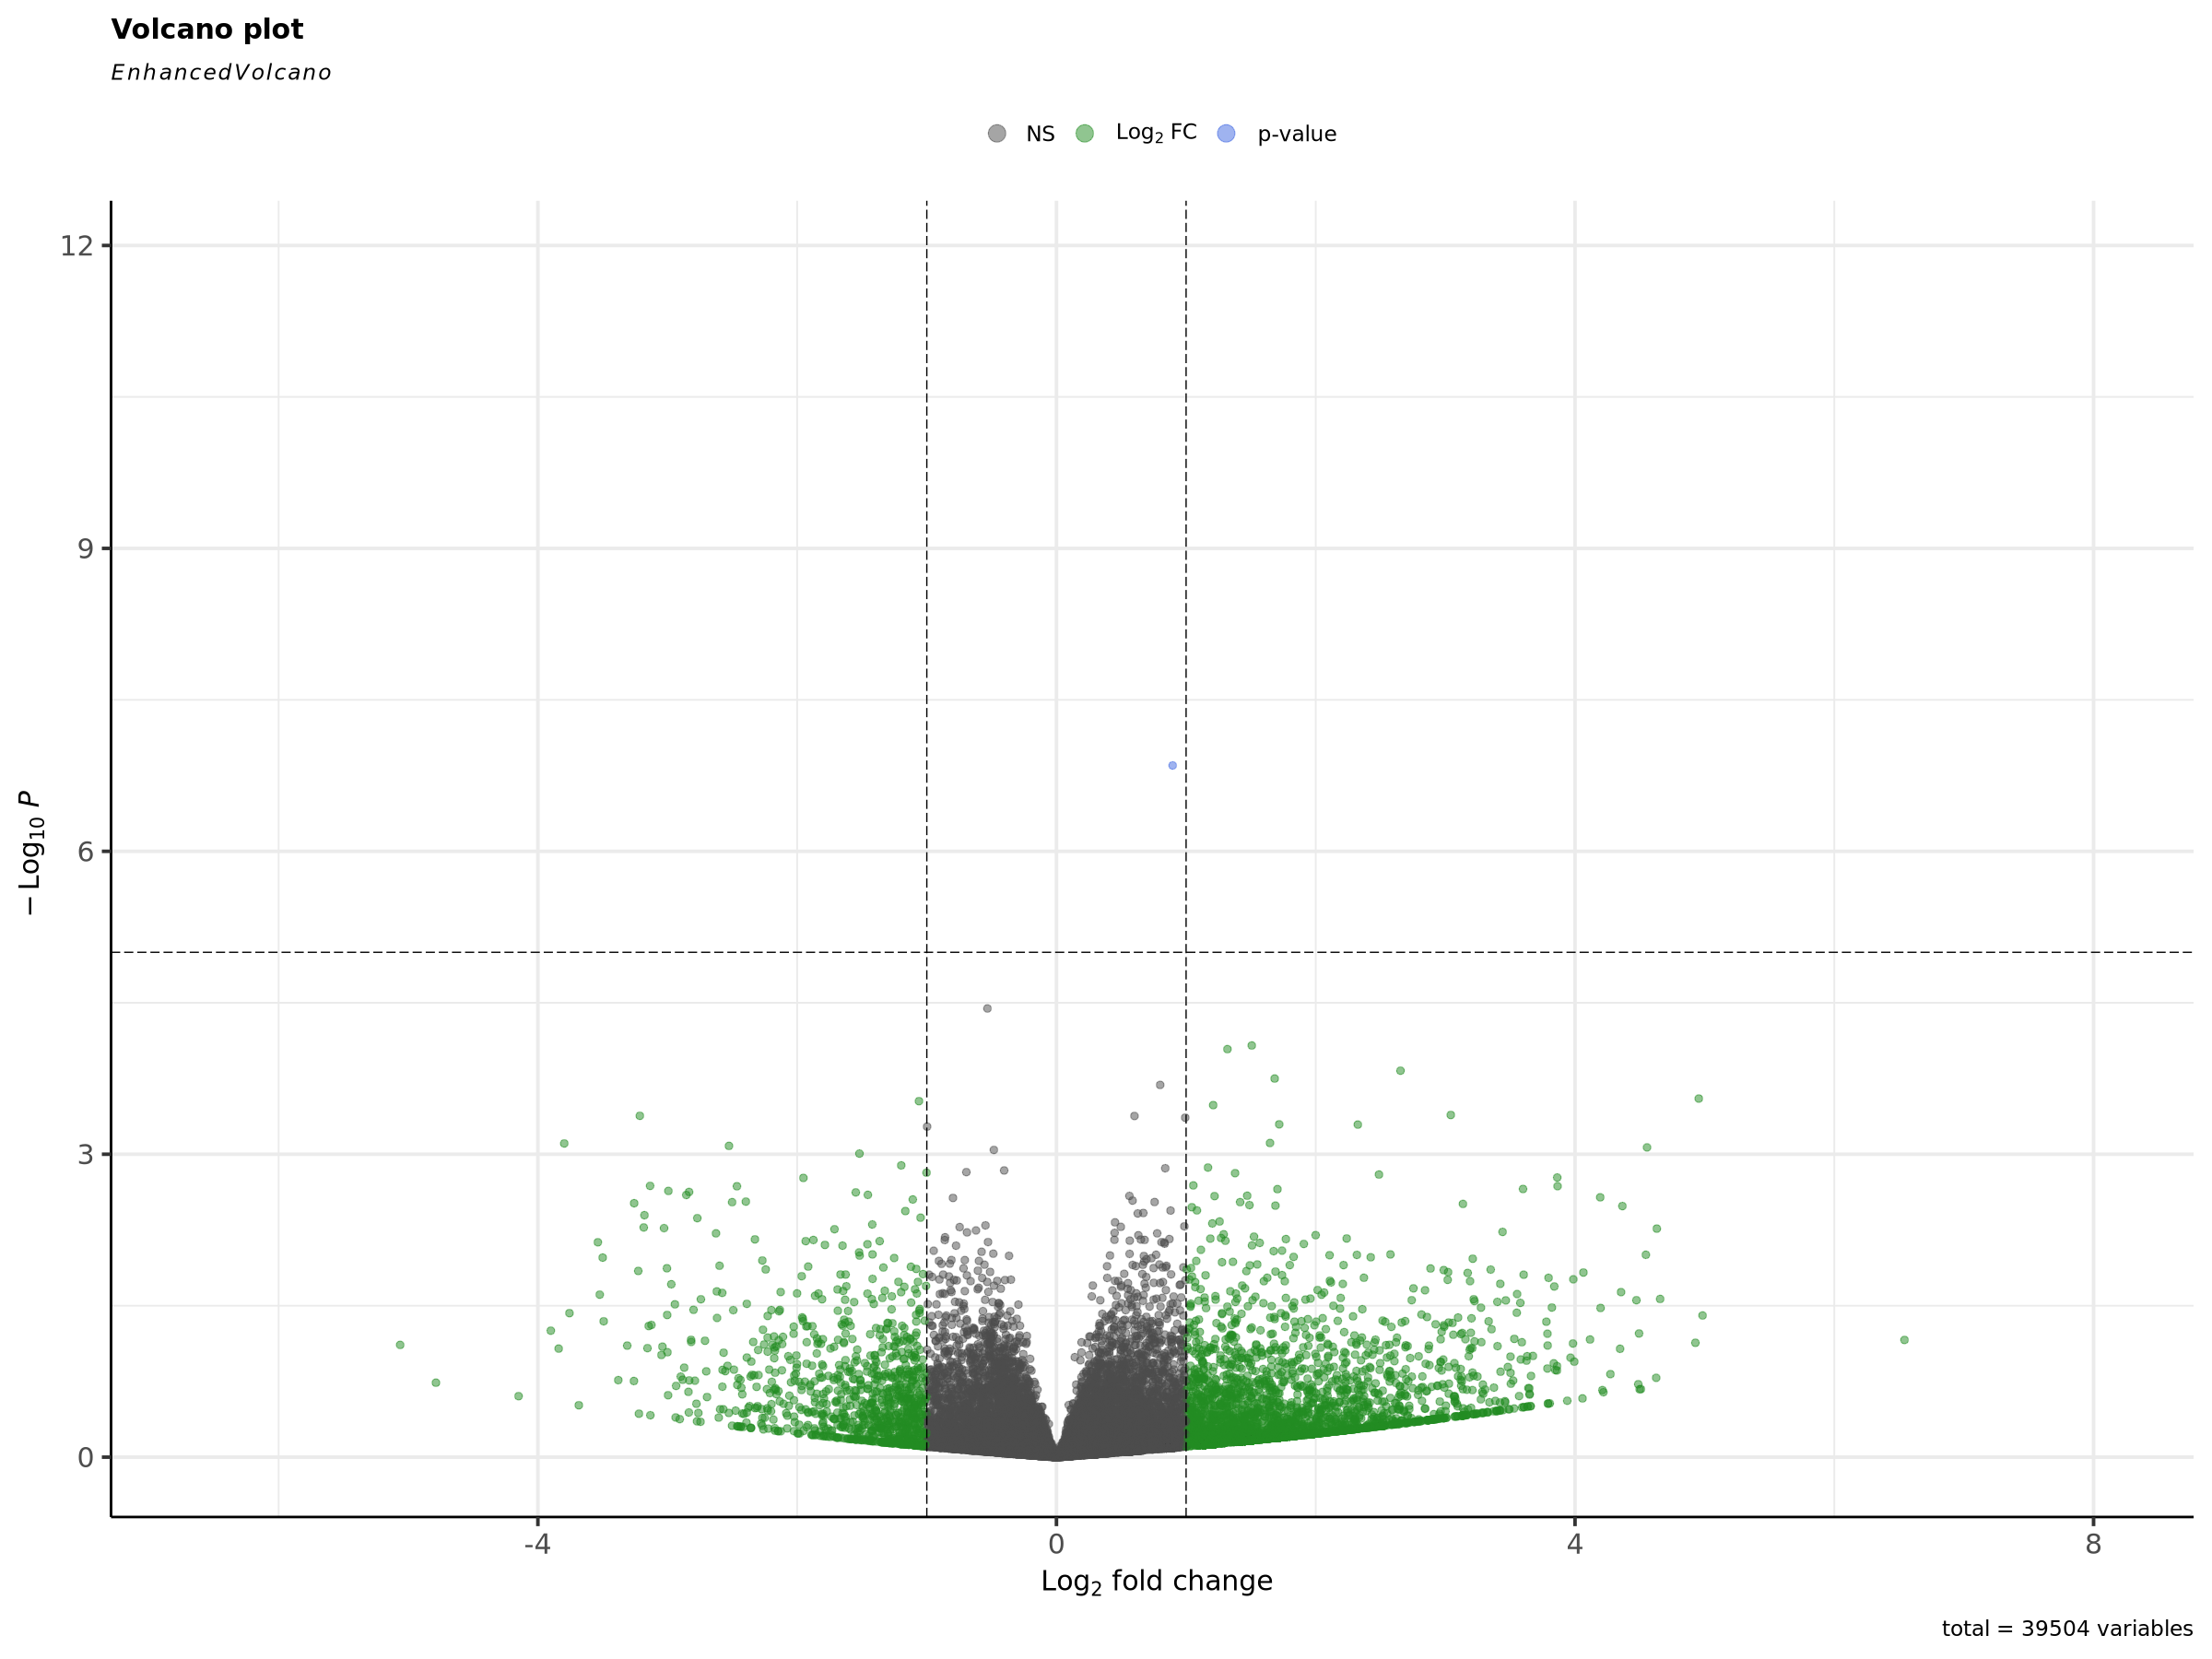

In [99]:
res=results(dds, name="TC1_normoxic.ambient_vs_hypoxic.ambient")

sig1_t = res[which(res$padj < 0.05), ]
     
dim(sig1_t)
   

EnhancedVolcano(res,
                lab=NA,
                x = 'log2FoldChange',
                y = 'pvalue')

#### design= ~TC2

In [101]:
dds <- DESeqDataSetFromMatrix(countData = counts_gene,
                              colData = meta,
                              design= ~ TC2)
dds=DESeq(dds)
resultsNames(dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
 

[1] "Intercept"                              
[2] "TC2_hypoxic.warm_vs_hypoxic.ambient"    
[3] "TC2_normoxic.ambient_vs_hypoxic.ambient"

TC2 hypoxic warm vs hypoxic ambient

[1] 31  6


out of 17852 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 115, 0.64%
LFC < 0 (down)     : 9, 0.05%
outliers [1]       : 0, 0%
low counts [2]     : 14913, 84%
(mean count < 11)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



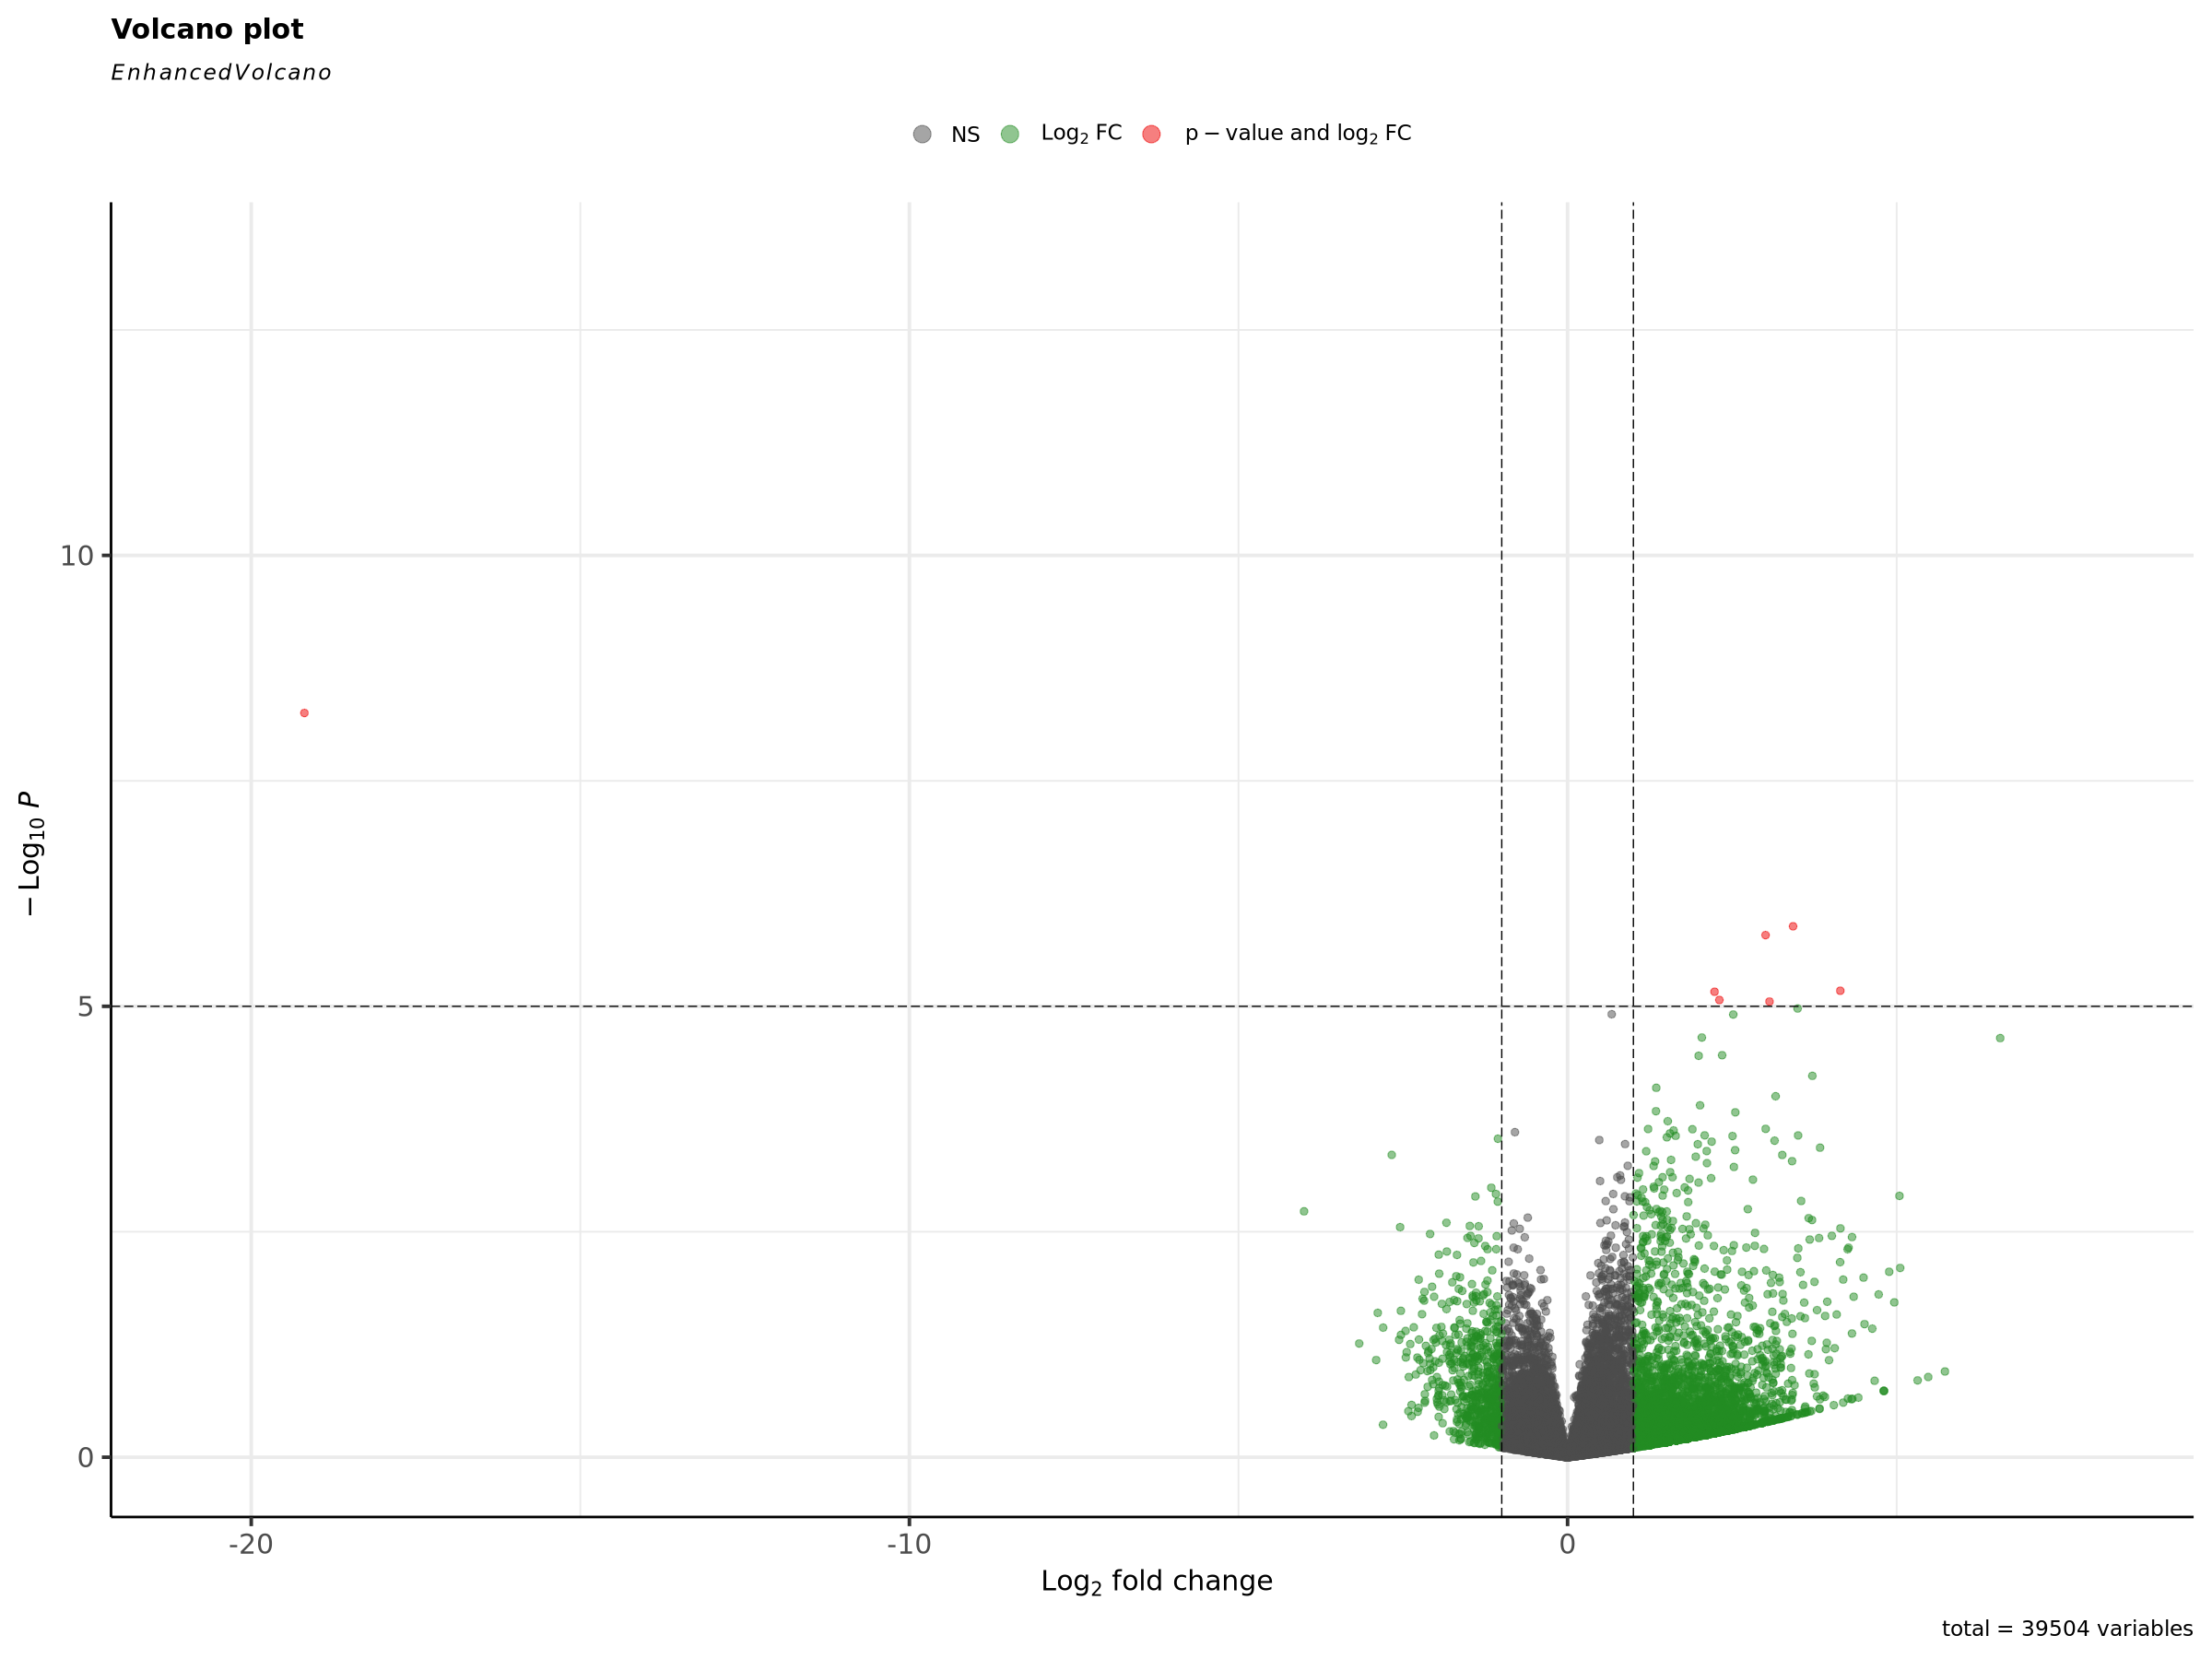

In [102]:
res=results(dds, name="TC2_hypoxic.warm_vs_hypoxic.ambient")
    
sig1_t = res[which(res$padj < 0.05), ]
     
dim(sig1_t)

summary(res)
   
EnhancedVolcano(res,
                lab=NA,
                x = 'log2FoldChange',
                y = 'pvalue')

In [103]:
keyvals <- ifelse(
res$log2FoldChange < -1& res$padj <0.05, "#000066",
  ifelse(res$log2FoldChange > 1& res$padj <0.05,"#FF6666" ,
    'grey'))
keyvals[is.na(keyvals)] <- 'grey'
names(keyvals)[keyvals == "#FF6666"] <- 'More methylation in Hypoxic Warm'
names(keyvals)[keyvals == 'grey'] <- 'Not significant'
names(keyvals)[keyvals == "#000066"] <- 'More methylation in Hypoxic Ambient'

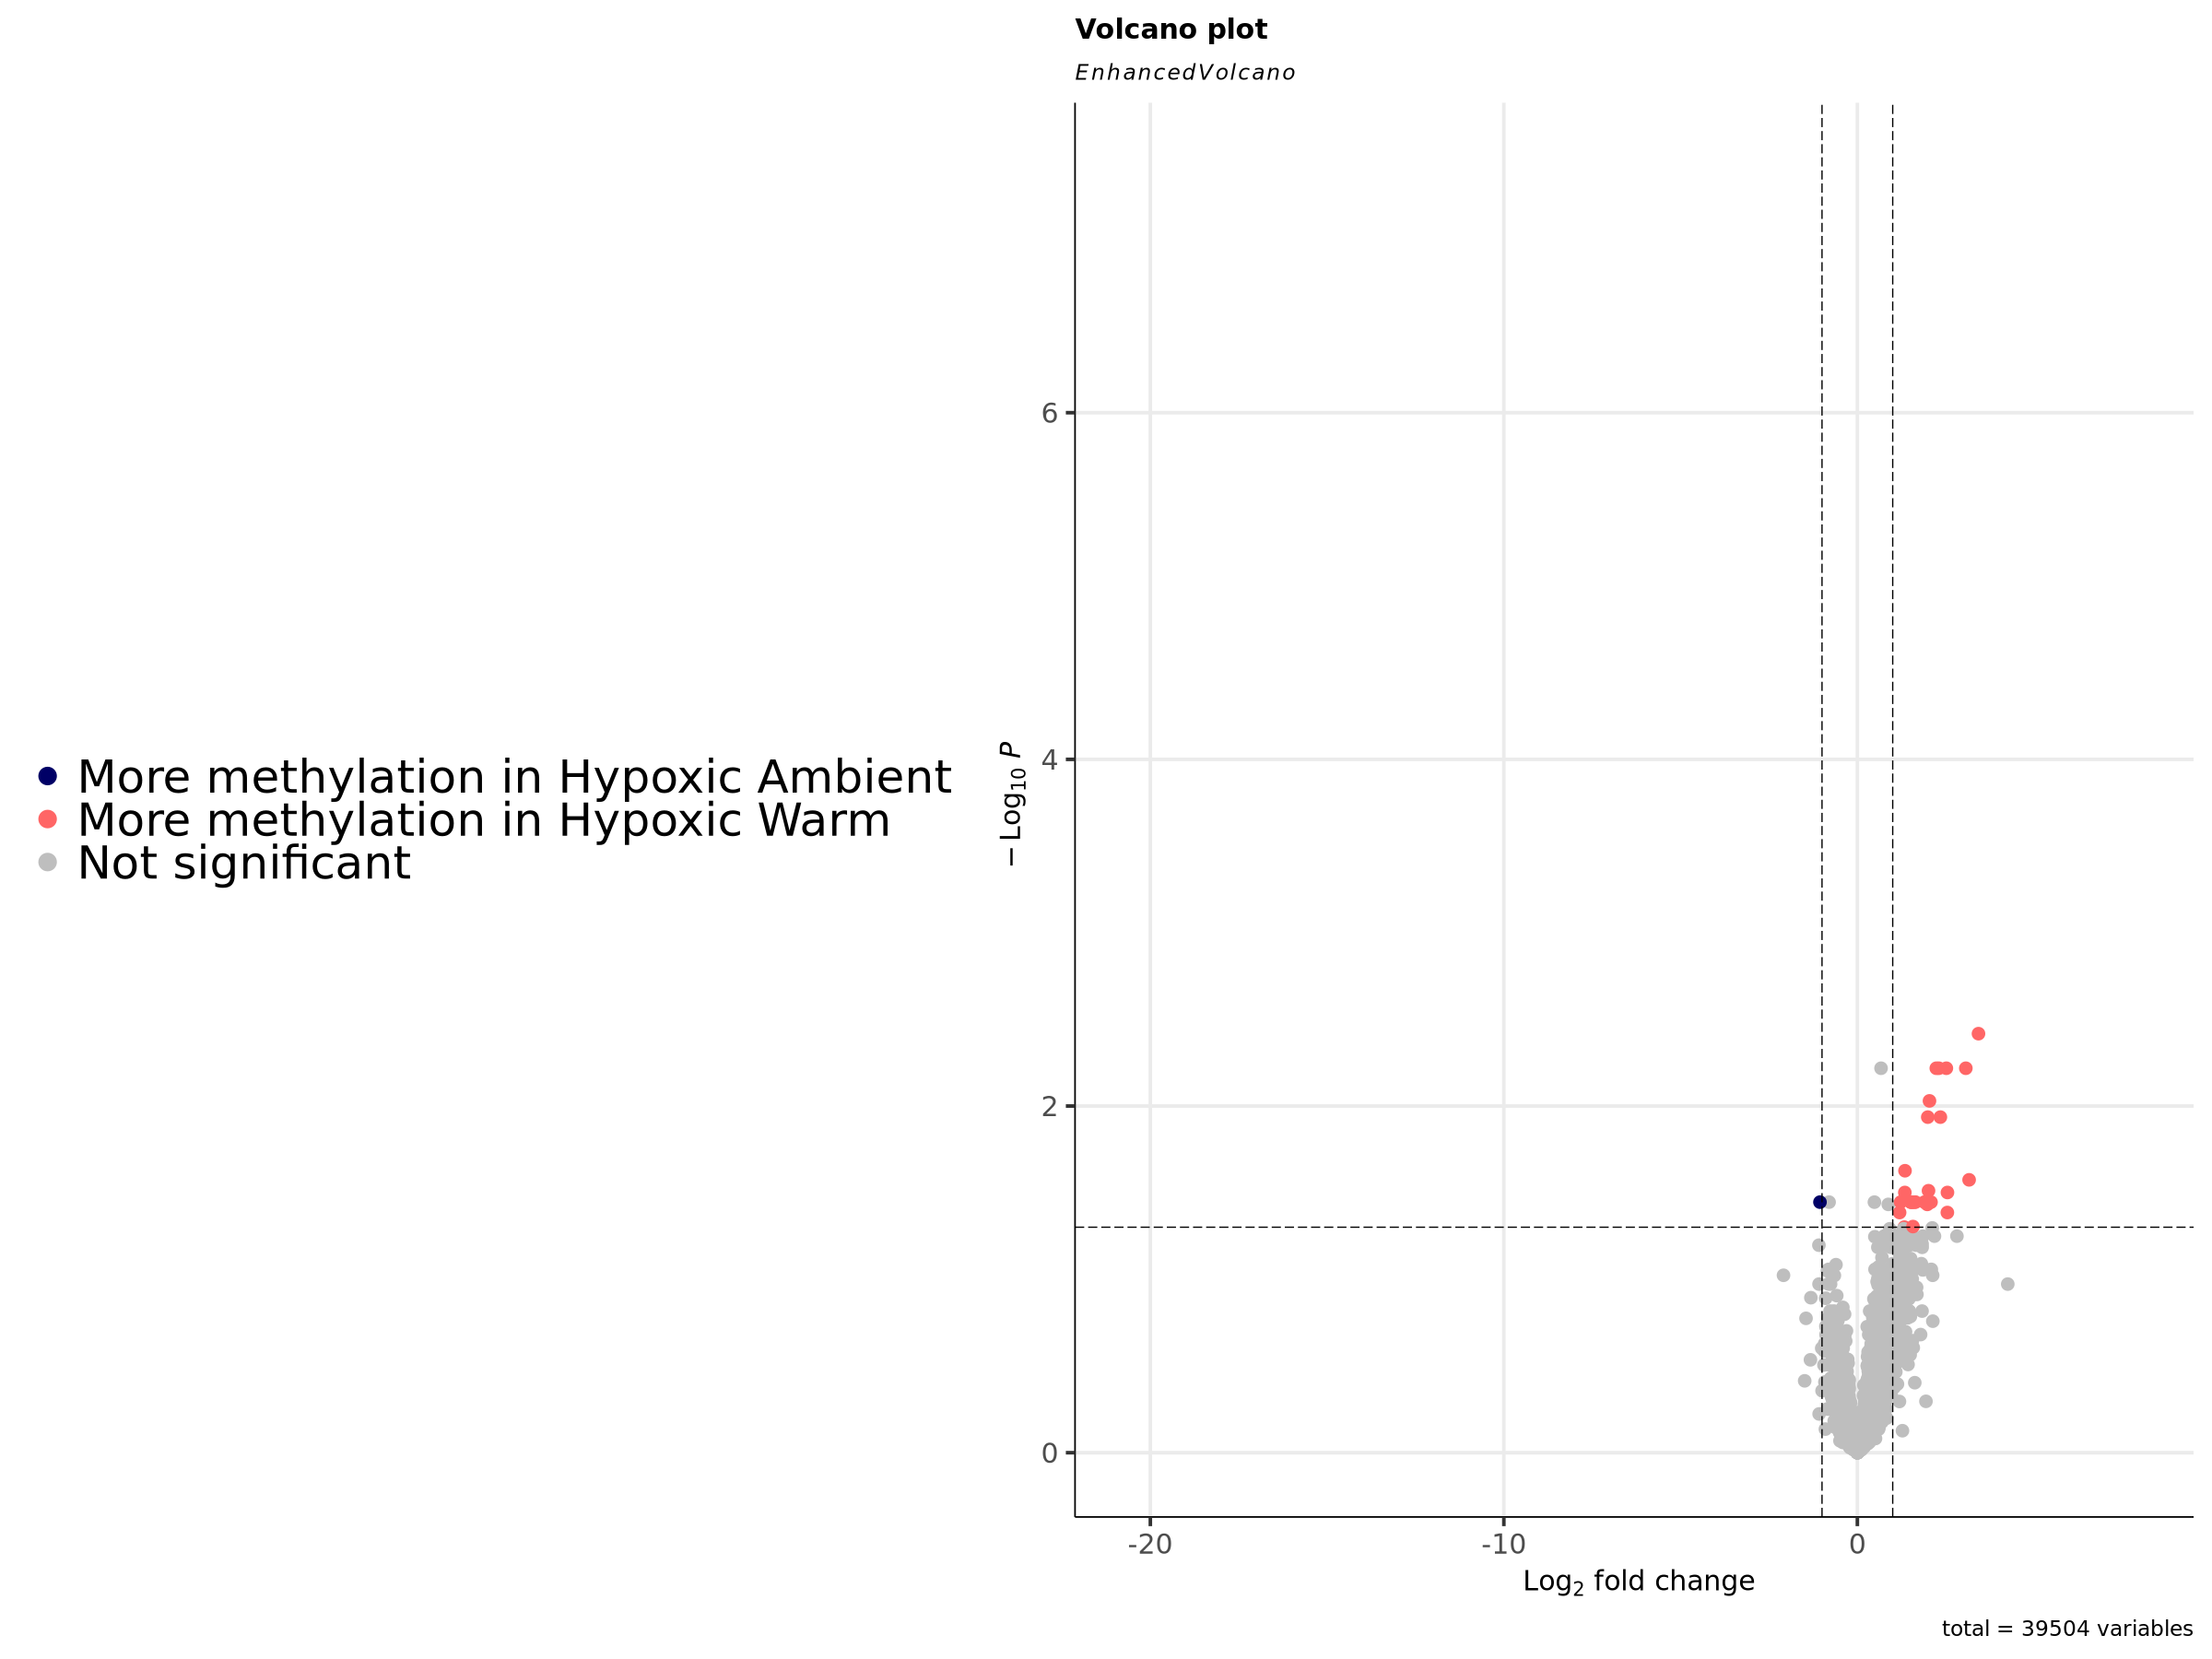

In [104]:
TC2_plot <- EnhancedVolcano(res,
    lab = NA,
    x = 'log2FoldChange',
    y = 'padj',
    selectLab = rownames(res)[which(names(keyvals) %in% c('More methylation in Normoxic Warm', 'More methylation in Hypoxic Ambient'))],
    xlab = bquote(~Log[2]~ 'fold change'),
    pointSize = 3.5,
    pCutoff = 0.05,
    colCustom = keyvals,
    colAlpha = 1,
    legendPosition = 'left',
    legendLabSize = 30,
    legendIconSize = 5.0,
    drawConnectors = TRUE,
    widthConnectors = 1.0,
    colConnectors = 'black',
    arrowheads = FALSE,
    gridlines.major = TRUE,
    gridlines.minor = FALSE,
    border = 'partial',
    borderWidth = 0.5,
    borderColour = 'black')

TC2_plot

In [108]:
# Open a pdf file
setwd("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/figures")
pdf("TC2_hw_v_ha.pdf", width=20, height=10) 
# 2. Create a plot
TC2_plot
# Close the pdf file
dev.off() 

png 
  2

TC2 normoxic ambient vs hypoxic ambient

[1] 19  6


out of 17852 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 33, 0.18%
LFC < 0 (down)     : 54, 0.3%
outliers [1]       : 0, 0%
low counts [2]     : 10701, 60%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



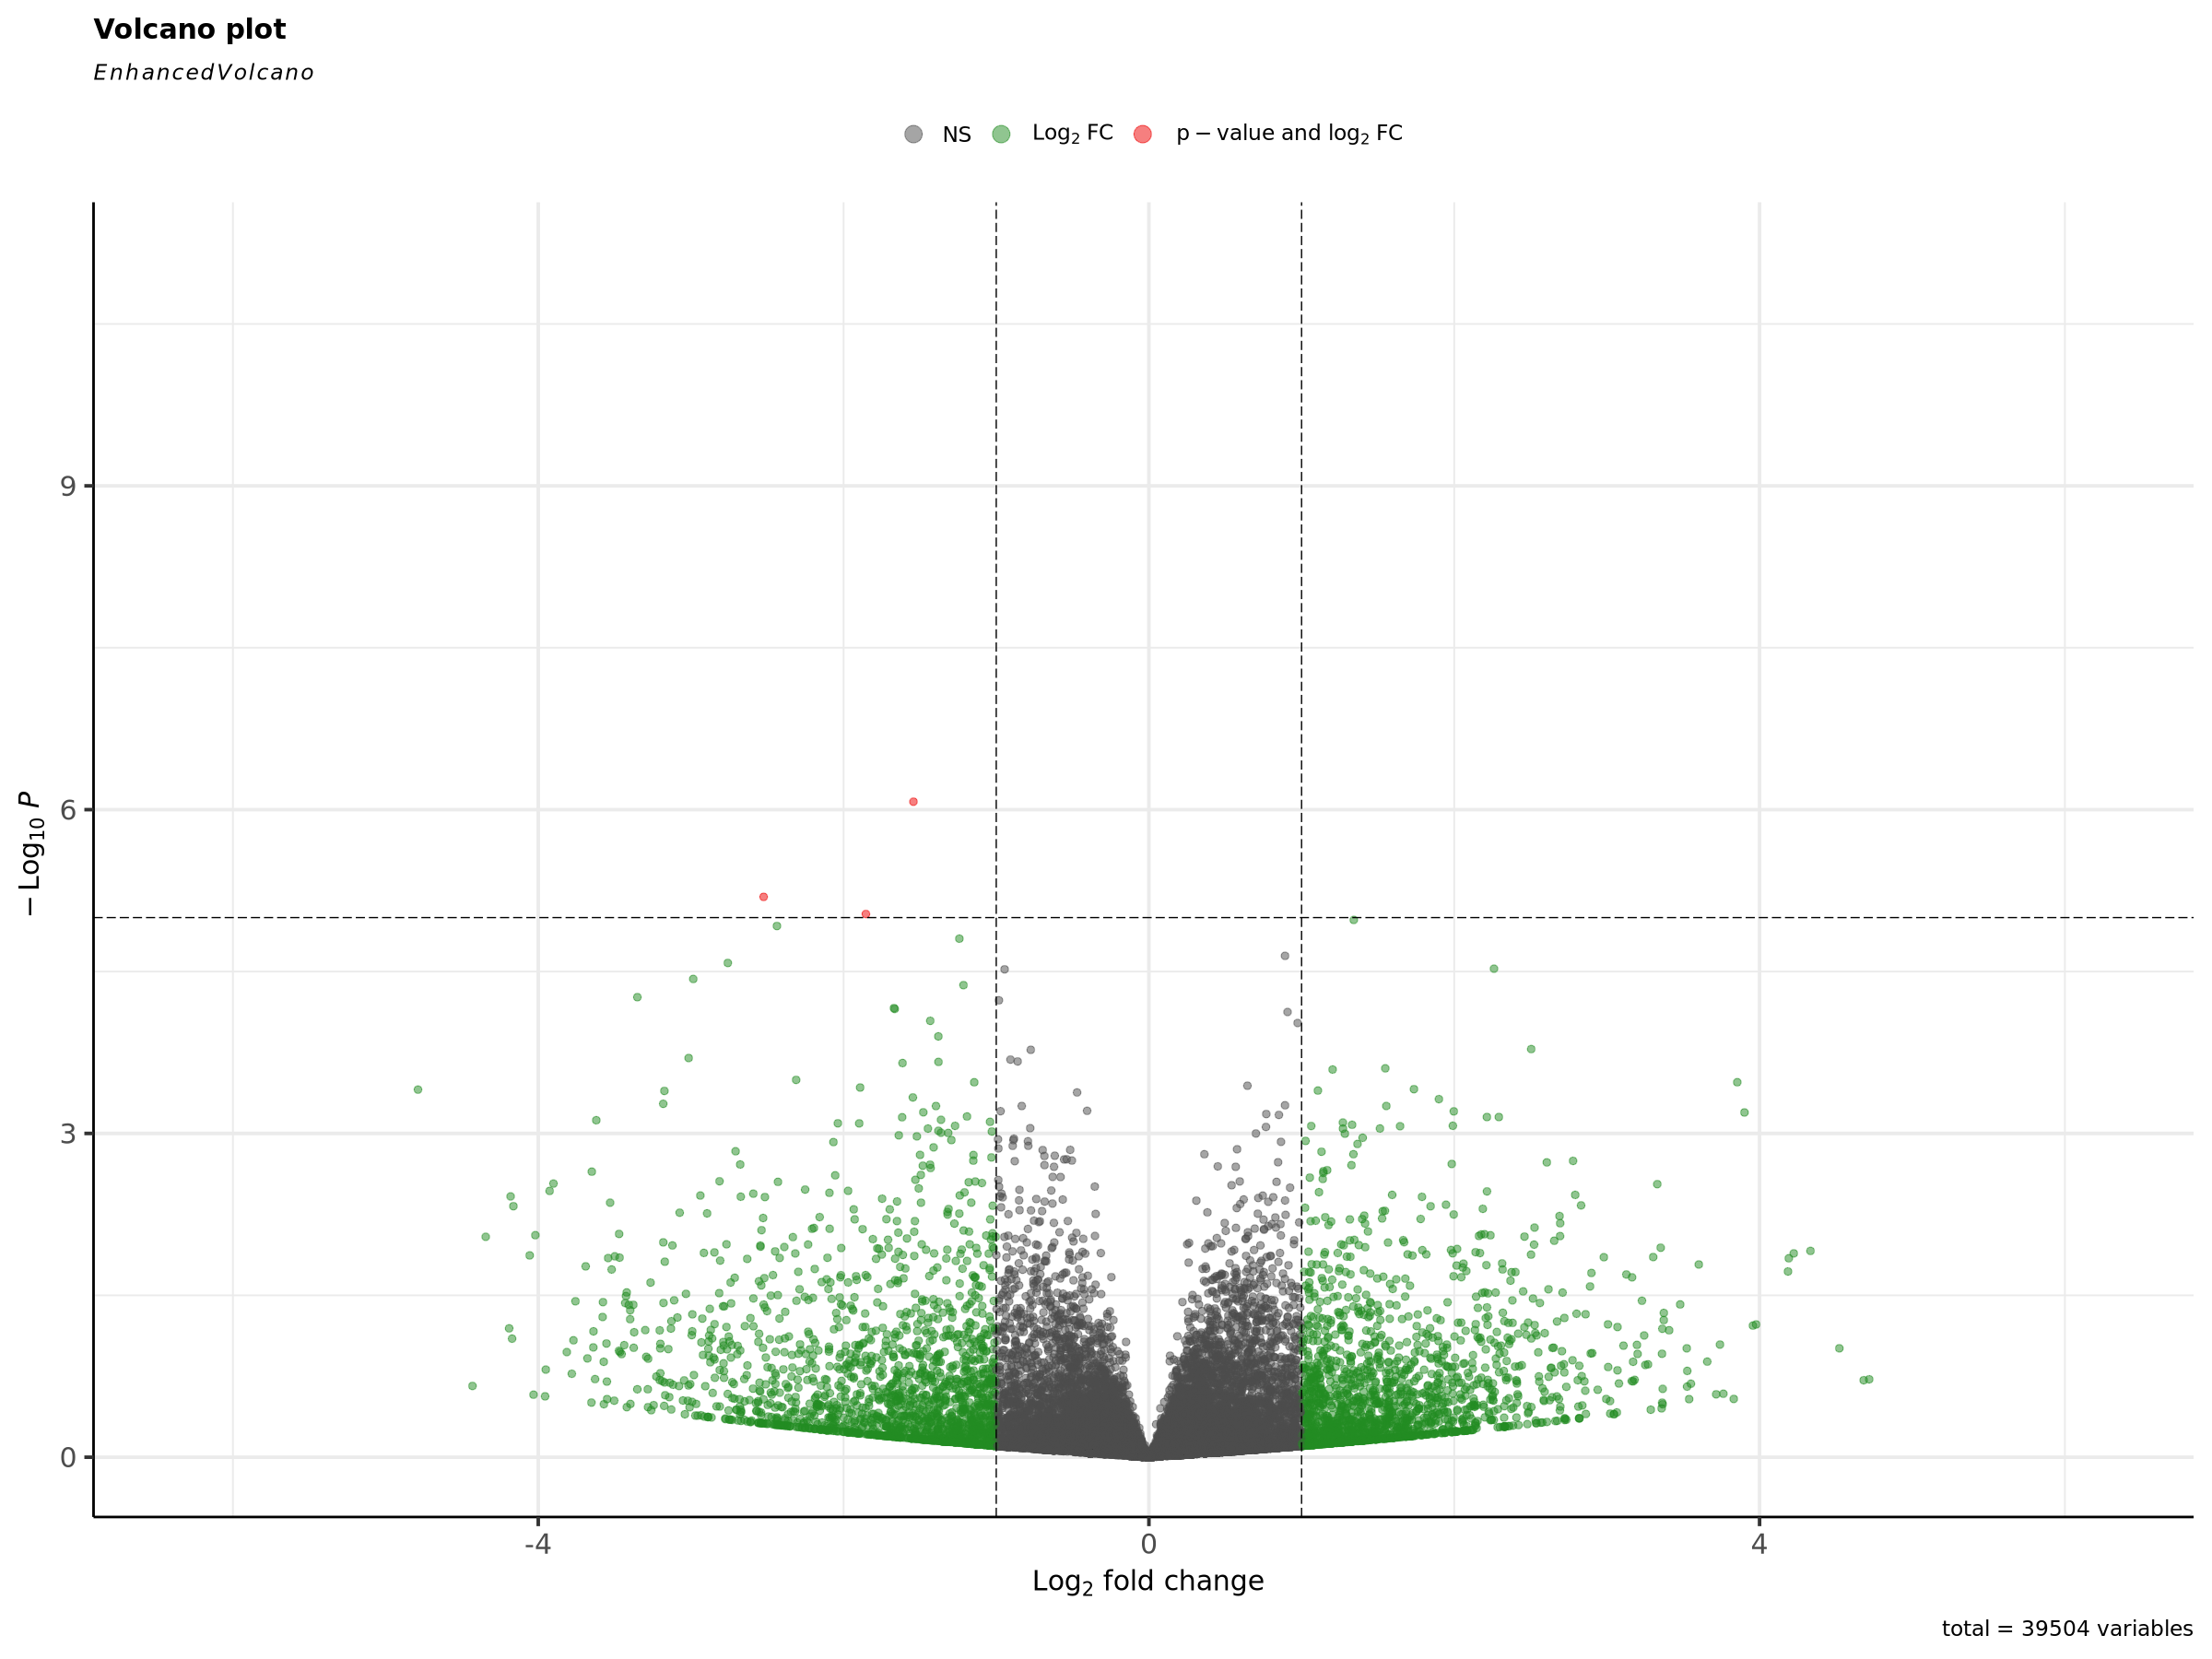

In [110]:
res=results(dds, name="TC2_normoxic.ambient_vs_hypoxic.ambient")
    
sig1_t = res[which(res$padj < 0.05), ]
     
dim(sig1_t)

summary(res)
   
EnhancedVolcano(res,
                lab=NA,
                x = 'log2FoldChange',
                y = 'pvalue')

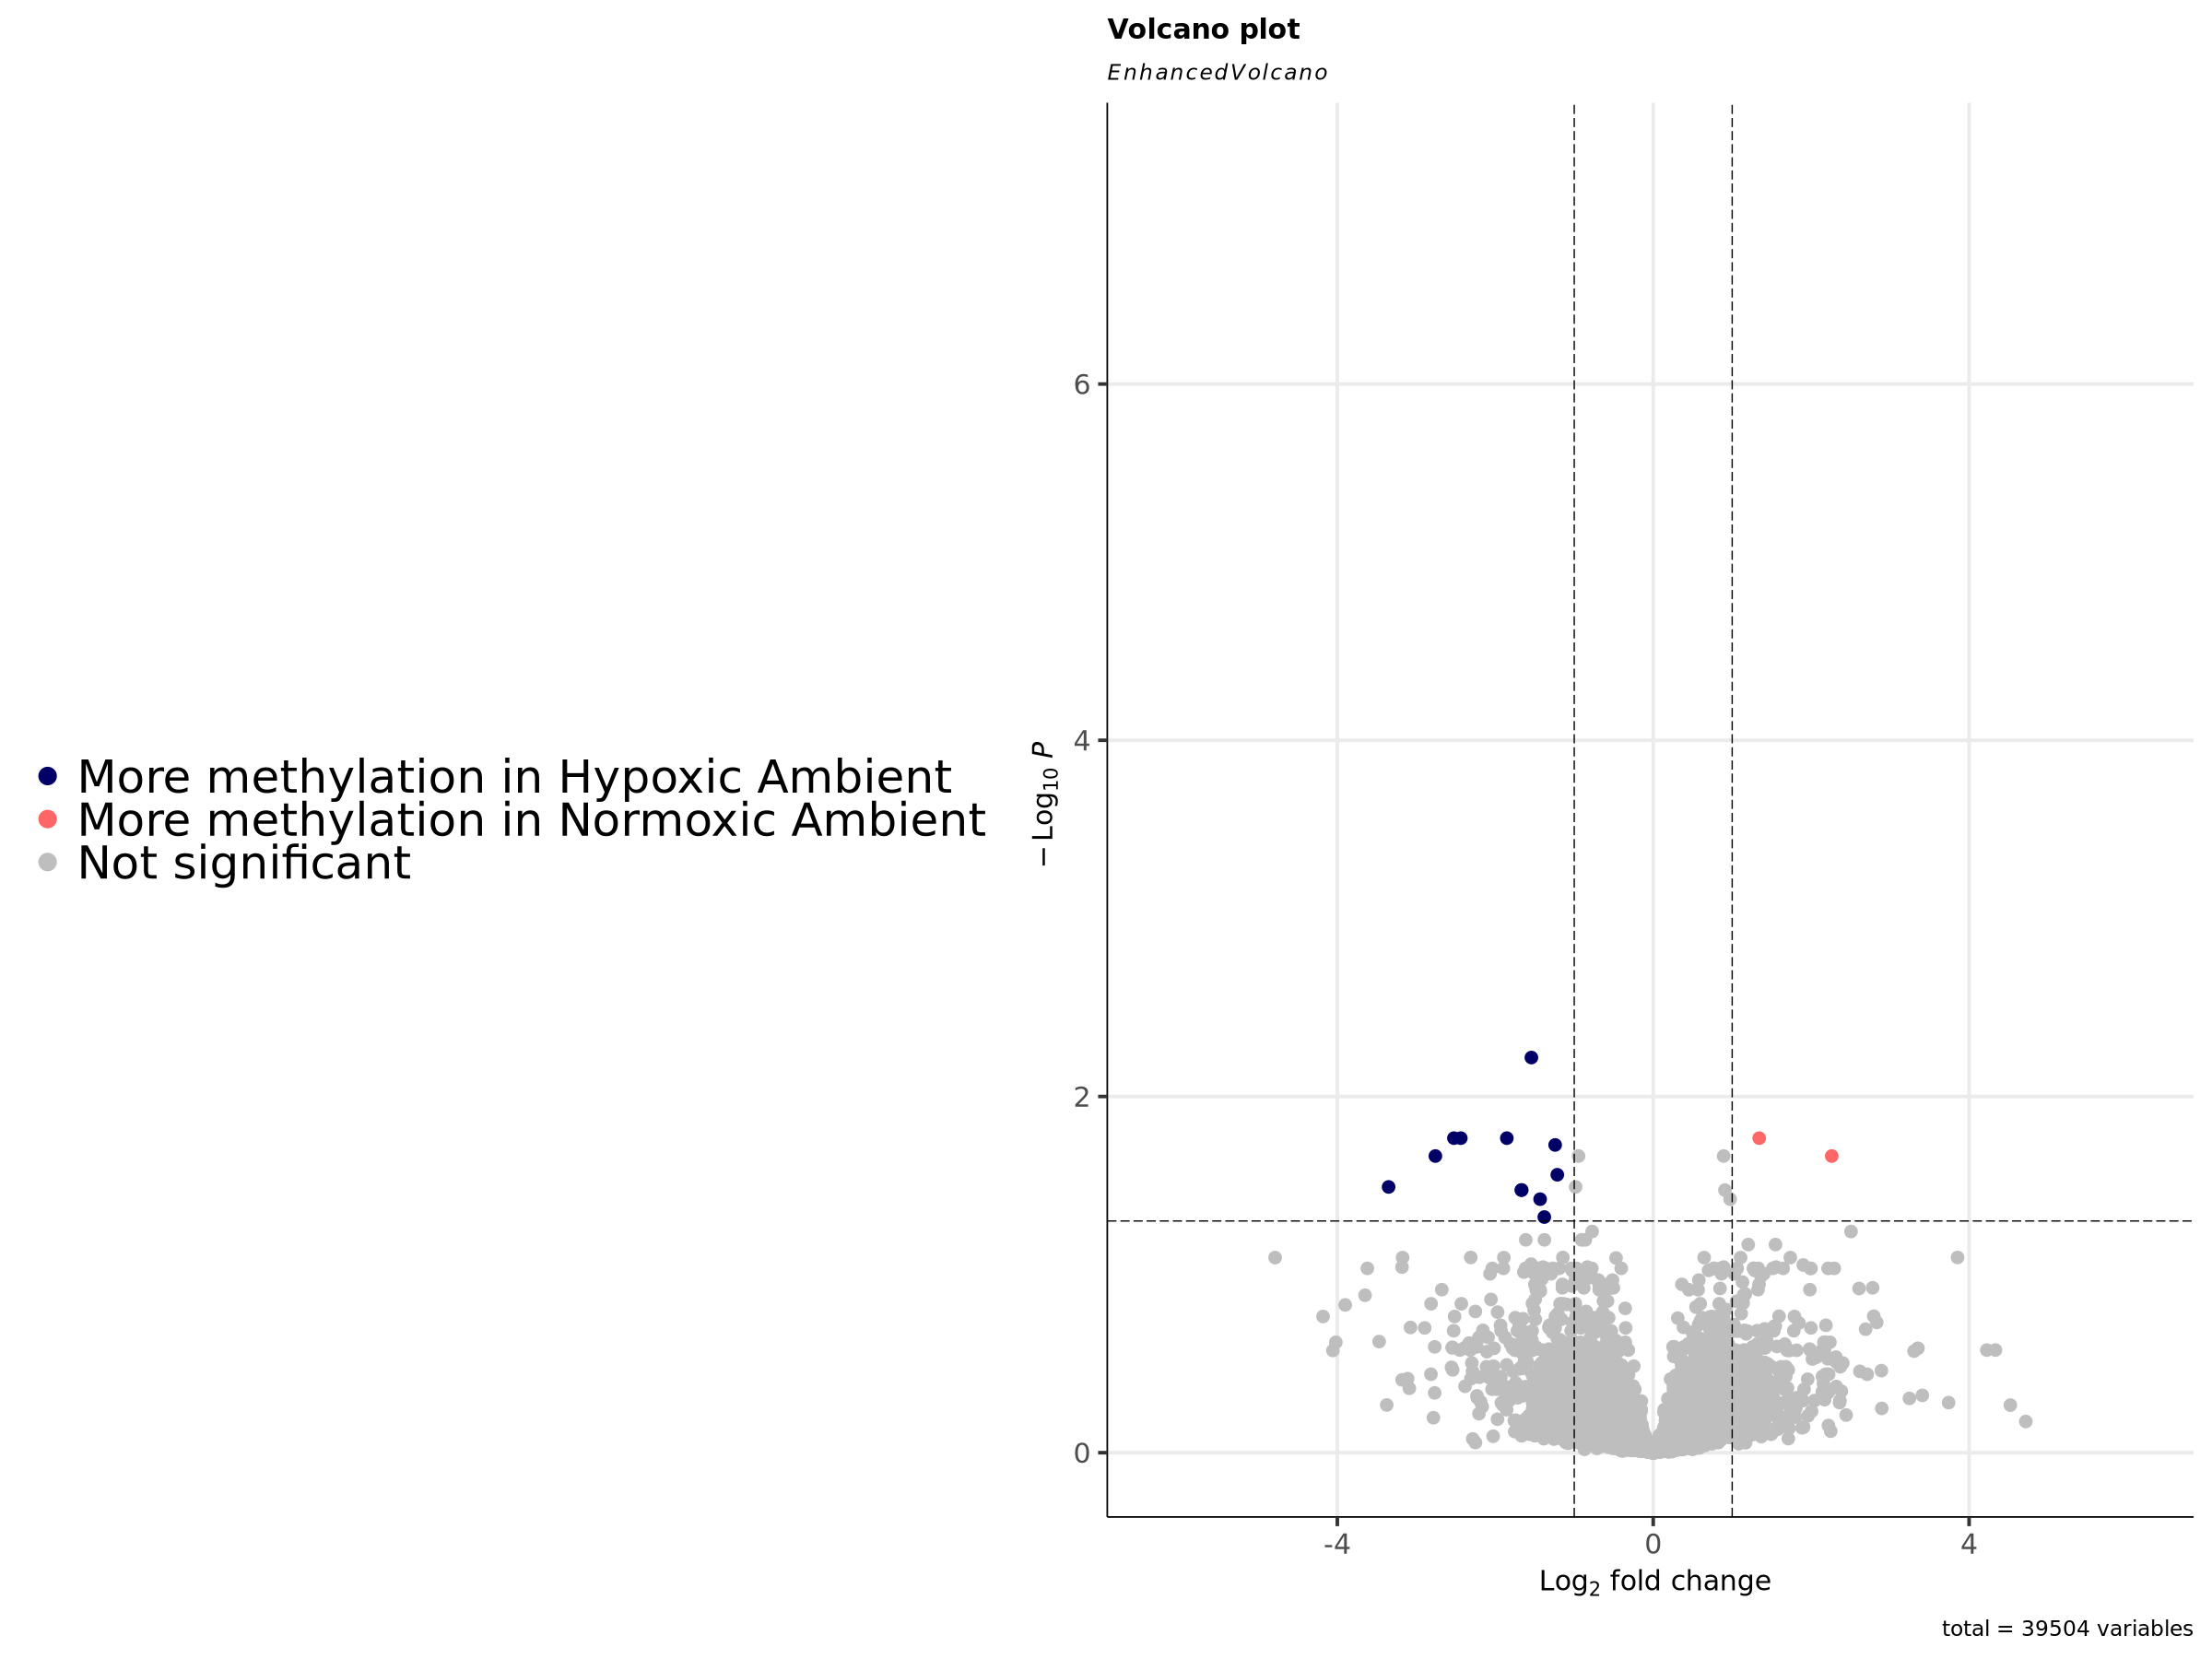

In [112]:
keyvals <- ifelse(
res$log2FoldChange < -1& res$padj <0.05, "#000066",
  ifelse(res$log2FoldChange > 1& res$padj <0.05,"#FF6666" ,
    'grey'))
keyvals[is.na(keyvals)] <- 'grey'
names(keyvals)[keyvals == "#FF6666"] <- 'More methylation in Normoxic Ambient'
names(keyvals)[keyvals == 'grey'] <- 'Not significant'
names(keyvals)[keyvals == "#000066"] <- 'More methylation in Hypoxic Ambient'

hw_plot <- EnhancedVolcano(res,
    lab = NA,
    x = 'log2FoldChange',
    y = 'padj',
    selectLab = rownames(res)[which(names(keyvals) %in% c('More methylation in Normoxic Warm', 'More methylation in Hypoxic Ambient'))],
    xlab = bquote(~Log[2]~ 'fold change'),
    pointSize = 3.5,
    pCutoff = 0.05,
    colCustom = keyvals,
    colAlpha = 1,
    legendPosition = 'left',
    legendLabSize = 30,
    legendIconSize = 5.0,
    drawConnectors = TRUE,
    widthConnectors = 1.0,
    colConnectors = 'black',
    arrowheads = FALSE,
    gridlines.major = TRUE,
    gridlines.minor = FALSE,
    border = 'partial',
    borderWidth = 0.5,
    borderColour = 'black')
hw_plot

In [113]:
# Open a pdf file
setwd("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/figures")
pdf("TC2_ha_v_na.pdf", width=20, height=10) 
# 2. Create a plot
hw_plot
# Close the pdf file
dev.off() 

png 
  2

#### design = ~T2_temp

In [ ]:
dds <- DESeqDataSetFromMatrix(countData = counts_gene,
                              colData = meta,
                              design= ~ T2_temp)
dds=DESeq(dds)

resultsNames(dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates



[1] 150   6


out of 17851 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 210, 1.2%
LFC < 0 (down)     : 17, 0.095%
outliers [1]       : 0, 0%
low counts [2]     : 13617, 76%
(mean count < 6)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



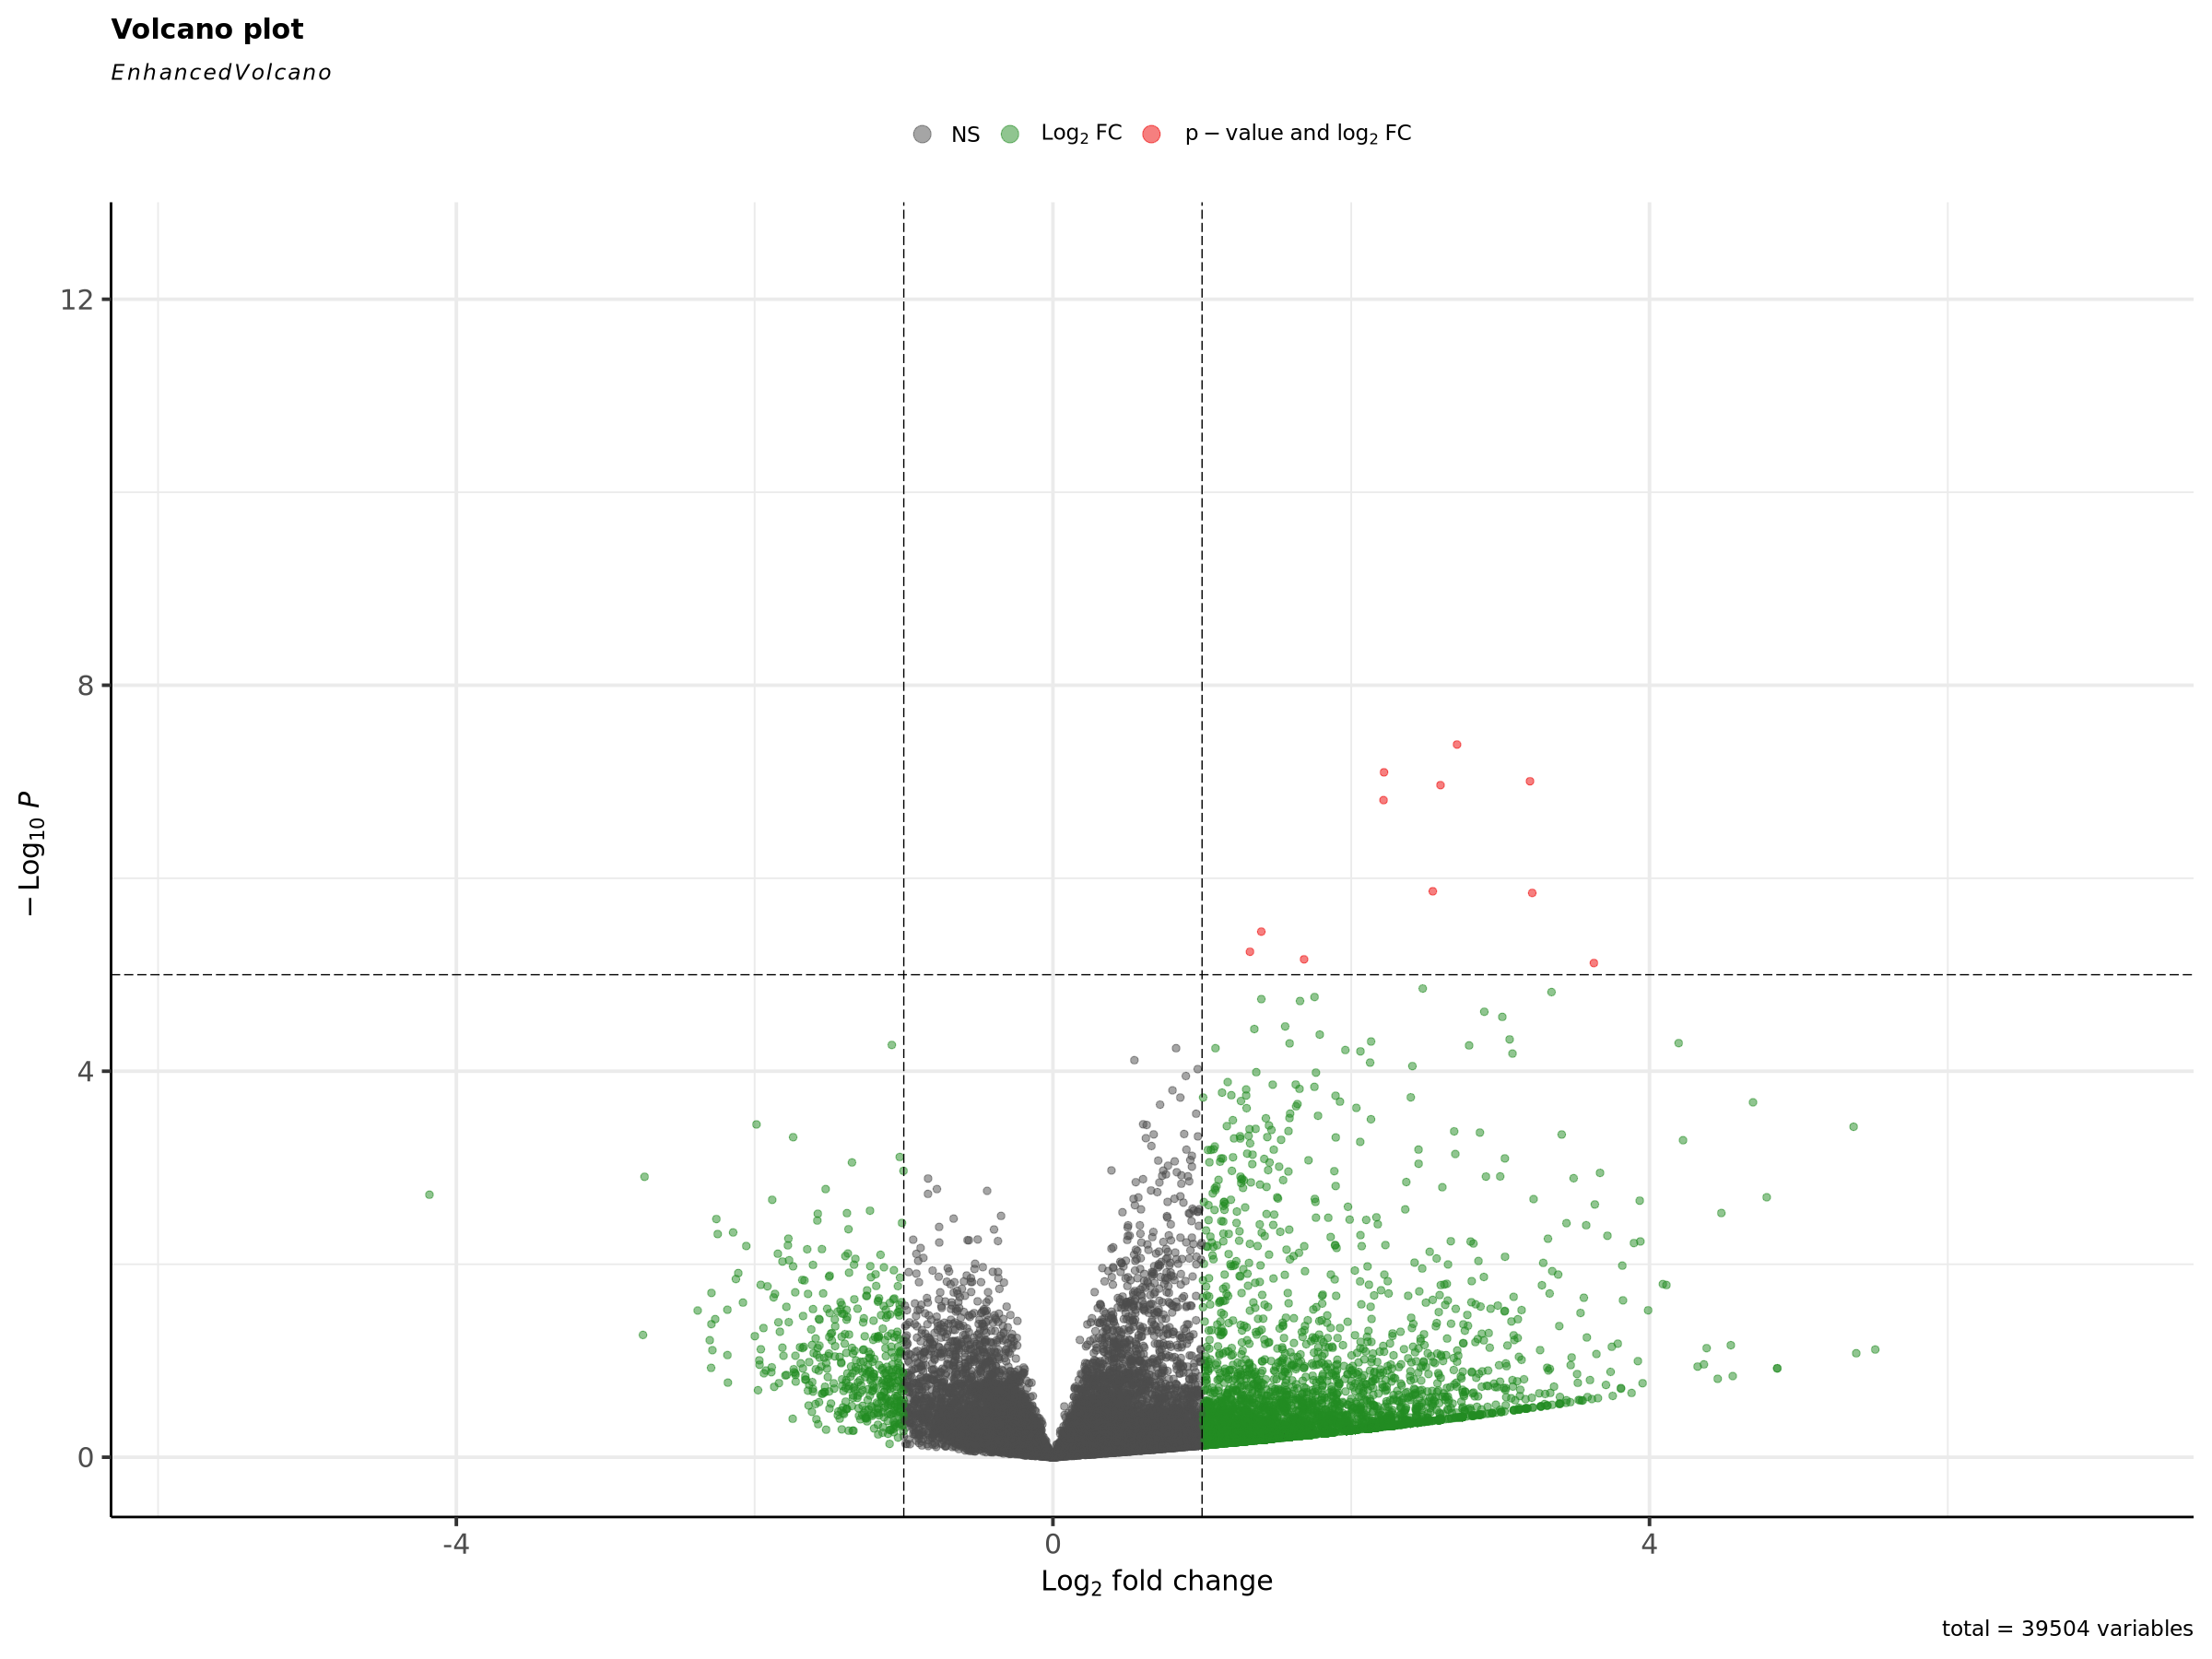

In [60]:
res=results(dds, name="T2_temp_warm_vs_ambient")
    
sig1_t = res[which(res$padj < 0.05), ]
     
dim(sig1_t)
summary(res)

EnhancedVolcano(res,
                lab=NA,
                x = 'log2FoldChange',
                y = 'pvalue')

#### design = ~T1_temp

In [61]:
dds <- DESeqDataSetFromMatrix(countData = counts_gene,
                              colData = meta,
                              design= ~ T1_temp)
dds=DESeq(dds)

resultsNames(dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 737 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "Intercept"               "T1_temp_warm_vs_ambient"

[1] 150   6

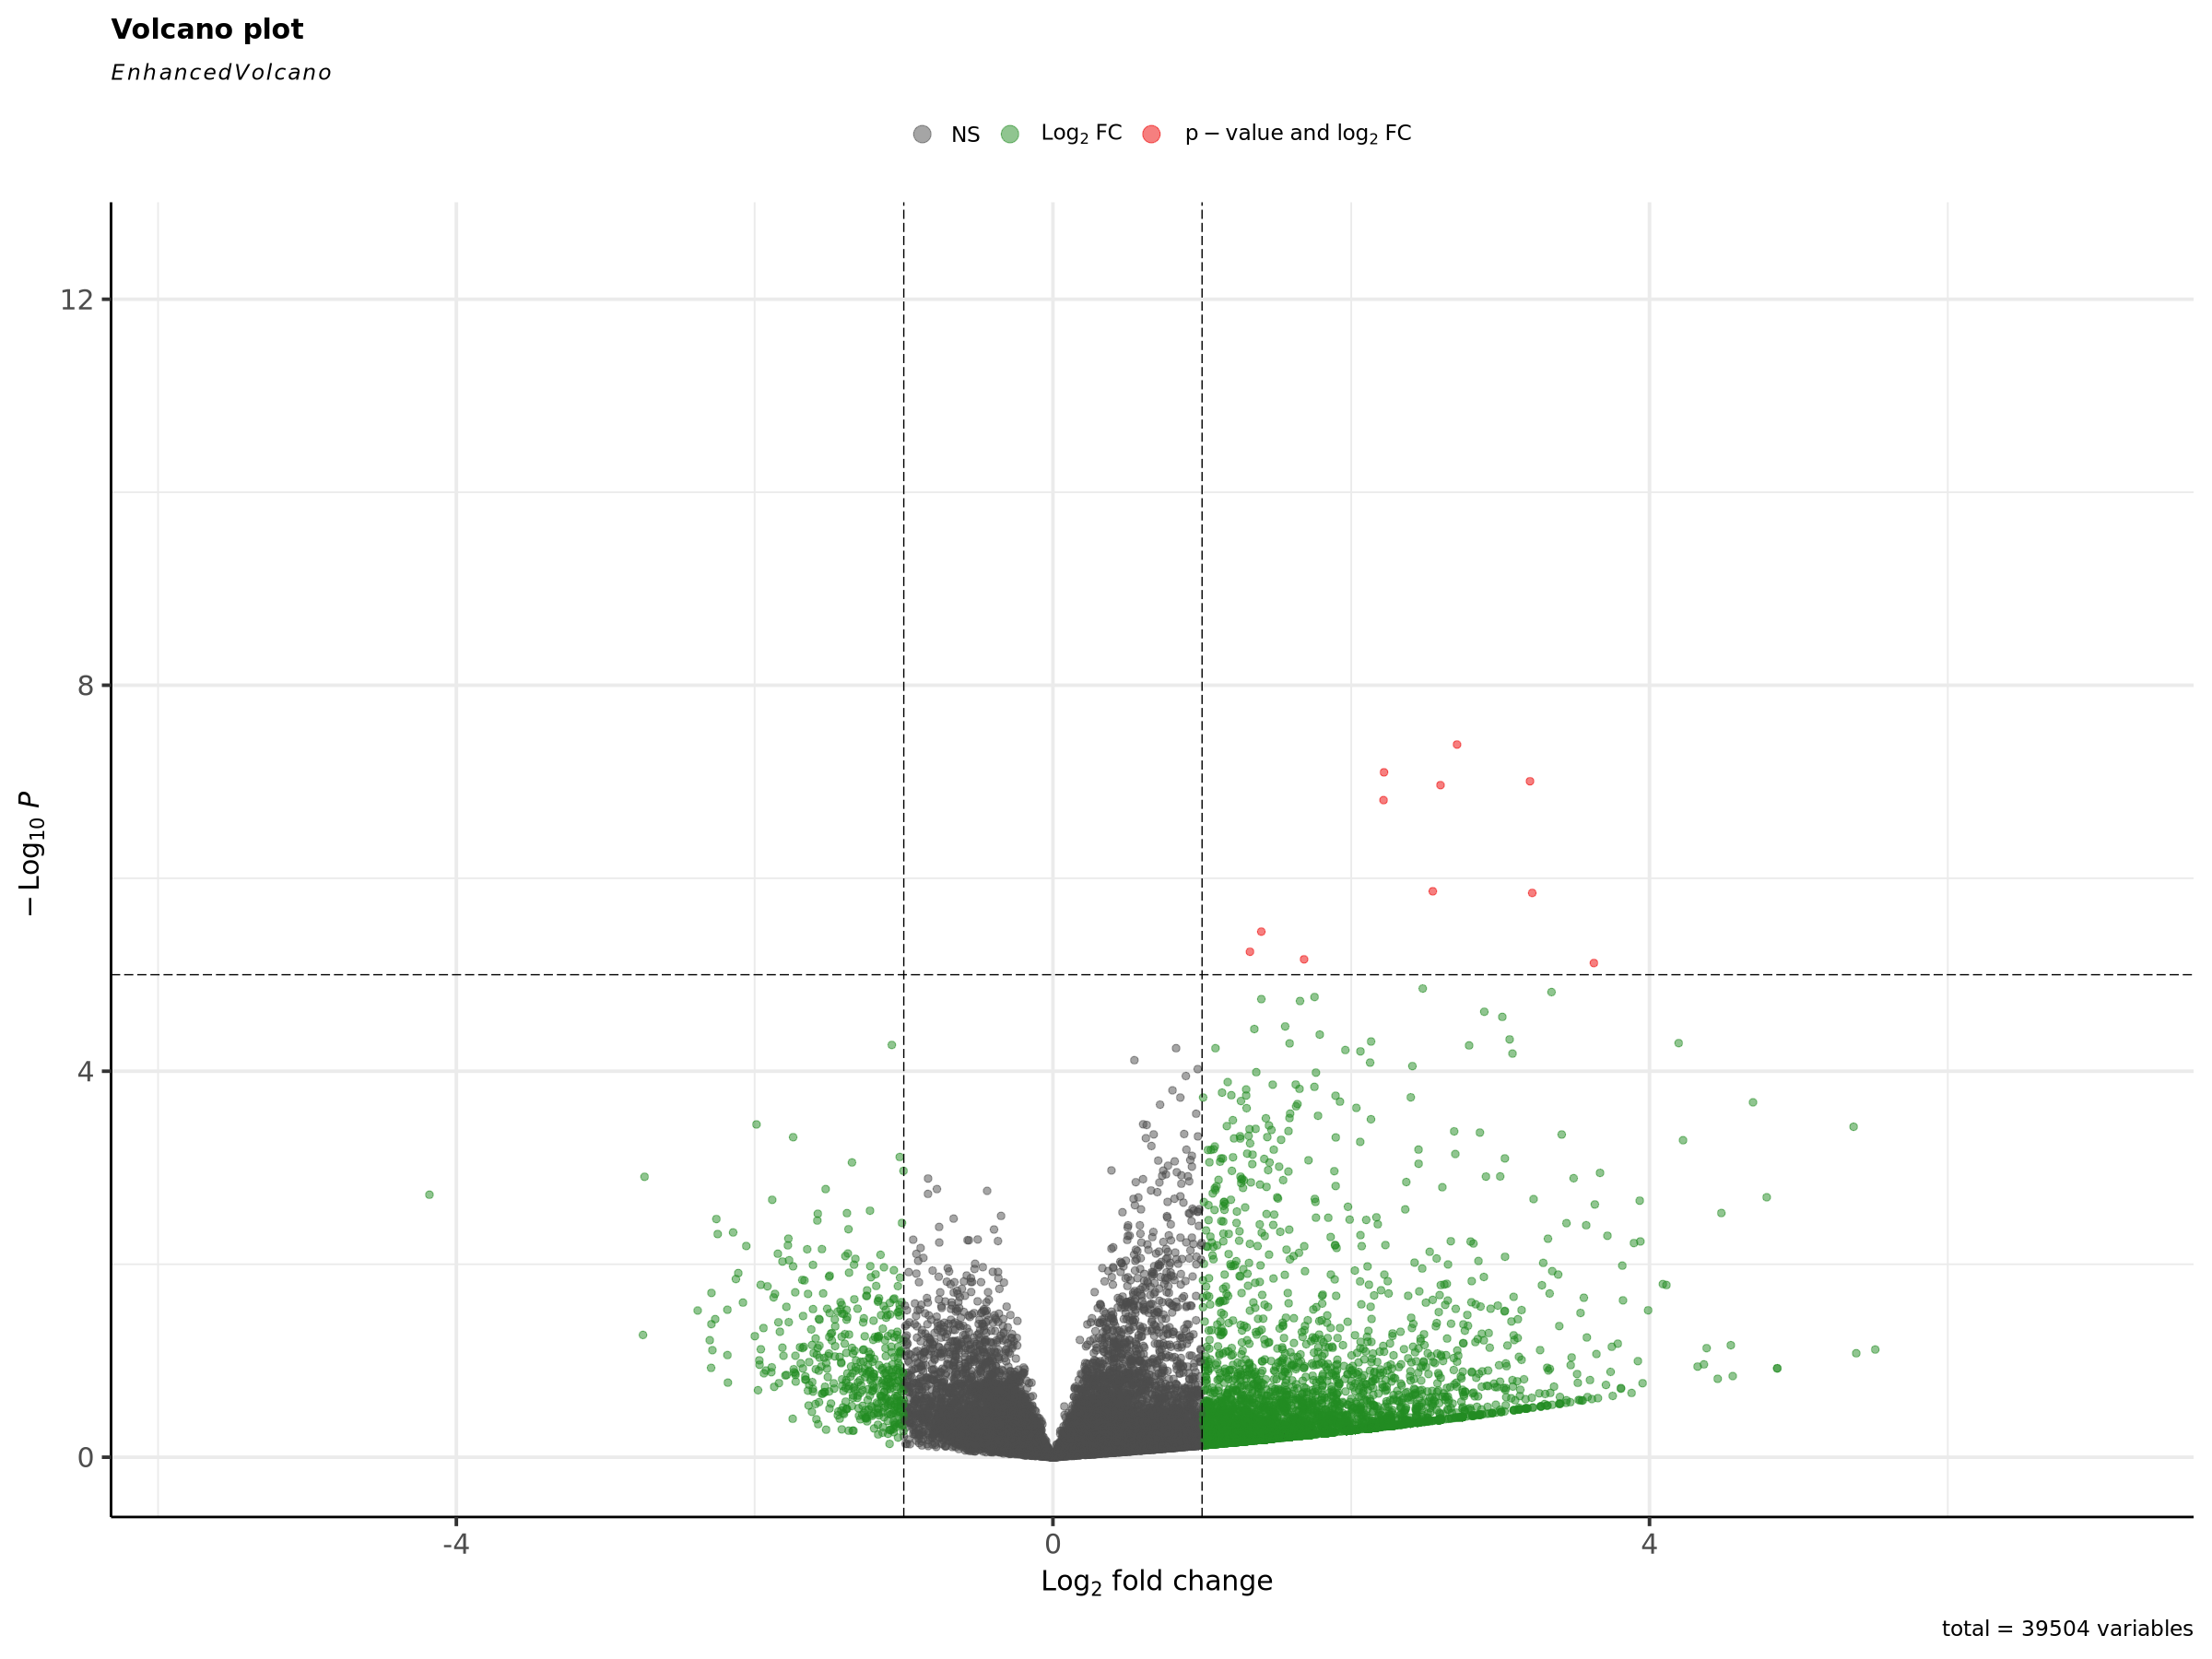

In [62]:
res=results(dds, name="T1_temp_warm_vs_ambient")
    
sig1_t = res[which(res$padj < 0.05), ]
     
dim(sig1_t)
   

EnhancedVolcano(res,
                lab=NA,
                x = 'log2FoldChange',
                y = 'pvalue')

In [63]:
keyvals <- ifelse(
res$log2FoldChange < -1& res$padj <0.05, "#000066",
  ifelse(res$log2FoldChange > 1& res$padj <0.05,"#FF6666" ,
    'grey'))
keyvals[is.na(keyvals)] <- 'grey'
names(keyvals)[keyvals == "#FF6666"] <- 'More methylation in Warm'
names(keyvals)[keyvals == 'grey'] <- 'Not significant'
names(keyvals)[keyvals == "#000066"] <- 'More methylation in Ambient'

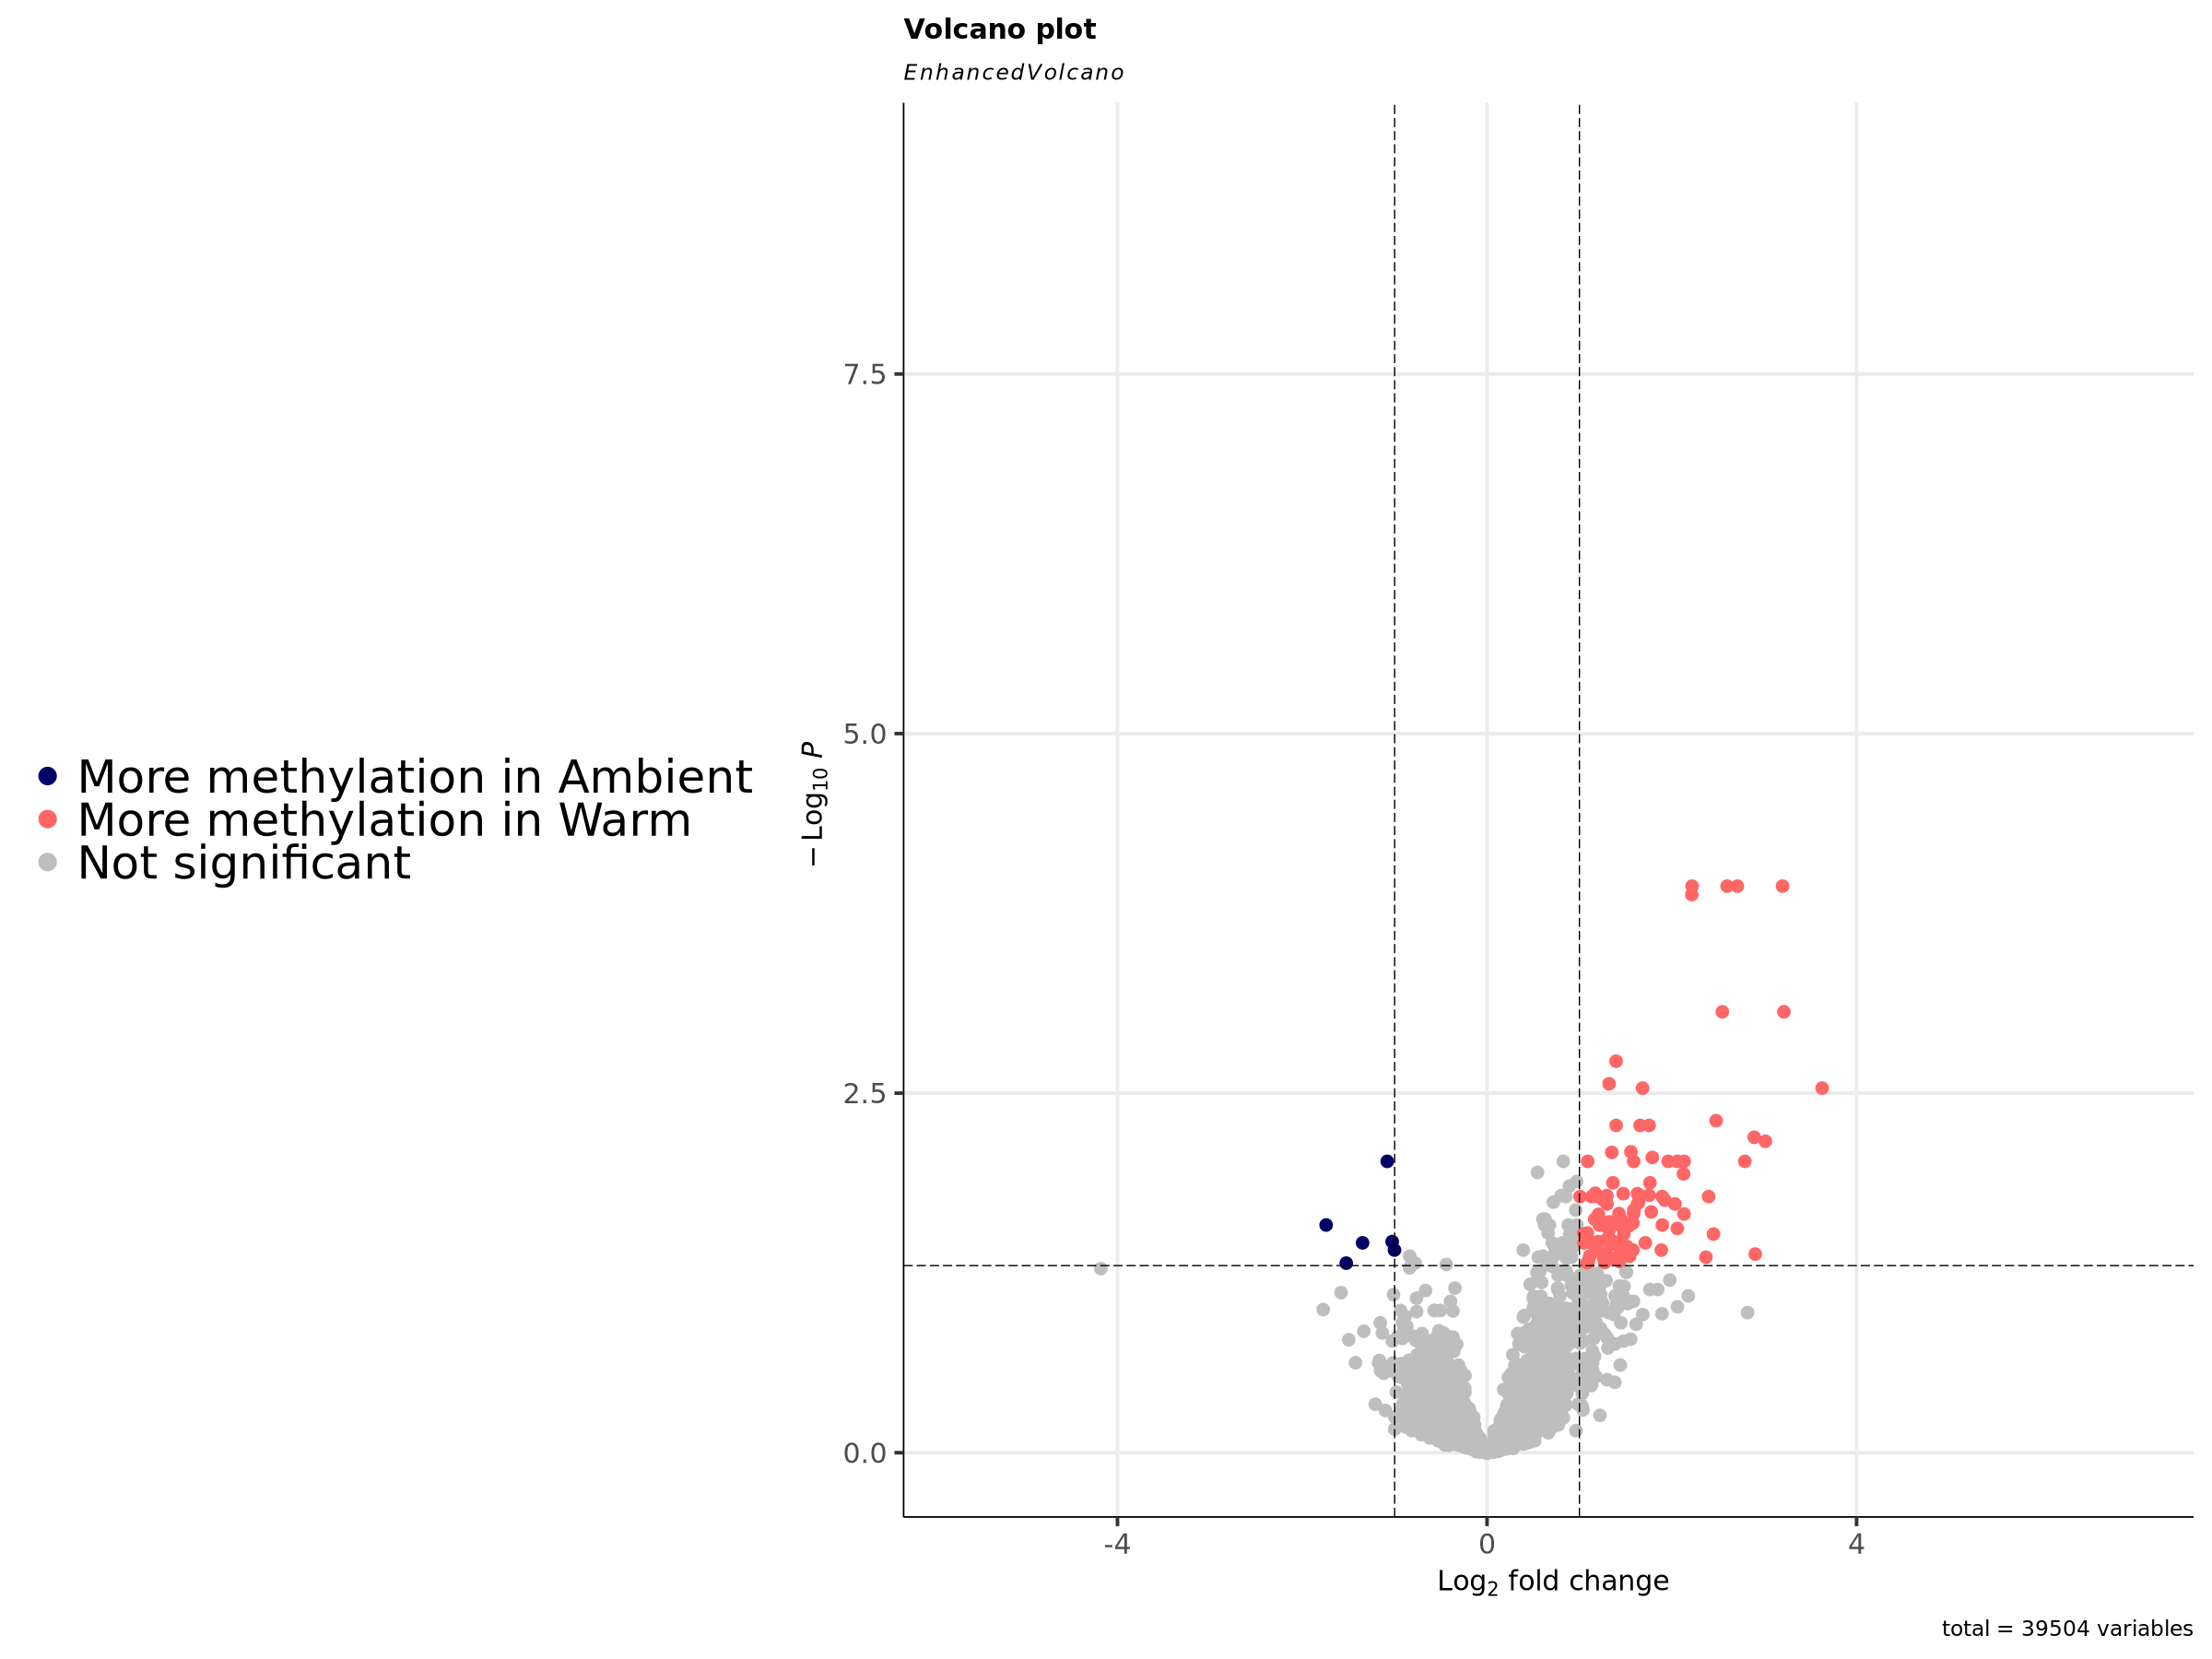

In [64]:
T1temp_plot <- EnhancedVolcano(res,
    lab = NA,
    x = 'log2FoldChange',
    y = 'padj',
    selectLab = rownames(res)[which(names(keyvals) %in% c('More methylation in Normoxic Warm', 'More methylation in Hypoxic Ambient'))],
    xlab = bquote(~Log[2]~ 'fold change'),
    pointSize = 3.5,
    pCutoff = 0.05,
    colCustom = keyvals,
    colAlpha = 1,
    legendPosition = 'left',
    legendLabSize = 30,
    legendIconSize = 5.0,
    drawConnectors = TRUE,
    widthConnectors = 1.0,
    colConnectors = 'black',
    arrowheads = FALSE,
    gridlines.major = TRUE,
    gridlines.minor = FALSE,
    border = 'partial',
    borderWidth = 0.5,
    borderColour = 'black')

T1temp_plot

saving as pdf

In [65]:
# Open a pdf file
setwd("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/figures")
pdf("T1_temp.pdf", width=20, height=10) 
# 2. Create a plot
T1temp_plot
# Close the pdf filegb
dev.off() 

png 
  2

saving significant genes into a csv file

In [66]:
summary(res)
sig1_t=as.data.frame(sig1_t)
head(sig1_t)
# adding meta data 
match_rows = rownames(gtf_genes1) %in% rownames(sig1_t)
gtf_match = gtf_genes1[match_rows,]

sig_1t_stress = cbind(sig1_t, gtf_match)
head(sig_1t_stress)

write.csv(sig_1t_stress, "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/significant_genes/sig_T1_temp.csv")


out of 17851 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 210, 1.2%
LFC < 0 (down)     : 17, 0.095%
outliers [1]       : 0, 0%
low counts [2]     : 13617, 76%
(mean count < 6)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



baseMean  log2FoldChange lfcSE     stat     pvalue      
LOC111099216  29.51165 1.1395329      0.3399547 3.352014 0.0008022596
LOC111099722 593.62230 0.6235588      0.1789777 3.484003 0.0004939732
LOC111100043  23.42197 1.3027712      0.3849617 3.384158 0.0007139689
LOC111100327  33.11507 1.0595204      0.3108441 3.408526 0.0006531474
LOC111100602  45.73272 1.1662343      0.3275383 3.560604 0.0003700022
LOC111100869  12.68368 1.4280412      0.3957002 3.608897 0.0003075016
             padj      
LOC111099216 0.03439181
LOC111099722 0.02611190
LOC111100043 0.03258155
LOC111100327 0.03018553
LOC111100602 0.02379226
LOC111100869 0.02175061

baseMean  log2FoldChange lfcSE     stat     pvalue      
LOC111099216  29.51165 1.1395329      0.3399547 3.352014 0.0008022596
LOC111099722 593.62230 0.6235588      0.1789777 3.484003 0.0004939732
LOC111100043  23.42197 1.3027712      0.3849617 3.384158 0.0007139689
LOC111100327  33.11507 1.0595204      0.3108441 3.408526 0.0006531474
LOC111100602  45.73272 1.1662343      0.3275383 3.560604 0.0003700022
LOC111100869  12.68368 1.4280412      0.3957002 3.608897 0.0003075016
             padj       seqname     source feature start    end      score
LOC111099216 0.03439181 NC_035780.1 Gnomon gene      315522   340261 .    
LOC111099722 0.02611190 NC_035780.1 Gnomon gene      394983   409280 .    
LOC111100043 0.03258155 NC_035780.1 Gnomon gene    15350536 15428837 .    
LOC111100327 0.03018553 NC_035780.1 Gnomon gene    20571017 20597711 .    
LOC111100602 0.02379226 NC_035780.1 Gnomon gene    24102769 24129452 .    
LOC111100869 0.02175061 NC_035780.1 Gnomon gene    25904526 25923260 .    
             strand frame
LOC111099216 +      .    
LOC111099722 -      .    
LOC111100043 -      .    
LOC111100327 +      .    
LOC111100602 -      .    
LOC111100869 +      .    
             attributes                                                                                                            
LOC111099216 gene_id "LOC111133260"; db_xref "GeneID:111133260"; gbkey "Gene"; gene "LOC111133260"; gene_biotype "protein_coding"; 
LOC111099722 gene_id "LOC111117672"; db_xref "GeneID:111117672"; gbkey "Gene"; gene "LOC111117672"; gene_biotype "protein_coding"; 
LOC111100043 gene_id "LOC111099722"; db_xref "GeneID:111099722"; gbkey "Gene"; gene "LOC111099722"; gene_biotype "protein_coding"; 
LOC111100327 gene_id "LOC111123818"; db_xref "GeneID:111123818"; gbkey "Gene"; gene "LOC111123818"; gene_biotype "protein_coding"; 
LOC111100602 gene_id "LOC111130352"; db_xref "GeneID:111130352"; gbkey "Gene"; gene "LOC111130352"; gene_biotype "protein_coding"; 
LOC111100869 gene_id "LOC111115675"; db_xref "GeneID:111115675"; gbkey "Gene"; gene "LOC111115675"; gene_biotype "protein_coding";

#### design = ~T1_oxygen

In [67]:
dds <- DESeqDataSetFromMatrix(countData = counts_gene,
                              colData = meta,
                              design= ~ T1_oxygen)
dds=DESeq(dds)

resultsNames(dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 773 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "Intercept"                     "T1_oxygen_normoxic_vs_hypoxic"

[1] 0 6

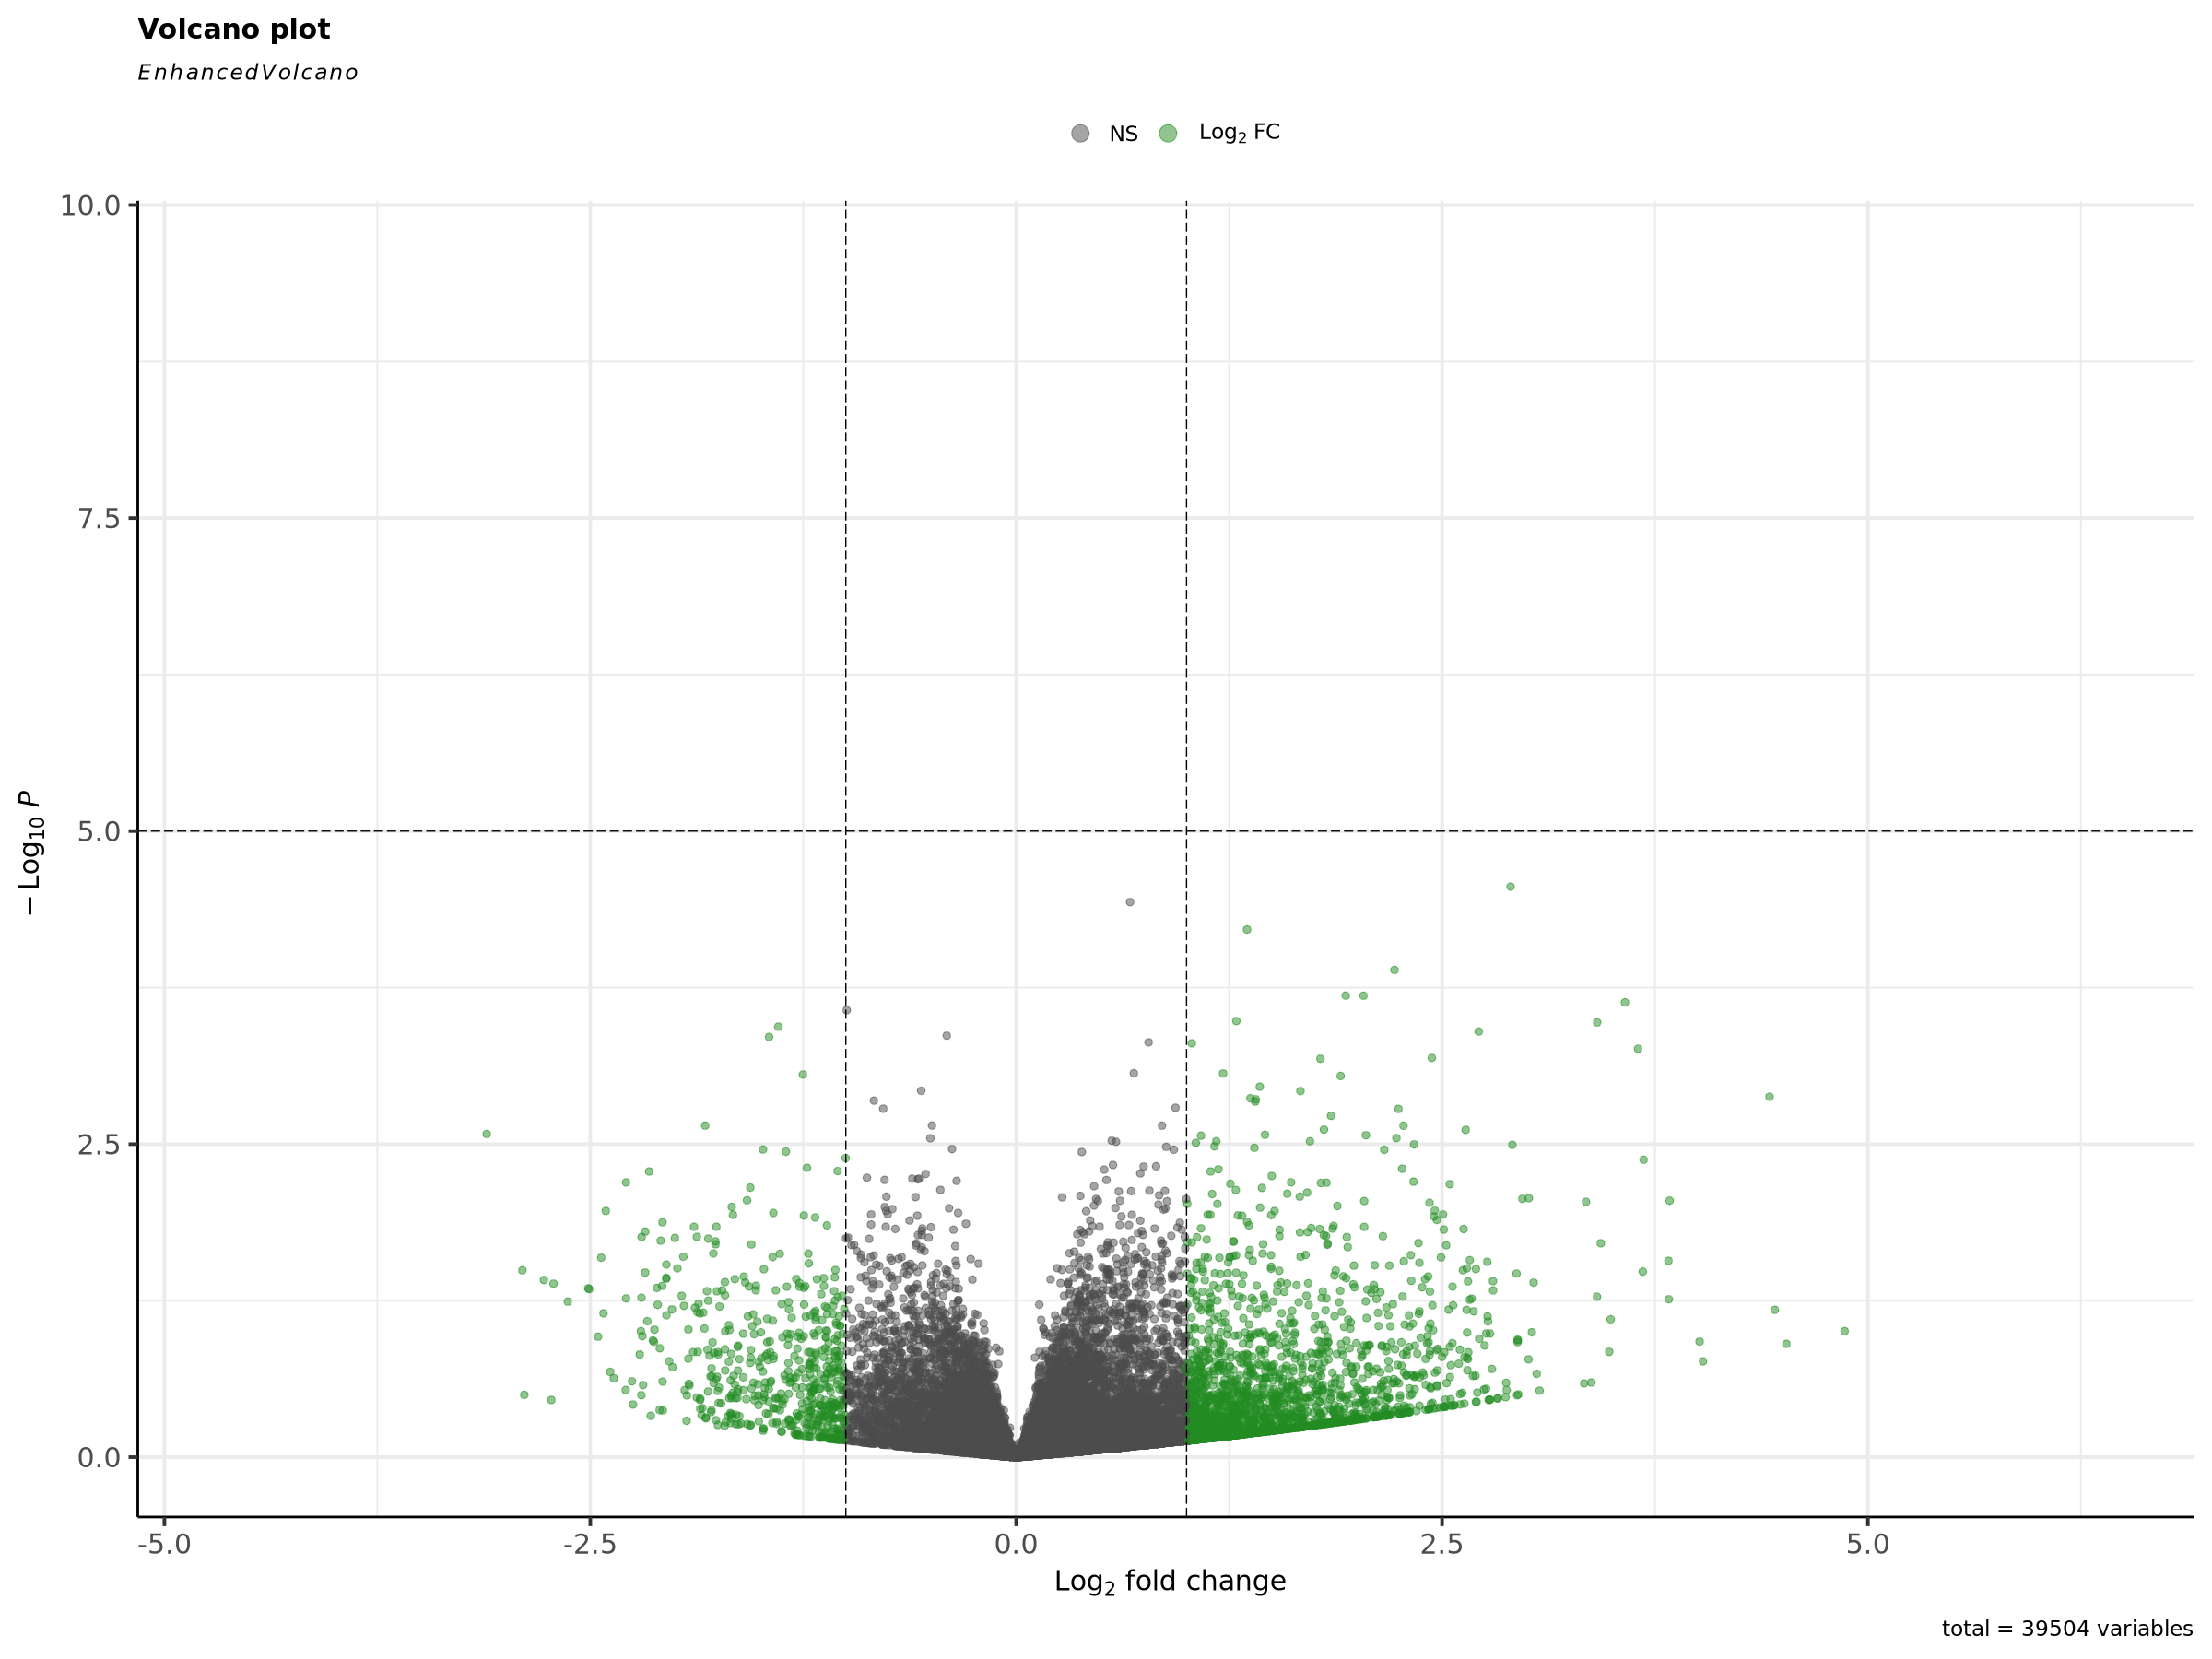

In [68]:
res=results(dds, name="T1_oxygen_normoxic_vs_hypoxic")
    
sig1_t = res[which(res$padj < 0.05), ]
     
dim(sig1_t)
   

EnhancedVolcano(res,
                lab=NA,
                x = 'log2FoldChange',
                y = 'pvalue')

#### design = ~T2_oxygen

In [69]:
dds <- DESeqDataSetFromMatrix(countData = counts_gene,
                              colData = meta,
                              design= ~ T2_oxygen)
dds=DESeq(dds)

resultsNames(dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 787 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "Intercept"                     "T2_oxygen_normoxic_vs_hypoxic"

[1] 59  6

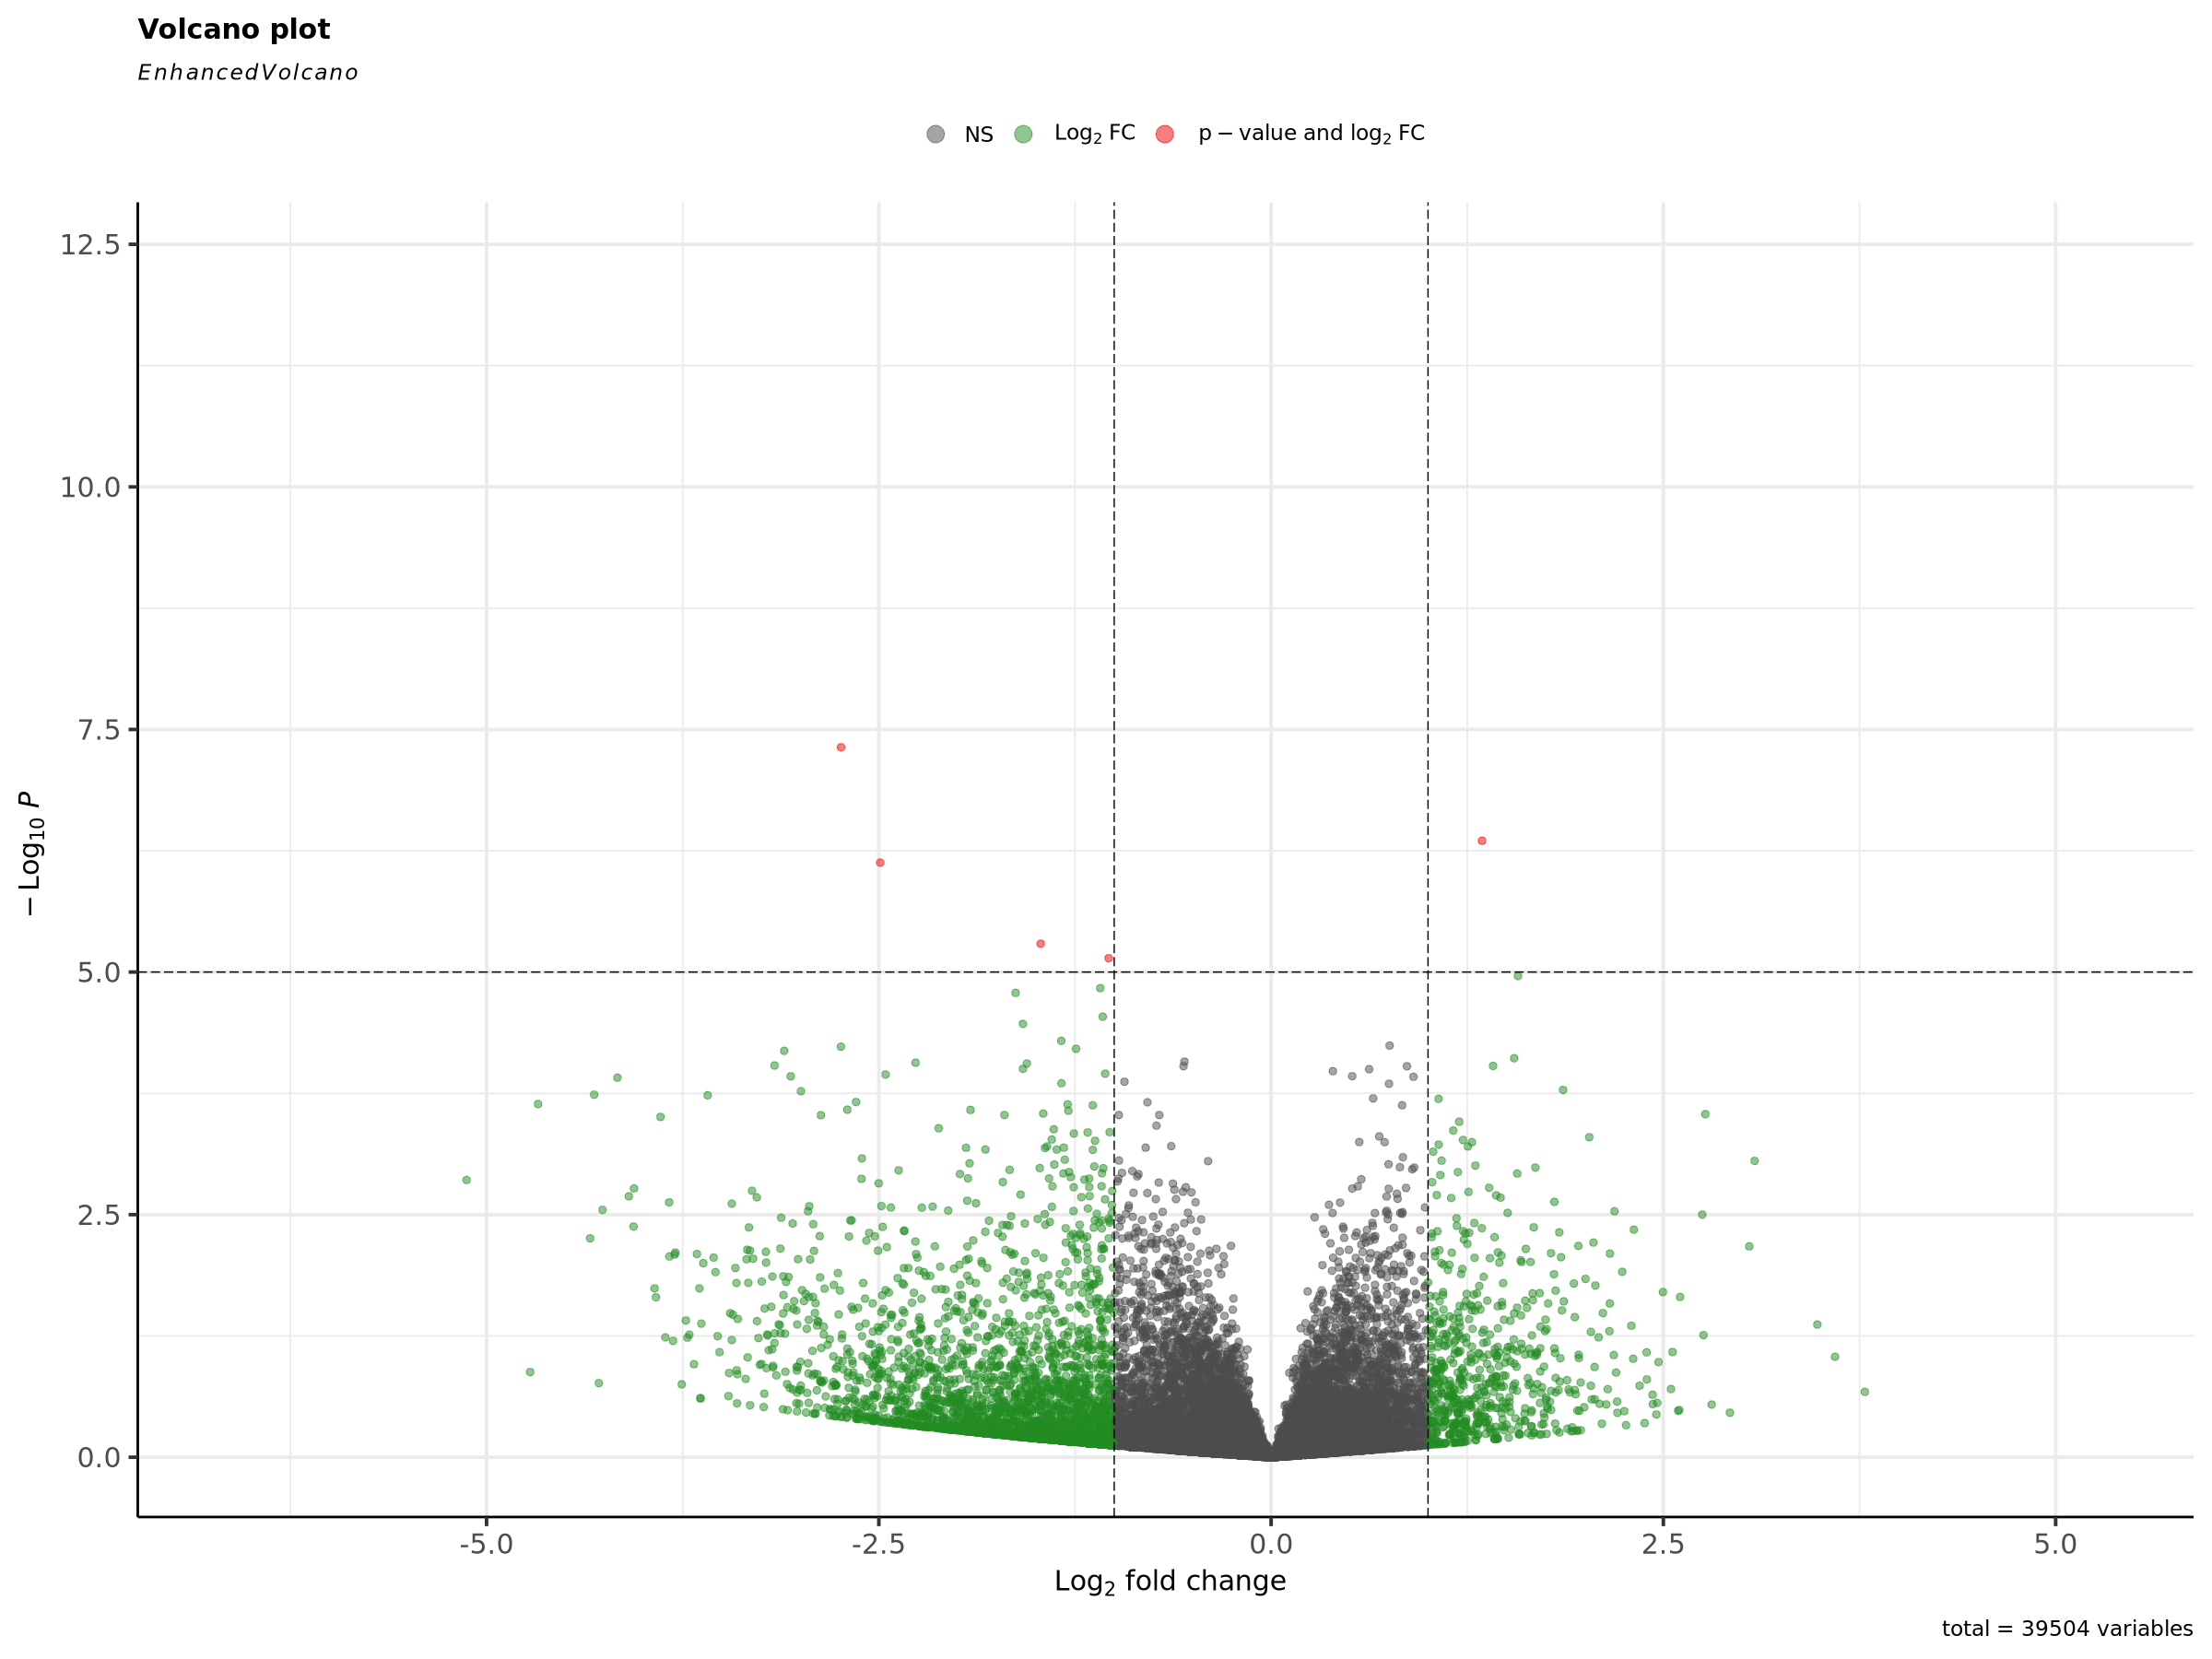

In [70]:
res=results(dds, name="T2_oxygen_normoxic_vs_hypoxic")
    
sig1_t = res[which(res$padj < 0.05), ]
     
dim(sig1_t)
   

EnhancedVolcano(res,
                lab=NA,
                x = 'log2FoldChange',
                y = 'pvalue')

doesn't seem that oxygen has a big impact/influence on methylation 

#### looking at carryover effects

In [71]:
head(meta)

sample_ID            unique_ID   T1_code T2_code ID_code T1_oxygen
BBB-WBO-B21 2018--BBB-WBO-B21-CV BBB-WBO-B21 BBB     WBO     B21     hypoxic  
BBB-WBV-B70 2018--BBB-WBV-B70-CV BBB-WBV-B70 BBB     WBV     B70     hypoxic  
BBO-BBO-B16 2018--BBO-BBO-B16-CV BBO-BBO-B16 BBO     BBO     B16     hypoxic  
BBO-BBY-B27 2018--BBO-BBY-B27-CV BBO-BBY-B27 BBO     BBY     B27     hypoxic  
BBO-WBO-B16 2018--BBO-WBO-B16-CV BBO-WBO-B16 BBO     WBO     B16     hypoxic  
BBO-WBV-B64 2018--BBO-WBV-B64-CV BBO-WBV-B64 BBO     WBV     B64     hypoxic  
            T1_temp Tank1 T2_oxygen T2_temp Tank2 TC1            
BBB-WBO-B21 ambient B     normoxic  ambient O     hypoxic ambient
BBB-WBV-B70 ambient B     normoxic  ambient V     hypoxic ambient
BBO-BBO-B16 ambient O     hypoxic   ambient O     hypoxic ambient
BBO-BBY-B27 ambient O     hypoxic   ambient Y     hypoxic ambient
BBO-WBO-B16 ambient O     normoxic  ambient O     hypoxic ambient
BBO-WBV-B64 ambient O     normoxic  ambient V     hypoxic ambient
            TC2             
BBB-WBO-B21 normoxic ambient
BBB-WBV-B70 normoxic ambient
BBO-BBO-B16 hypoxic ambient 
BBO-BBY-B27 hypoxic ambient 
BBO-WBO-B16 normoxic ambient
BBO-WBV-B64 normoxic ambient

In [72]:
meta$all_TC = paste(meta$TC1, meta$TC2)

In [73]:
unique(meta$all_TC)

[1] "hypoxic ambient normoxic ambient"  "hypoxic ambient hypoxic ambient"  
[3] "hypoxic warm hypoxic warm"         "normoxic ambient normoxic ambient"
[5] "normoxic ambient hypoxic ambient"  "normoxic warm hypoxic warm"

In [74]:
dds <- DESeqDataSetFromMatrix(countData = counts_gene,
                              colData = meta,
                              design= ~ all_TC)
dds=DESeq(dds)

resultsNames(dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
 

[1] "Intercept"                                                                  
[2] "all_TC_hypoxic.ambient.normoxic.ambient_vs_hypoxic.ambient.hypoxic.ambient" 
[3] "all_TC_hypoxic.warm.hypoxic.warm_vs_hypoxic.ambient.hypoxic.ambient"        
[4] "all_TC_normoxic.ambient.hypoxic.ambient_vs_hypoxic.ambient.hypoxic.ambient" 
[5] "all_TC_normoxic.ambient.normoxic.ambient_vs_hypoxic.ambient.hypoxic.ambient"
[6] "all_TC_normoxic.warm.hypoxic.warm_vs_hypoxic.ambient.hypoxic.ambient"

[1] 39  6


out of 17861 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 8, 0.045%
LFC < 0 (down)     : 78, 0.44%
outliers [1]       : 230, 1.3%
low counts [2]     : 9663, 54%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



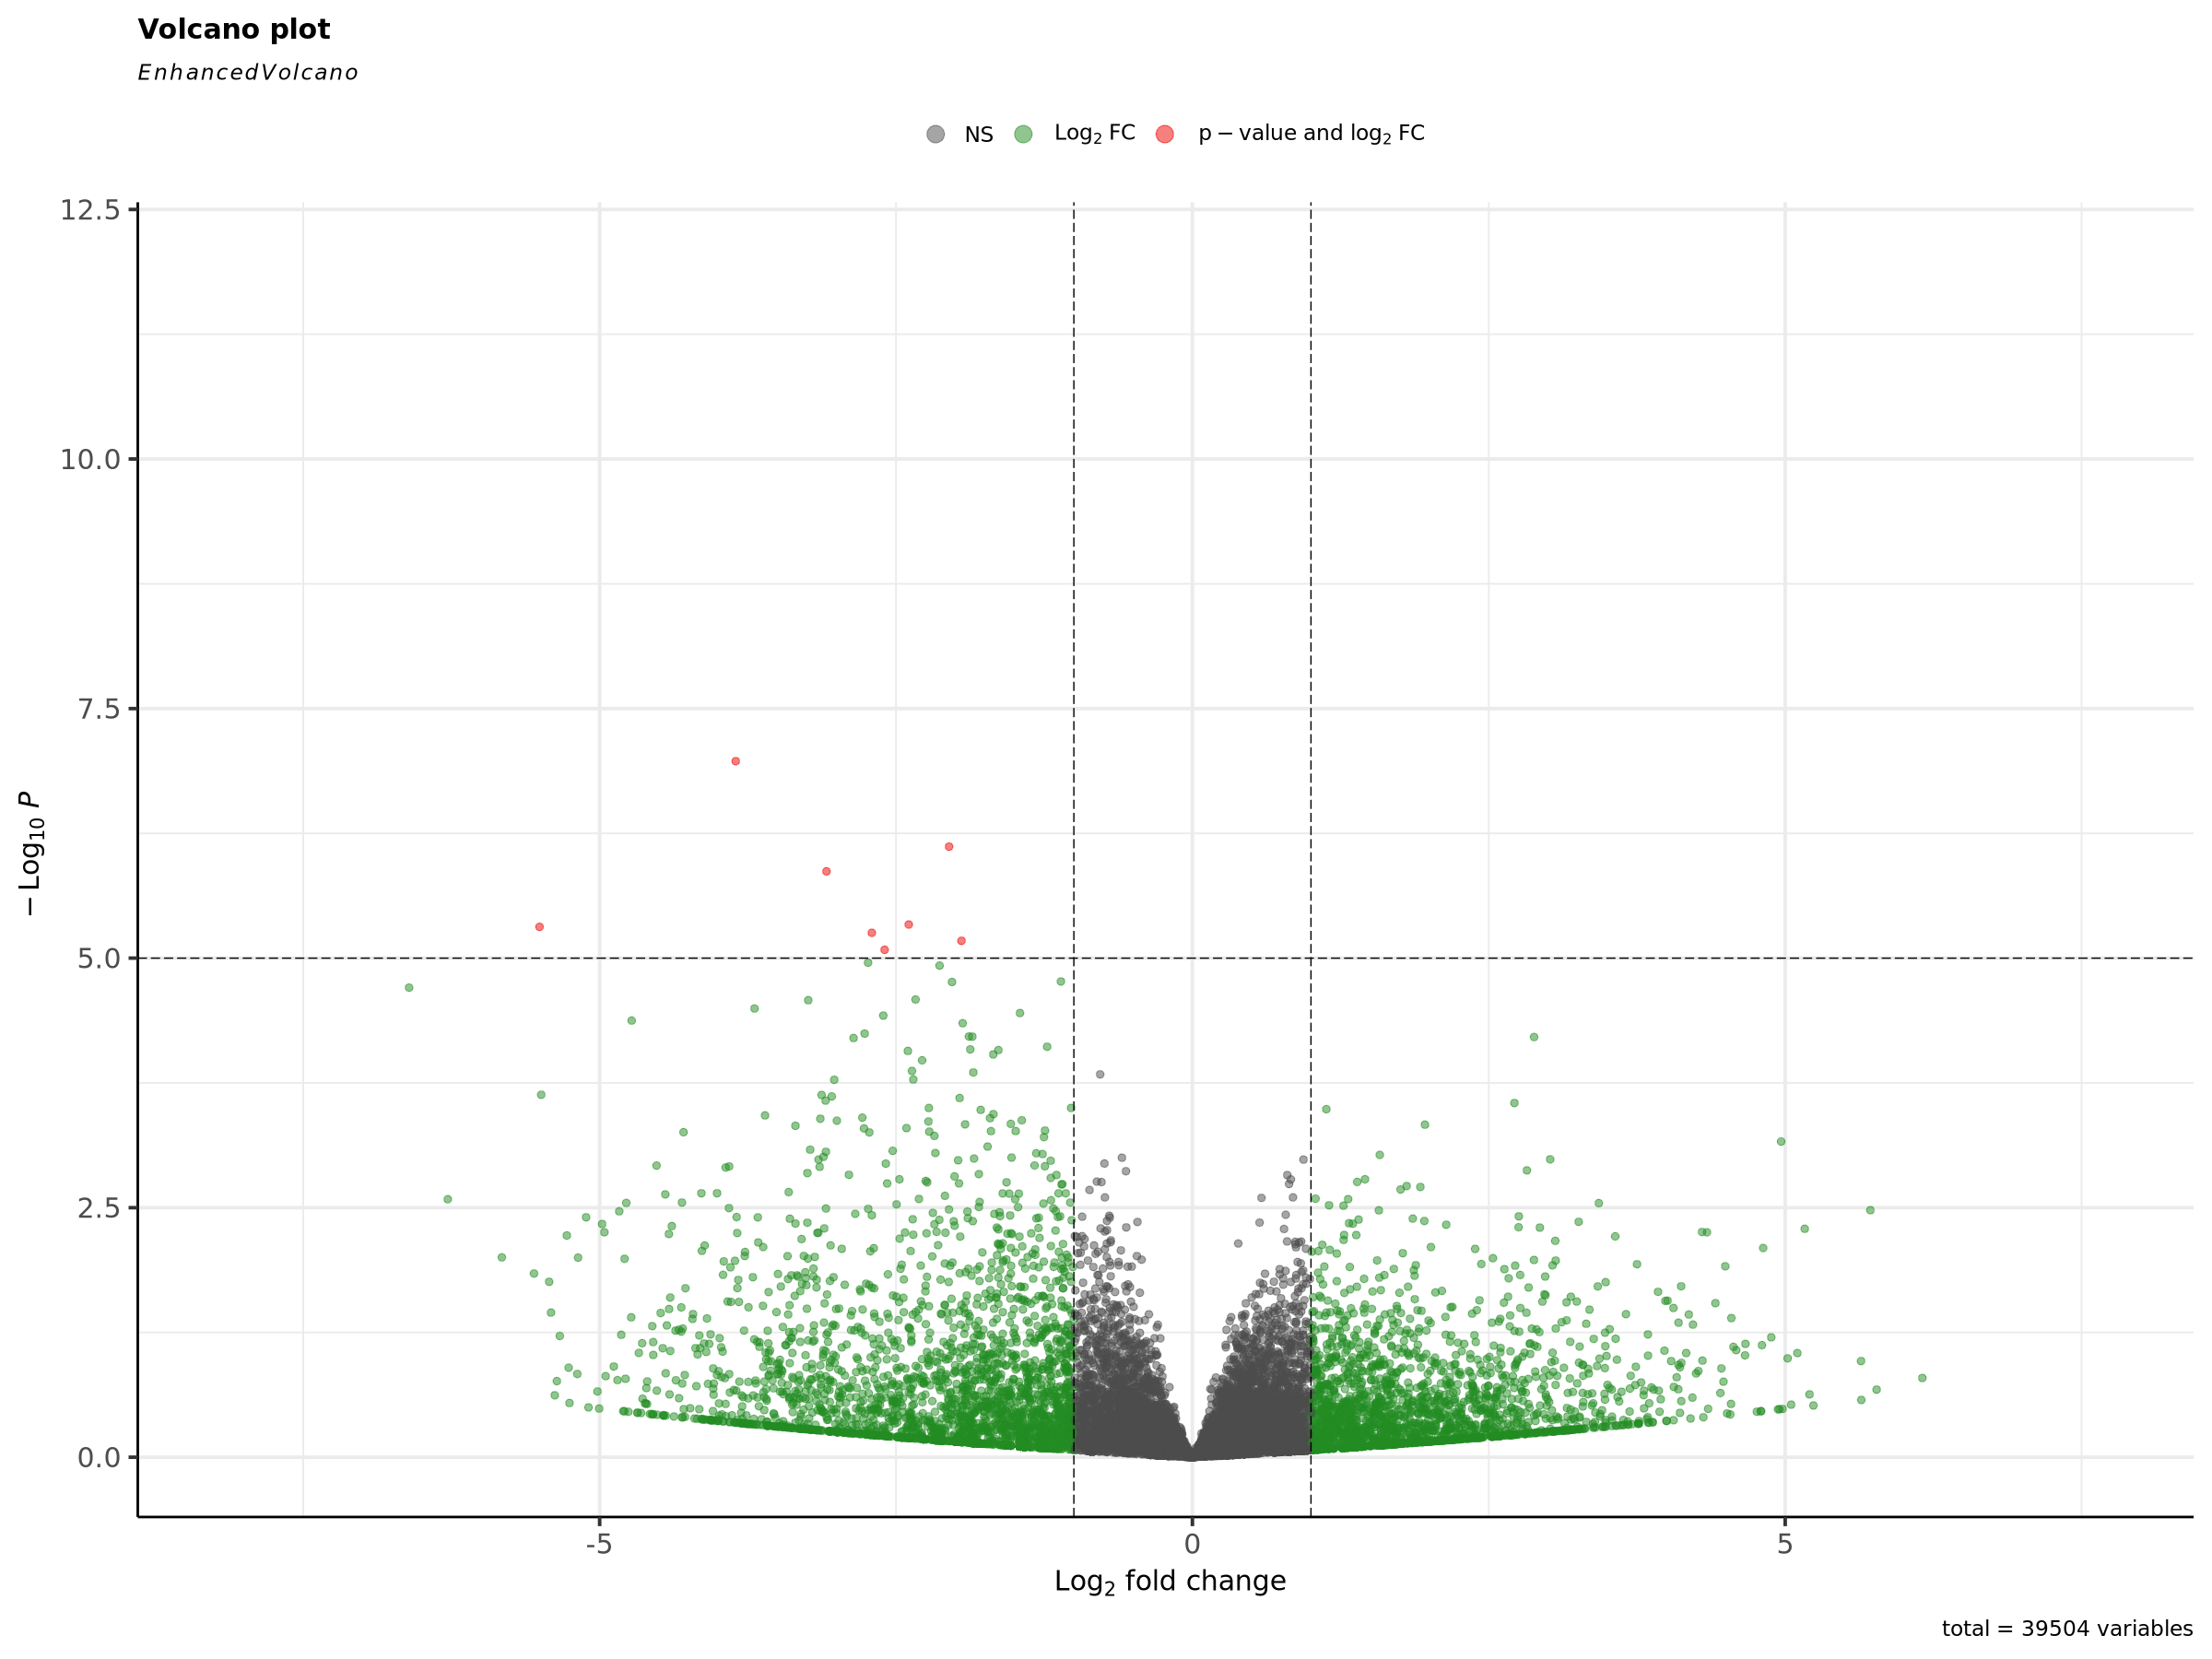

In [75]:
res=results(dds, name="all_TC_hypoxic.ambient.normoxic.ambient_vs_hypoxic.ambient.hypoxic.ambient")
    
sig = res[which(res$padj < 0.05), ]
     
dim(sig)

summary(res)

EnhancedVolcano(res,
                lab=NA,
                x = 'log2FoldChange',
                y = 'pvalue')

[1] 0 6


out of 17861 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 0, 0%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 230, 1.3%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



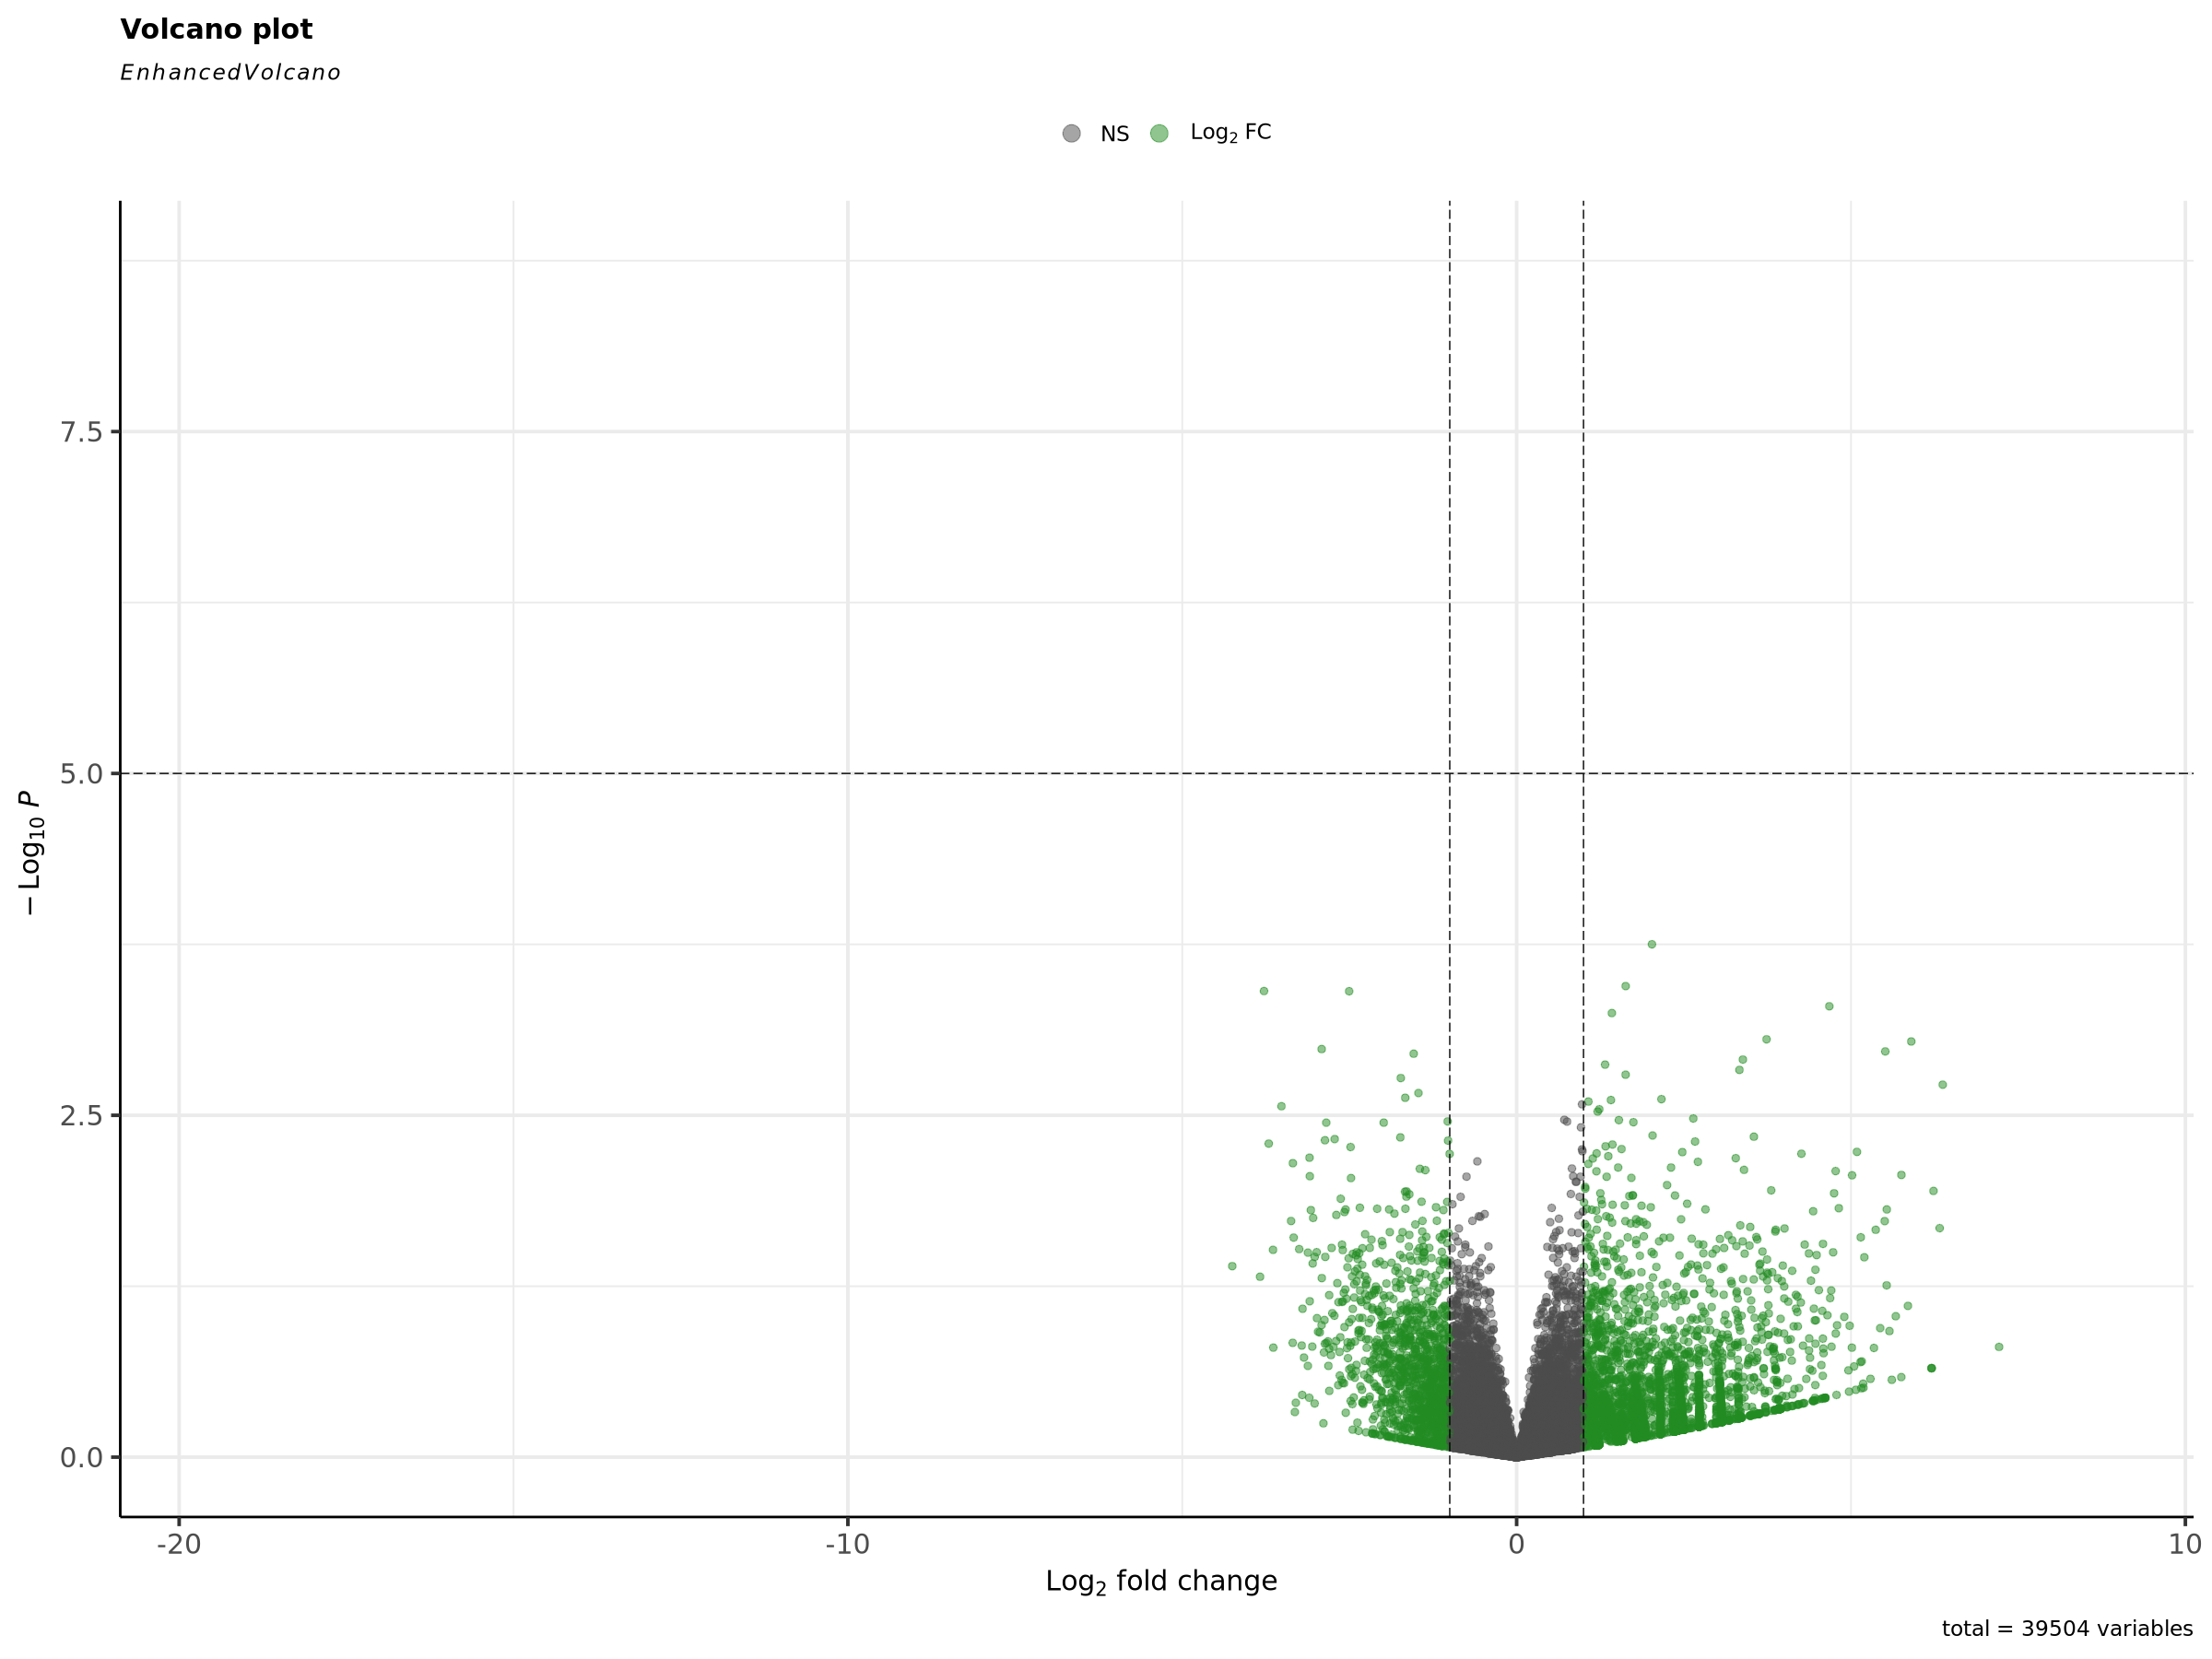

In [76]:
res=results(dds, name="all_TC_hypoxic.warm.hypoxic.warm_vs_hypoxic.ambient.hypoxic.ambient")
    
sig = res[which(res$padj < 0.05), ]
     
dim(sig)

summary(res)

EnhancedVolcano(res,
                lab=NA,
                x = 'log2FoldChange',
                y = 'pvalue')

[1] 1 6


out of 17861 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 1, 0.0056%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 230, 1.3%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



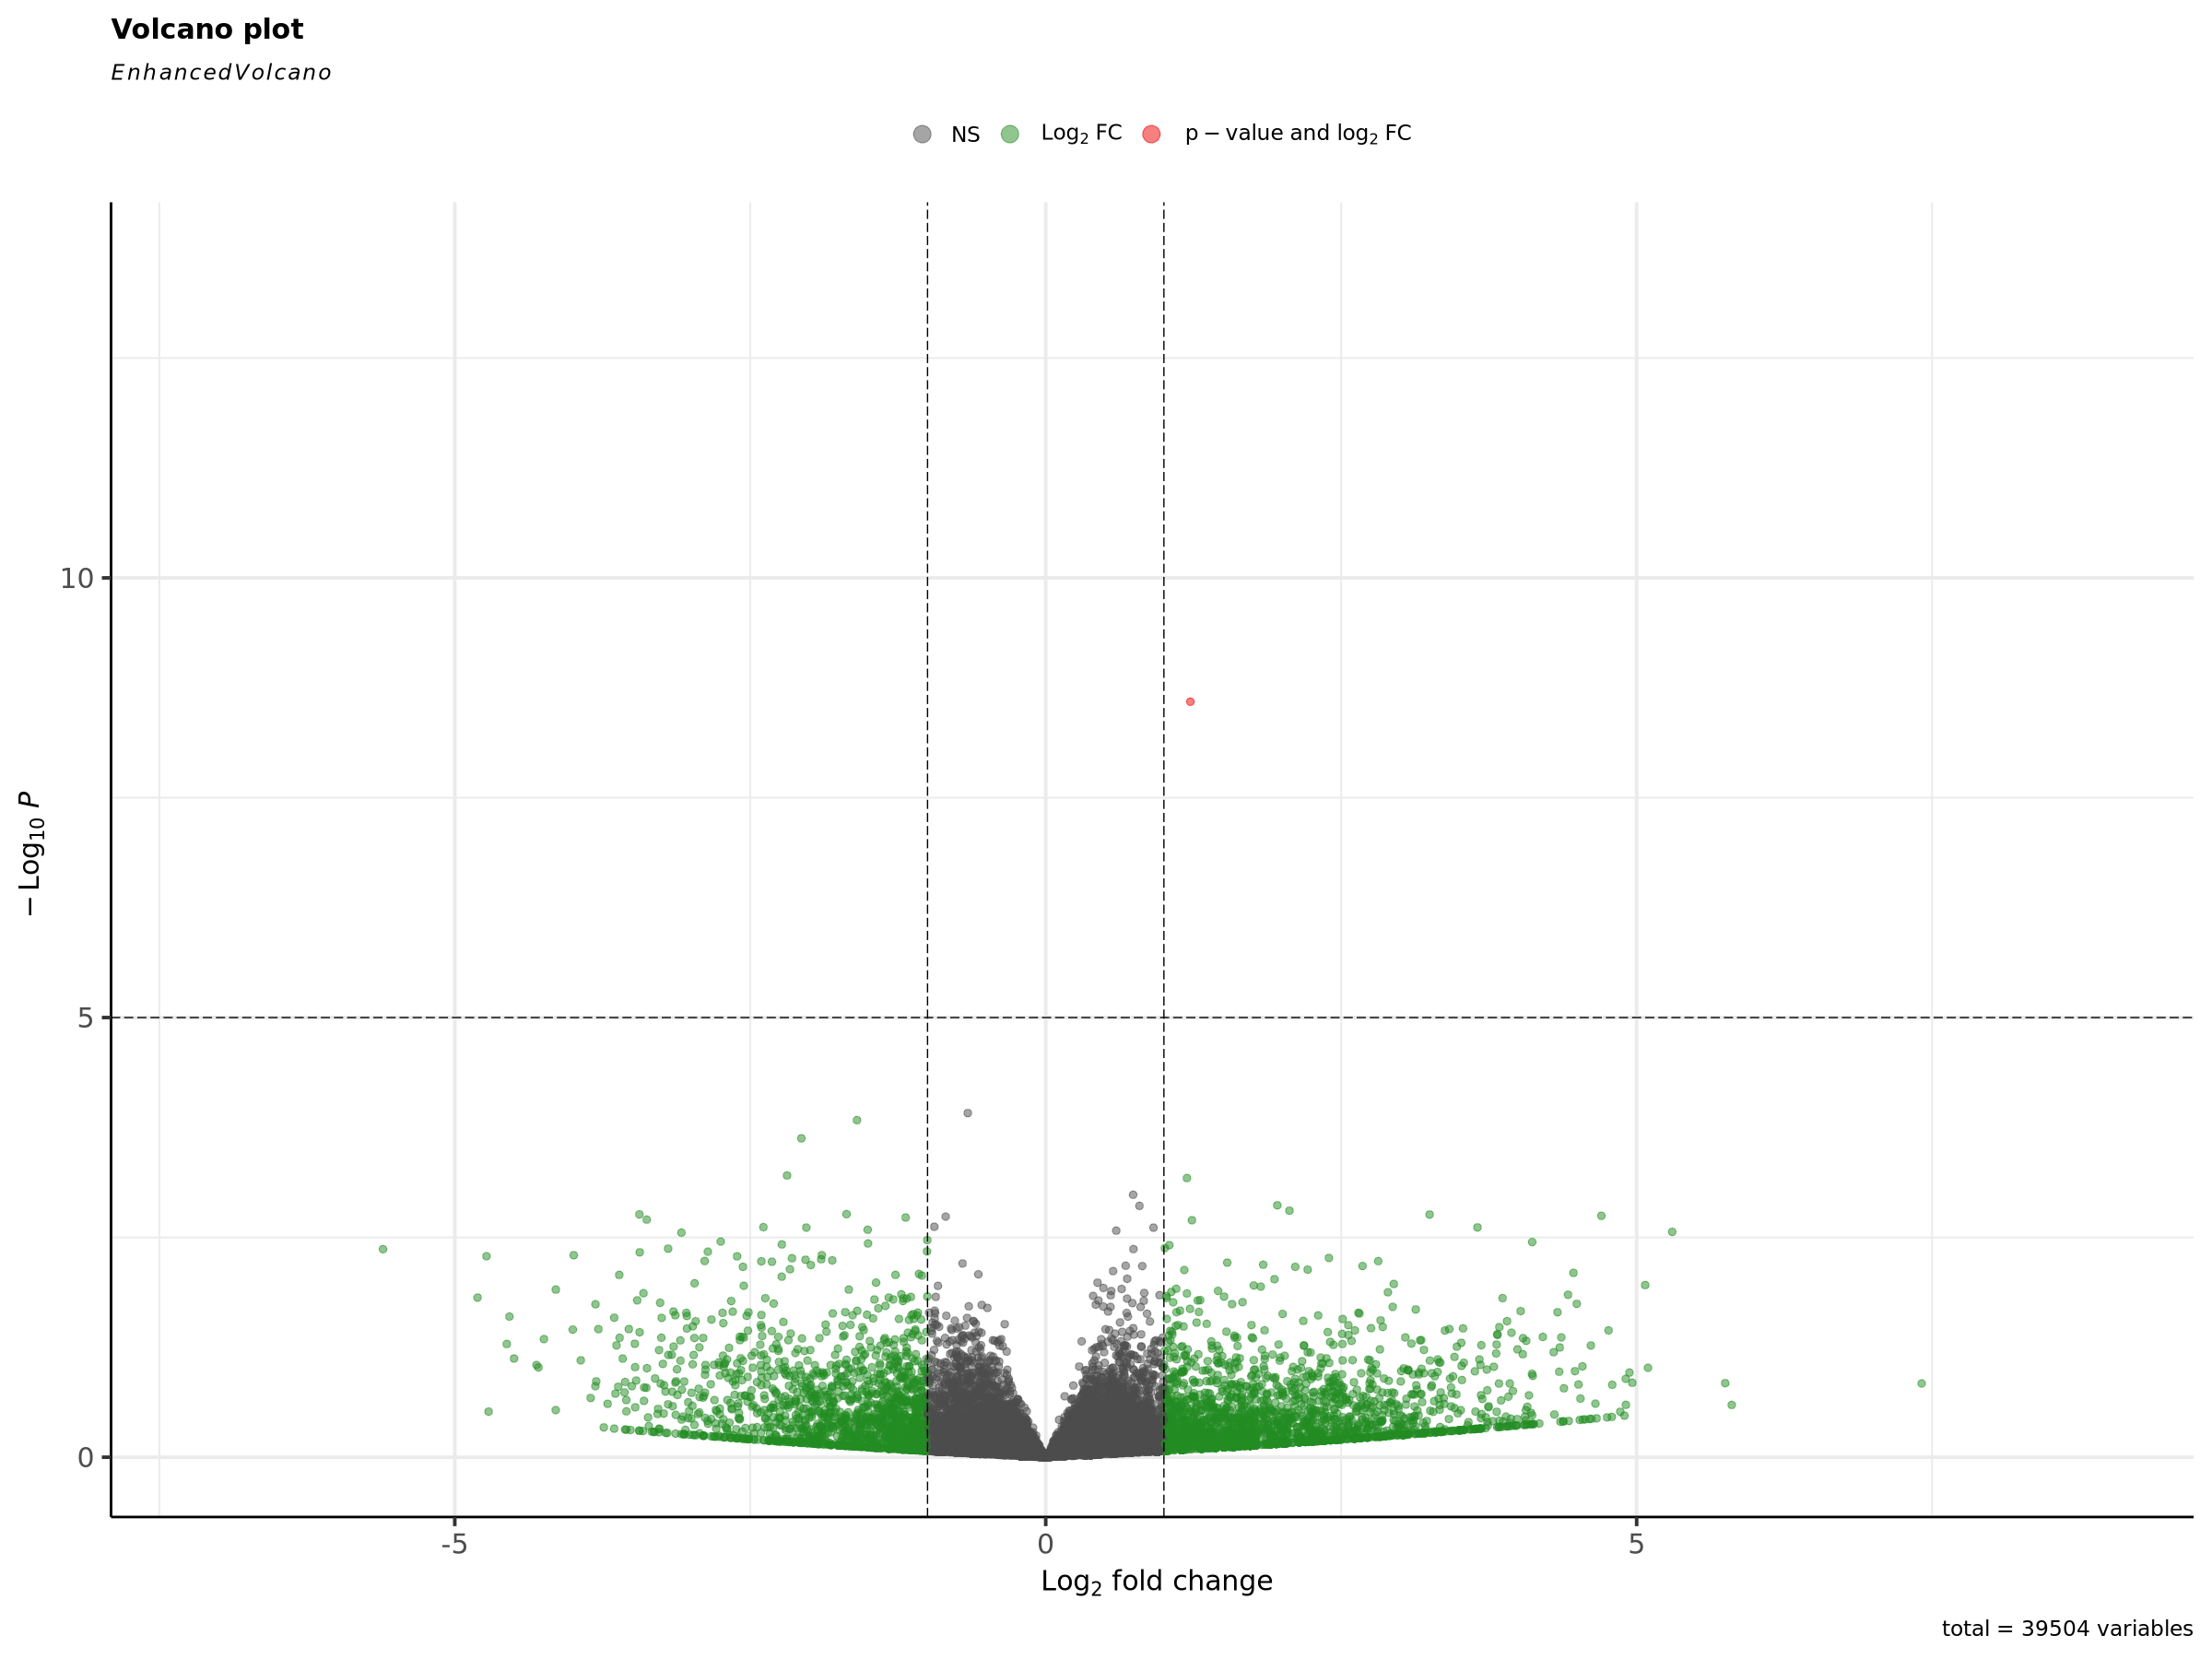

In [77]:
res=results(dds, name="all_TC_normoxic.ambient.hypoxic.ambient_vs_hypoxic.ambient.hypoxic.ambient")
    
sig = res[which(res$padj < 0.05), ]
     
dim(sig)

summary(res)

EnhancedVolcano(res,
                lab=NA,
                x = 'log2FoldChange',
                y = 'pvalue')

[1] 1 6


out of 17861 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 0, 0%
LFC < 0 (down)     : 1, 0.0056%
outliers [1]       : 230, 1.3%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



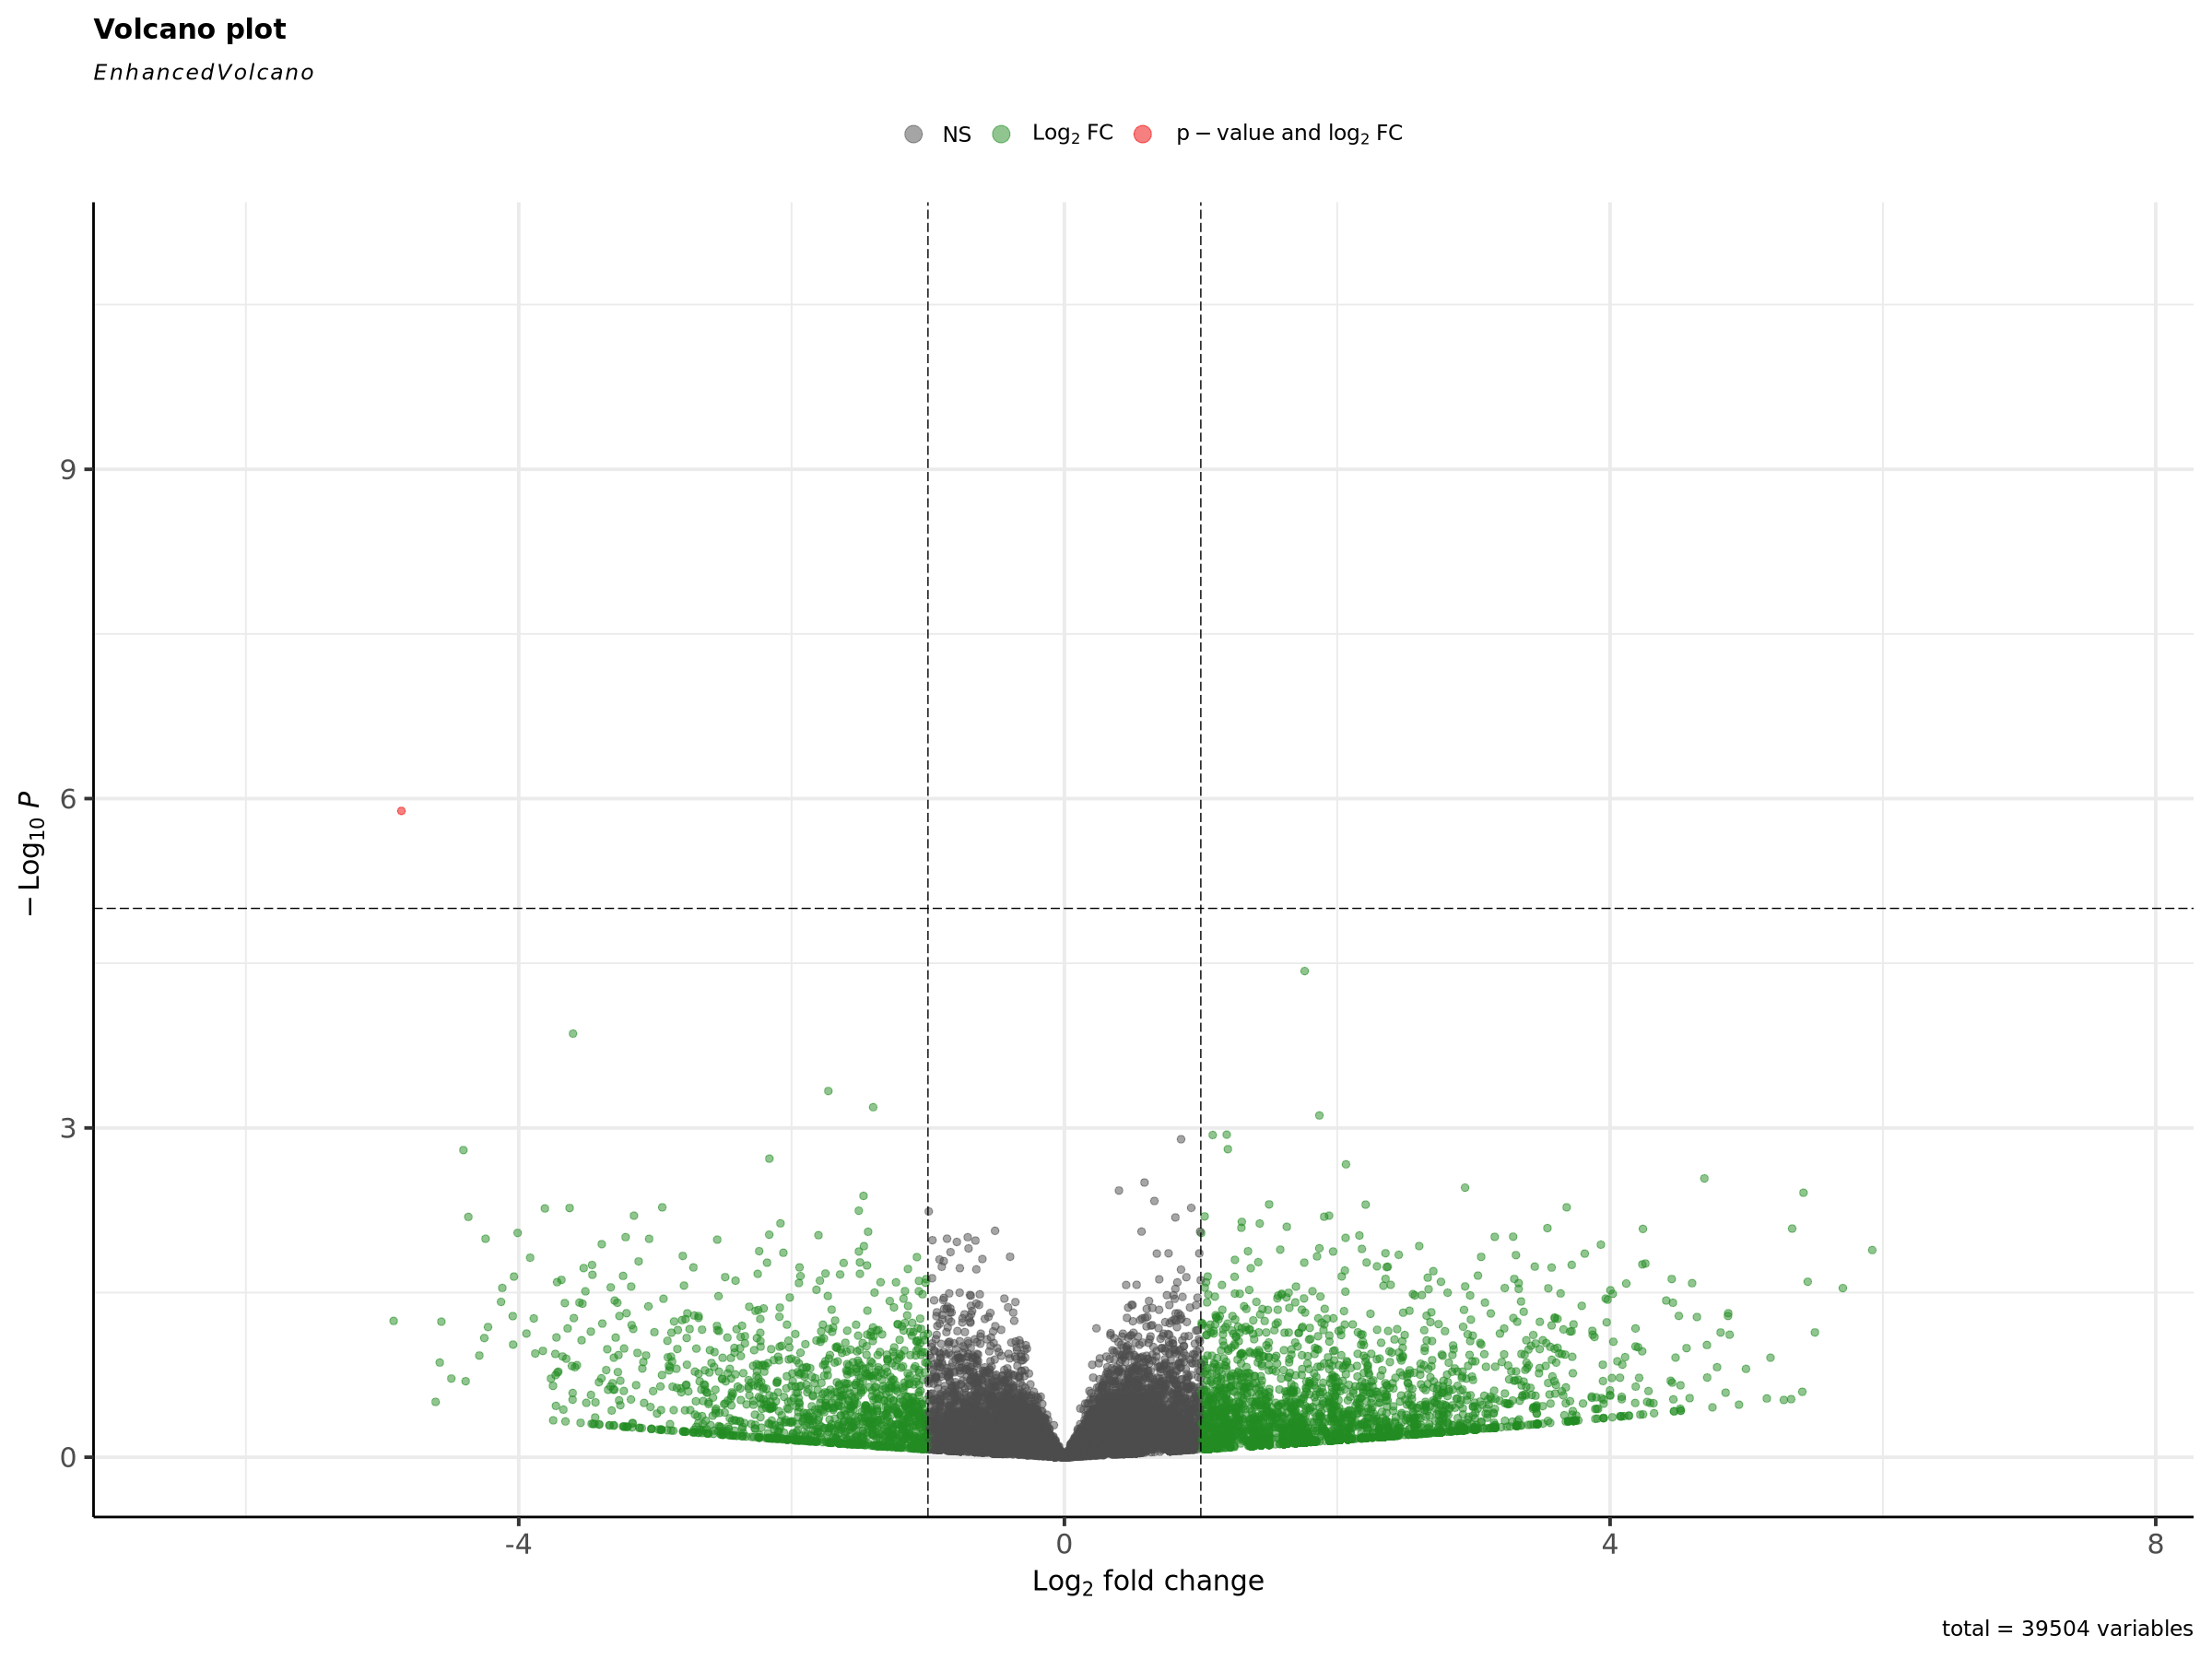

In [78]:
res=results(dds, name="all_TC_normoxic.ambient.normoxic.ambient_vs_hypoxic.ambient.hypoxic.ambient")
    
sig = res[which(res$padj < 0.05), ]
     
dim(sig)

summary(res)

EnhancedVolcano(res,
                lab=NA,
                x = 'log2FoldChange',
                y = 'pvalue')

[1] 370   6


out of 17861 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 460, 2.6%
LFC < 0 (down)     : 36, 0.2%
outliers [1]       : 230, 1.3%
low counts [2]     : 12225, 68%
(mean count < 3)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



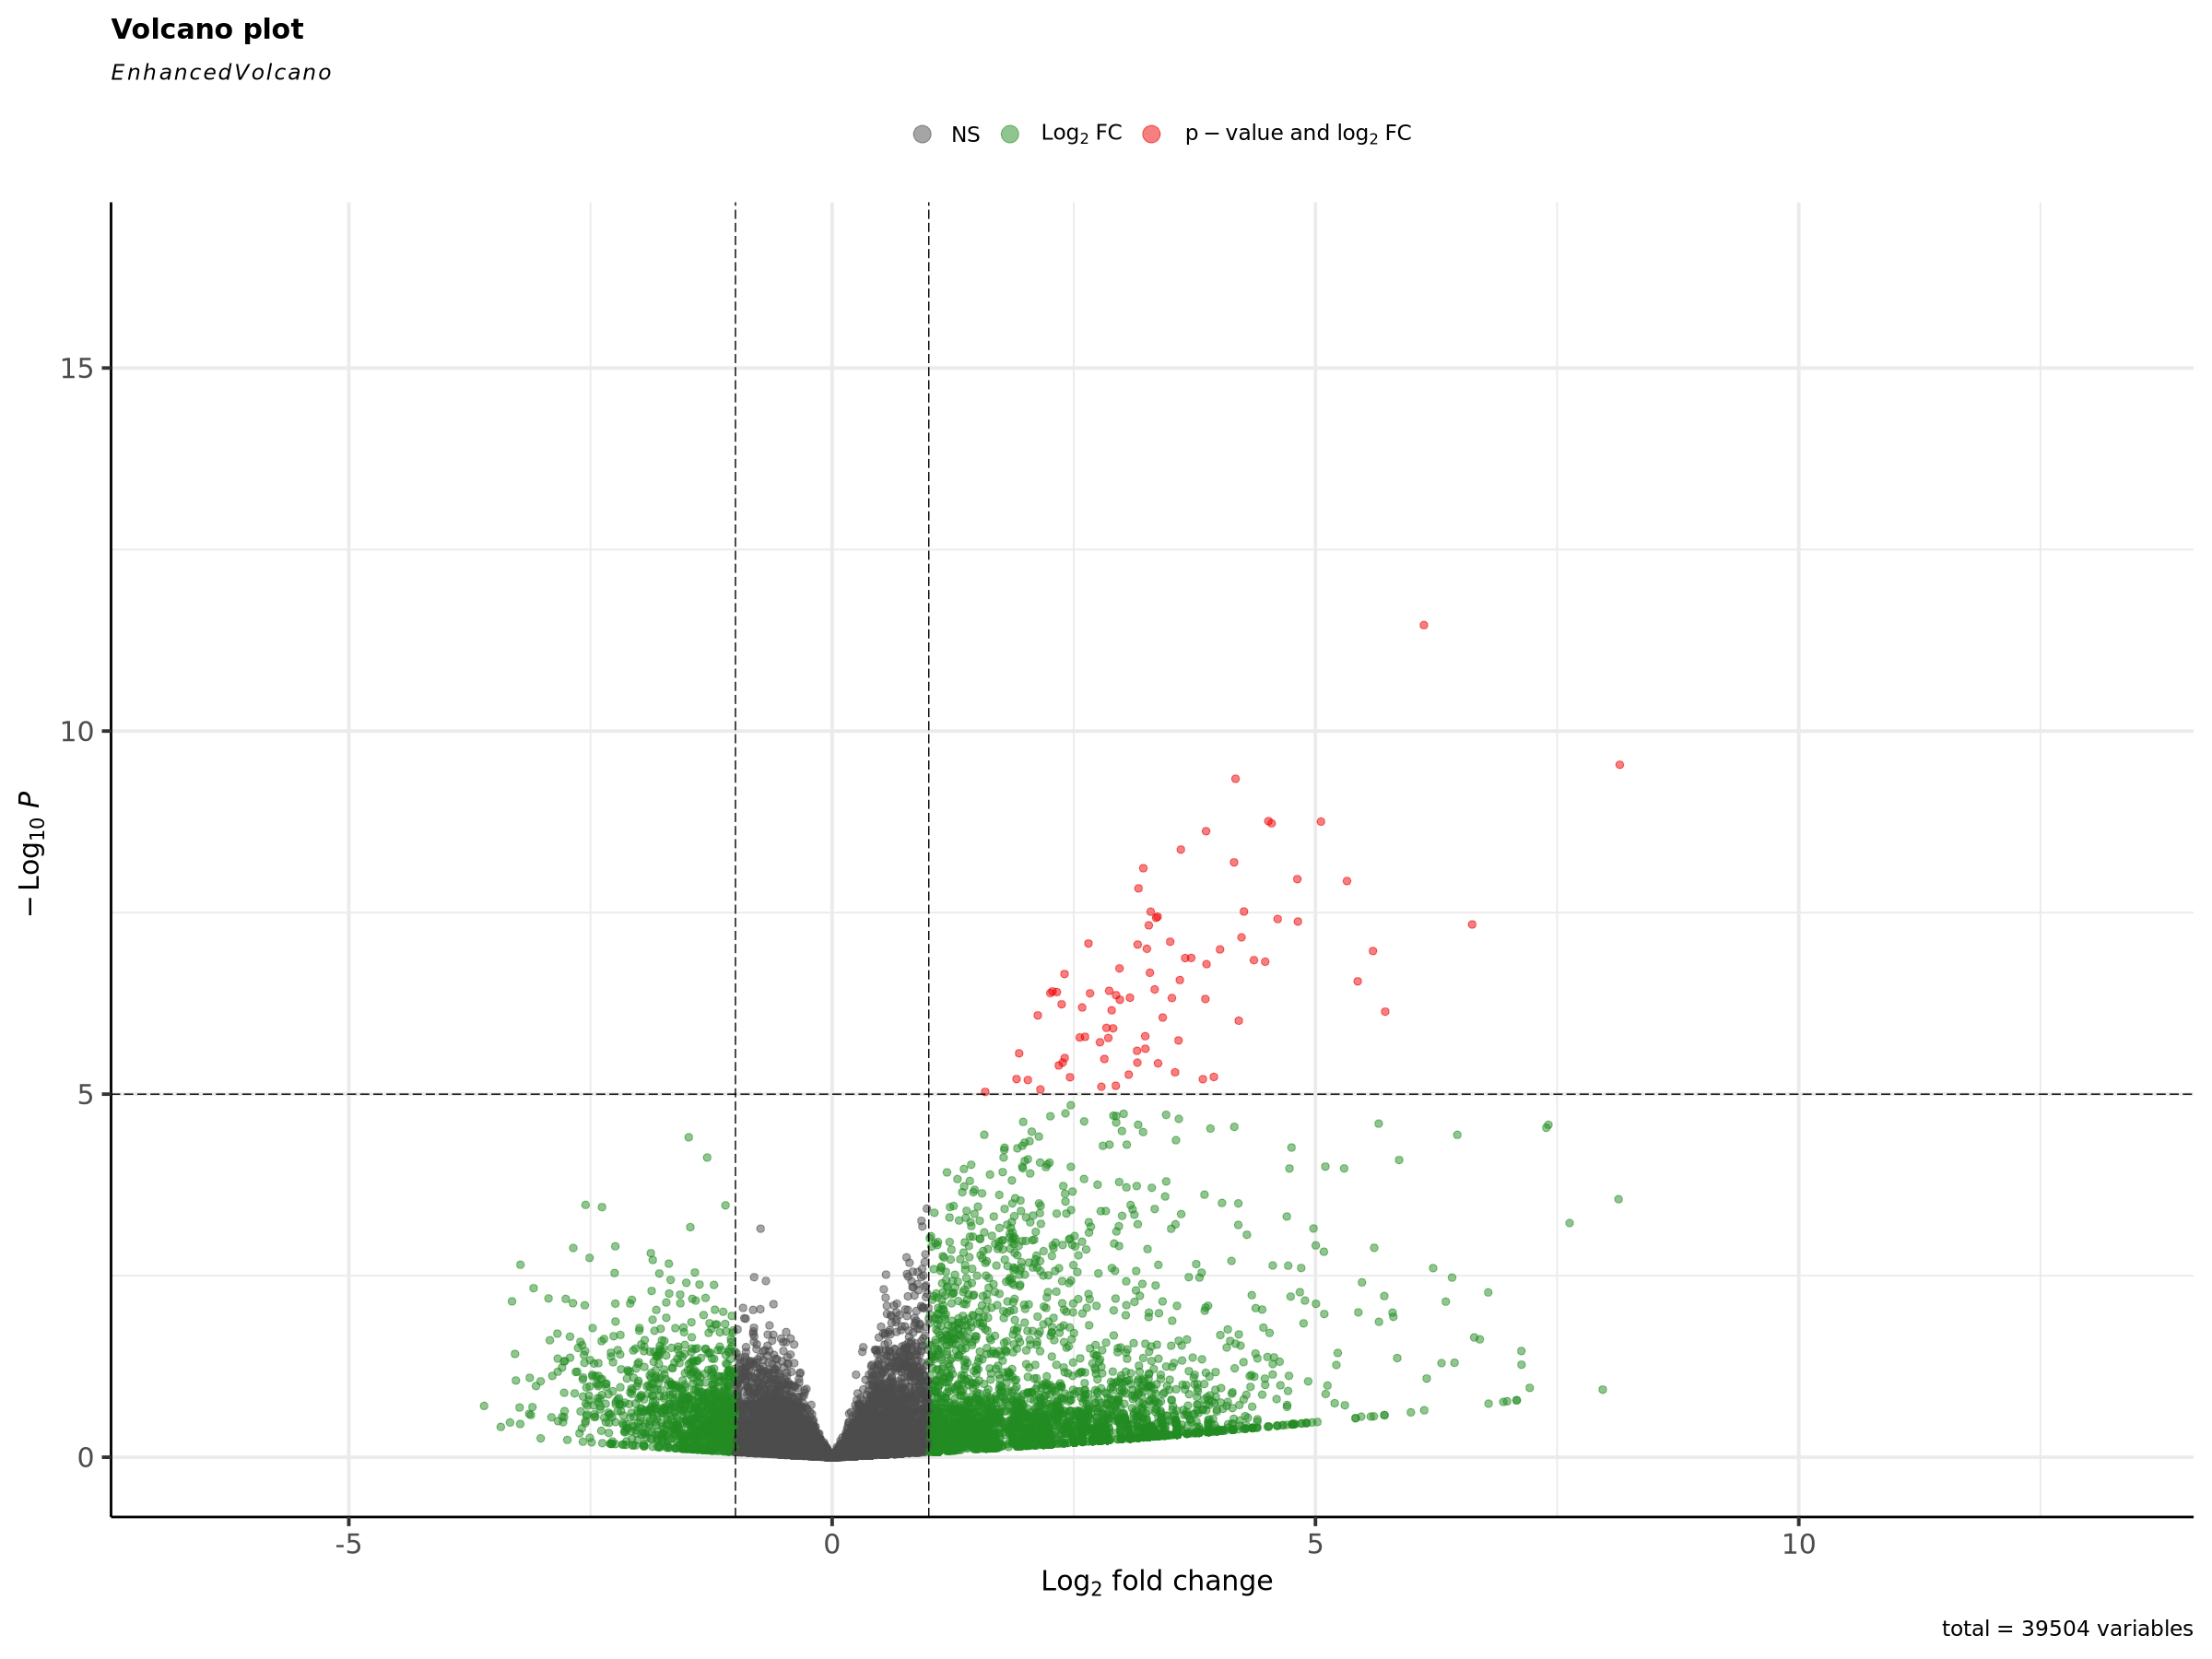

In [79]:
res=results(dds, name="all_TC_normoxic.warm.hypoxic.warm_vs_hypoxic.ambient.hypoxic.ambient")
    
sig = res[which(res$padj < 0.05), ]
     
dim(sig)

summary(res)

EnhancedVolcano(res,
                lab=NA,
                x = 'log2FoldChange',
                y = 'pvalue')

In [80]:
keyvals <- ifelse(
res$log2FoldChange < -1& res$padj <0.05, "#000066",
  ifelse(res$log2FoldChange > 1& res$padj <0.05,"#FF6666" ,
    'grey'))
keyvals[is.na(keyvals)] <- 'grey'
names(keyvals)[keyvals == "#FF6666"] <- 'More methylation in normoxic.warm.hypoxic.warm'
names(keyvals)[keyvals == 'grey'] <- 'Not significant'
names(keyvals)[keyvals == "#000066"] <- 'More methylation in hypoxic.ambient.hypoxic.ambient'

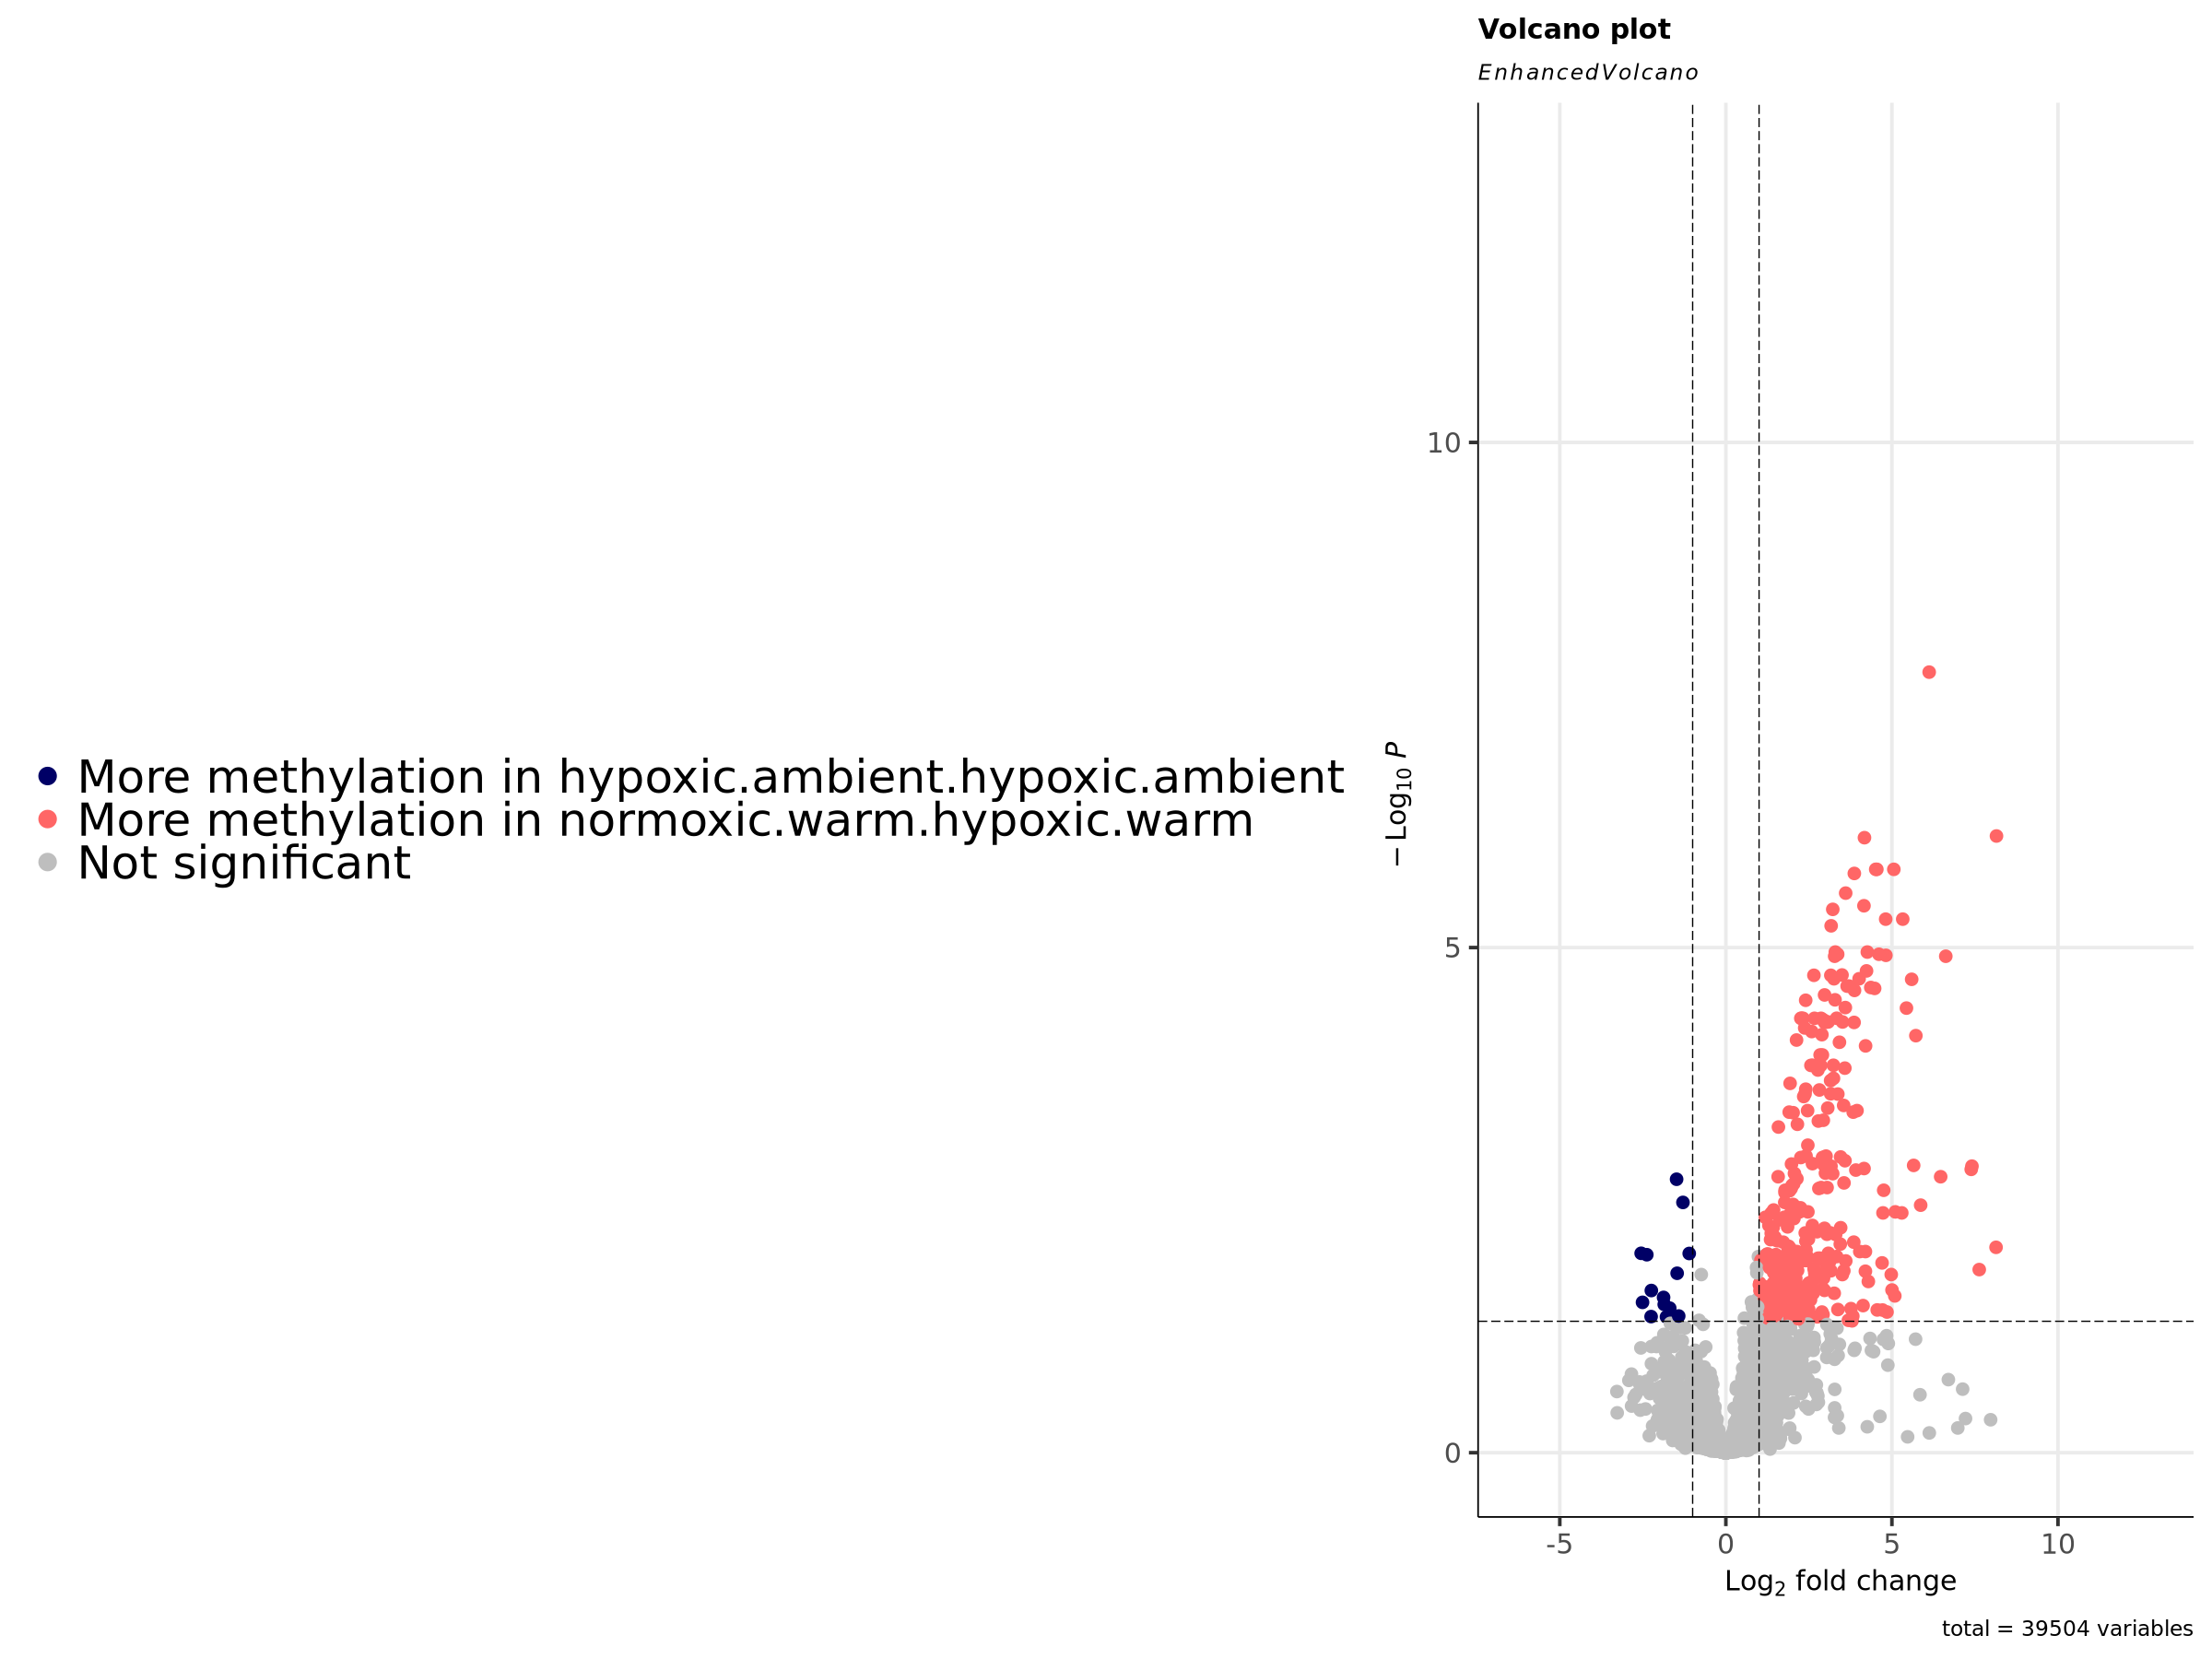

In [81]:
T1temp_plot <- EnhancedVolcano(res,
    lab = NA,
    x = 'log2FoldChange',
    y = 'padj',
    selectLab = rownames(res)[which(names(keyvals) %in% c('More methylation in Normoxic Warm', 'More methylation in Hypoxic Ambient'))],
    xlab = bquote(~Log[2]~ 'fold change'),
    pointSize = 3.5,
    pCutoff = 0.05,
    colCustom = keyvals,
    colAlpha = 1,
    legendPosition = 'left',
    legendLabSize = 30,
    legendIconSize = 5.0,
    drawConnectors = TRUE,
    widthConnectors = 1.0,
    colConnectors = 'black',
    arrowheads = FALSE,
    gridlines.major = TRUE,
    gridlines.minor = FALSE,
    border = 'partial',
    borderWidth = 0.5,
    borderColour = 'black')

T1temp_plot